# 🏥 PREDIKSI DIABETES PIMA DENGAN LOGISTIC REGRESSION MANUAL DAN GENETIC ALGORITHM

---

## 📋 INFORMASI PROYEK

### **Judul Proyek**
Implementasi Manual Logistic Regression dan Optimasi Hyperparameter dengan Genetic Algorithm untuk Prediksi Diabetes Pima

### **Metode yang Digunakan**
1. **Logistic Regression Manual**: Implementasi dari scratch tanpa library ML (sklearn, keras, torch)
   - Fungsi aktivasi: Sigmoid
   - Loss function: Binary Cross-Entropy
   - Optimizer: Gradient Descent
   - Hyperparameter tuning: Grid Search

2. **Genetic Algorithm**: Untuk optimasi hyperparameter otomatis
   - Populasi: 10 individu
   - Generasi: 20
   - Seleksi: Tournament Selection (k=3)
   - Crossover: One-point crossover
   - Mutasi: Random 10%
   - Fitness: Validation Accuracy

### **Dataset**
- **Nama**: Pima Indians Diabetes Dataset
- **Sumber**: Kaggle / Pima Indian Diabetes Repository
- **Jumlah Sampel**: 768
- **Jumlah Fitur**: 8 medical indicators
- **Jumlah Kelas**: 2 (Diabetes: Yes/No)
- **Positif Diabetes**: ~35%
- **Negatif Diabetes**: ~65%

### **Anggota Kelompok**
**Nama Kelompok**: Kelompok Parahyangan  
**Kelas**: IF-47-11

| No | Nama | NIM |
|---|---|---|
| 1 | Alif Rahman Rasyad Adi | 103012300220 |
| 2 | Ryan Ghafran Luhur | 103012300234 |
| 3 | Raihan Fachriza Putra Santoso | 103012300307 |

---

## 📌 RINGKASAN NOTEBOOK

Notebook ini merupakan implementasi **transparan dan lengkap** dari pipeline machine learning untuk prediksi diabetes Pima, yang meliputi:

1. **Bagian 1-4**: Data loading, explorasi, dan preprocessing
2. **Bagian 5-10**: Implementasi manual Logistic Regression dengan hyperparameter tuning
3. **Bagian 11**: Optimasi hyperparameter menggunakan Genetic Algorithm
4. **Bagian 12**: Rangkuman keseluruhan dan rekomendasi

Setiap tahap dirancang dengan prinsip **transparency first** - semua perhitungan dilakukan secara eksplisit dan dapat dipahami, tidak ada "black box".

---

---

## Import Libraries

Kami hanya menggunakan:
- **numpy**: Untuk operasi matematis dan manipulasi array
- **pandas**: Hanya untuk load dan menampilkan data
- **matplotlib & seaborn**: Untuk visualisasi

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# style buat visualisasi
plt.rc('font', size=11)
sns.set(style='whitegrid', color_codes=True)

print("✓ Library berhasil diimport")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✓ Library berhasil diimport
NumPy version: 2.3.5
Pandas version: 2.3.3


---

# BAGIAN 1: Load Data

Kami membaca dataset Pima Indian Diabetes dari file `diabetes.xls`. 
Dataset ini akan ditampilkan dengan head (5 baris pertama), info (tipe data dan jumlah non-null), dan describe (statistik deskriptif).

In [179]:
# Load dataset
try:
    df = pd.read_excel('diabetes.xls')
    print("✓ Dataset berhasil dimuat dari 'diabetes.xls'")
except FileNotFoundError:
    print("❌ File 'diabetes.xls' tidak ditemukan.")
    print("Pastikan file berada di direktori yang sama dengan notebook ini.")
    raise

# Tampilkan dimensi dataset
print(f"\nShape dataset: {df.shape}")
print(f"Jumlah baris (sampel): {df.shape[0]}")
print(f"Jumlah kolom (fitur + target): {df.shape[1]}")

# Tampilkan nama-nama kolom
print(f"\nNama-nama kolom:")
print(list(df.columns))

✓ Dataset berhasil dimuat dari 'diabetes.xls'

Shape dataset: (768, 9)
Jumlah baris (sampel): 768
Jumlah kolom (fitur + target): 9

Nama-nama kolom:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [180]:
# Tampilkan 5 baris pertama (head)
print("\n" + "="*80)
print("LIMA BARIS PERTAMA (HEAD):")
print("="*80)
print(df.head())


LIMA BARIS PERTAMA (HEAD):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
0            6      148             72             35        0 33.6000   
1            1       85             66             29        0 26.6000   
2            8      183             64              0        0 23.3000   
3            1       89             66             23       94 28.1000   
4            0      137             40             35      168 43.1000   

   DiabetesPedigreeFunction  Age  Outcome  
0                    0.6270   50        1  
1                    0.3510   31        0  
2                    0.6720   32        1  
3                    0.1670   21        0  
4                    2.2880   33        1  


In [181]:
# Tampilkan informasi dataset (info)
print("\n" + "="*80)
print("INFORMASI DATASET (INFO):")
print("="*80)
df.info()


INFORMASI DATASET (INFO):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [182]:
# Tampilkan statistik deskriptif (describe)
print("\n" + "="*80)
print("STATISTIK DESKRIPTIF (DESCRIBE):")
print("="*80)
print(df.describe())


STATISTIK DESKRIPTIF (DESCRIBE):
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  \
count     768.0000 768.0000       768.0000       768.0000 768.0000 768.0000   
mean        3.8451 120.8945        69.1055        20.5365  79.7995  31.9926   
std         3.3696  31.9726        19.3558        15.9522 115.2440   7.8842   
min         0.0000   0.0000         0.0000         0.0000   0.0000   0.0000   
25%         1.0000  99.0000        62.0000         0.0000   0.0000  27.3000   
50%         3.0000 117.0000        72.0000        23.0000  30.5000  32.0000   
75%         6.0000 140.2500        80.0000        32.0000 127.2500  36.6000   
max        17.0000 199.0000       122.0000        99.0000 846.0000  67.1000   

       DiabetesPedigreeFunction      Age  Outcome  
count                  768.0000 768.0000 768.0000  
mean                     0.4719  33.2409   0.3490  
std                      0.3313  11.7602   0.4770  
min                      0.0780  21.0000   0.0

---

# BAGIAN 2: Explorasi Data

## 🎯 Latar Belakang Masalah

**Masalah yang ingin diselesaikan:**
Prediksi diabetes pada wanita berusia 21+ tahun berdasarkan 8 parameter medis. Diabetes adalah penyakit kronis yang memerlukan deteksi dini agar dapat dikelola dengan baik.

**Dataset yang digunakan:**
Pima Indians Diabetes Dataset - dataset terkenal dari National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). Dataset ini berisi informasi medis dari 768 wanita Pima Indian berusia minimal 21 tahun.

**Tujuan analisis:**
Membangun model prediktif yang dapat mengklasifikasi apakah seseorang memiliki diabetes atau tidak, dengan membandingkan dua pendekatan:
1. Logistic Regression dengan hyperparameter tuning manual (baseline)
2. Logistic Regression dengan hyperparameter tuning otomatis menggunakan Genetic Algorithm (GA)

## 📊 Explorasi Data

Pada bagian ini kami akan menganalisis:
1. **Distribusi label (Outcome)**: Berapa banyak sampel dengan nilai 0 dan 1
2. **Missing values / nilai tidak valid**: Apakah ada nilai yang hilang atau bernilai 0 yang seharusnya tidak boleh
3. **Statistik deskriptif**: Range, mean, std dev dari setiap fitur

In [183]:
# Cek nilai yang hilang (missing values)
print("="*80)
print("CEK MISSING VALUES:")
print("="*80)
missing_counts = df.isnull().sum()
print(missing_counts)
print(f"\nTotal missing values di seluruh dataset: {missing_counts.sum()}")

if missing_counts.sum() == 0:
    print("✓ Tidak ada missing values di dataset ini.")

CEK MISSING VALUES:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Total missing values di seluruh dataset: 0
✓ Tidak ada missing values di dataset ini.


In [184]:
# Cek nilai yang tidak valid (nilai 0 yang tidak seharusnya)
# Di dataset Pima, beberapa kolom tidak boleh memiliki nilai 0 (seperti Glucose, BloodPressure, dll)

print("\n" + "="*80)
print("CEK NILAI TIDAK VALID (ZERO VALUES):")
print("="*80)

# Kolom-kolom yang tidak boleh bernilai 0
non_zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in non_zero_columns:
    zero_count = (df[col] == 0).sum()
    percentage = (zero_count / len(df)) * 100
    print(f"{col:20s}: {zero_count:4d} nilai 0 ({percentage:5.1f}%)")

print("\nNOTA: Nilai 0 ini akan dianggap sebagai nilai yang tidak valid dan akan diimputasi")


CEK NILAI TIDAK VALID (ZERO VALUES):
Glucose             :    5 nilai 0 (  0.7%)
BloodPressure       :   35 nilai 0 (  4.6%)
SkinThickness       :  227 nilai 0 ( 29.6%)
Insulin             :  374 nilai 0 ( 48.7%)
BMI                 :   11 nilai 0 (  1.4%)

NOTA: Nilai 0 ini akan dianggap sebagai nilai yang tidak valid dan akan diimputasi



DISTRIBUSI LABEL (OUTCOME):

Jumlah sampel per kelas:
  Outcome 0:  500 sampel ( 65.1%)
  Outcome 1:  268 sampel ( 34.9%)

Total sampel: 768


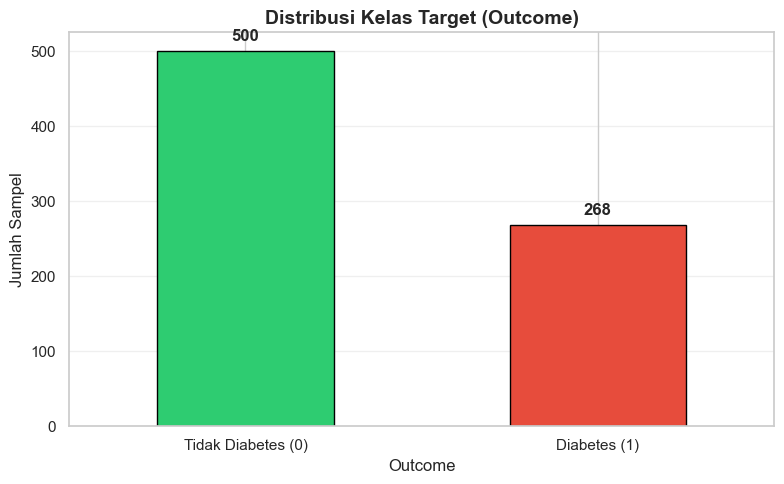

In [185]:
# Distribusi label (Outcome)
print("\n" + "="*80)
print("DISTRIBUSI LABEL (OUTCOME):")
print("="*80)

outcome_counts = df['Outcome'].value_counts().sort_index()
print("\nJumlah sampel per kelas:")
for label, count in outcome_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  Outcome {label}: {count:4d} sampel ({percentage:5.1f}%)")

print(f"\nTotal sampel: {len(df)}")

# Visualisasi
fig, ax = plt.subplots(figsize=(8, 5))
outcome_counts.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'], edgecolor='black')
ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Jumlah Sampel', fontsize=12)
ax.set_title('Distribusi Kelas Target (Outcome)', fontsize=14, fontweight='bold')
ax.set_xticklabels(['Tidak Diabetes (0)', 'Diabetes (1)'], rotation=0)
ax.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for i, v in enumerate(outcome_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

---

# BAGIAN 3: Persiapan Data (MANUAL)

## Penjelasan: Fitur (X) vs Label (y)

**Fitur (X):**
- Merupakan variabel independen atau input yang digunakan untuk prediksi
- Pada dataset Pima: 8 kolom pertama (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
- X memiliki shape (768, 8) = 768 sampel × 8 fitur

**Label (y):**
- Merupakan variabel dependen atau output yang ingin diprediksi
- Pada dataset Pima: kolom Outcome (0 atau 1)
- y memiliki shape (768,) = 768 sampel

**Imputasi Manual:**
- Dataset Pima memiliki nilai 0 yang seharusnya tidak ada di kolom tertentu (Glucose, BloodPressure, dll)
- Kami akan mengganti nilai 0 dengan **mean (rata-rata)** dari kolom tersebut
- Metode ini disebut **mean imputation** atau imputasi dengan rata-rata

### Langkah-langkah:
1. Pisahkan X (fitur) dan y (label) dari dataframe
2. Definisikan fungsi `compute_mean()` untuk menghitung rata-rata
3. Definisikan fungsi `impute_with_mean()` untuk mengganti nilai 0 dengan mean
4. Terapkan imputasi pada semua fitur
5. Hitung dan tampilkan jumlah nilai yang diimpute per kolom

In [186]:
# STEP 1: Pisahkan X (fitur) dan y (label)
print("="*80)
print("STEP 1: PEMISAHAN FITUR (X) DAN LABEL (y)")
print("="*80)

# Pisahkan X (drop kolom Outcome) dan y (ambil kolom Outcome)
X = df.drop('Outcome', axis=1).values  # Konversi ke numpy array
y = df['Outcome'].values  # Konversi ke numpy array

print(f"\nShape X (fitur): {X.shape}")
print(f"  → {X.shape[0]} sampel")
print(f"  → {X.shape[1]} fitur")

print(f"\nShape y (label): {y.shape}")
print(f"  → {y.shape[0]} sampel")

print(f"\nNama-nama fitur (kolom di X):")
feature_names = df.drop('Outcome', axis=1).columns.tolist()
for i, name in enumerate(feature_names, 1):
    print(f"  {i}. {name}")

print(f"\nX (5 baris pertama):")
print(X[:5])

print(f"\ny (10 nilai pertama):")
print(y[:10])

STEP 1: PEMISAHAN FITUR (X) DAN LABEL (y)

Shape X (fitur): (768, 8)
  → 768 sampel
  → 8 fitur

Shape y (label): (768,)
  → 768 sampel

Nama-nama fitur (kolom di X):
  1. Pregnancies
  2. Glucose
  3. BloodPressure
  4. SkinThickness
  5. Insulin
  6. BMI
  7. DiabetesPedigreeFunction
  8. Age

X (5 baris pertama):
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]

y (10 nilai pertama):
[1 0 1 0 1 0 1 0 1 1]


In [187]:
# STEP 2: Definisikan fungsi compute_mean()
print("\n" + "="*80)
print("STEP 2: DEFINISI FUNGSI compute_mean()")
print("="*80)

def compute_mean(values):
    """
    Hitung rata-rata (mean) dari array nilai secara MANUAL.
    
    Formula: mean = sum(values) / n
    
    Args:
        values: Array 1D dari nilai numerik
    
    Returns:
        Rata-rata (float)
    """
    n = len(values)
    if n == 0:
        return 0
    return np.sum(values) / n

print("\n✓ Fungsi compute_mean() berhasil didefinisikan")
print("\nFormula: mean = Σ(x_i) / n")
print("  Σ(x_i) = jumlah semua nilai")
print("  n      = jumlah elemen")


STEP 2: DEFINISI FUNGSI compute_mean()

✓ Fungsi compute_mean() berhasil didefinisikan

Formula: mean = Σ(x_i) / n
  Σ(x_i) = jumlah semua nilai
  n      = jumlah elemen


In [188]:
# STEP 3: Definisikan fungsi impute_with_mean()
print("\n" + "="*80)
print("STEP 3: DEFINISI FUNGSI impute_with_mean()")
print("="*80)

def impute_with_mean(values, invalid_value=0):
    """
    Ganti nilai yang tidak valid (default: 0) dengan mean kolom secara MANUAL.
    
    Algoritma:
    1. Hitung mean dari semua nilai yang BUKAN invalid_value
    2. Iterasi setiap elemen dalam values
    3. Jika elemen == invalid_value, ganti dengan mean
    4. Return array yang sudah diimputasi dan jumlah perubahan
    
    Args:
        values: Array 1D dari nilai numerik
        invalid_value: Nilai yang dianggap tidak valid (default: 0)
    
    Returns:
        Tuple (values_imputed, count_imputed)
        - values_imputed: Array setelah imputasi
        - count_imputed: Jumlah nilai yang diganti
    """
    # Buat copy agar tidak mengubah array original
    values_imputed = values.copy()
    
    # Hitung mean hanya dari nilai yang BUKAN 0
    valid_values = values_imputed[values_imputed != invalid_value]
    mean_value = compute_mean(valid_values)
    
    # Hitung jumlah nilai yang akan diimpute
    count_imputed = np.sum(values_imputed == invalid_value)
    
    # Ganti semua nilai 0 dengan mean
    values_imputed[values_imputed == invalid_value] = mean_value
    
    return values_imputed, count_imputed

print("\n✓ Fungsi impute_with_mean() berhasil didefinisikan")
print("\nAlgoritma:")
print("  1. Hitung mean dari nilai yang TIDAK 0")
print("  2. Ganti semua nilai 0 dengan mean tersebut")
print("  3. Return: array yang sudah diimputasi + jumlah yang diganti")


STEP 3: DEFINISI FUNGSI impute_with_mean()

✓ Fungsi impute_with_mean() berhasil didefinisikan

Algoritma:
  1. Hitung mean dari nilai yang TIDAK 0
  2. Ganti semua nilai 0 dengan mean tersebut
  3. Return: array yang sudah diimputasi + jumlah yang diganti


In [189]:
# STEP 4: Terapkan imputasi pada semua fitur
print("\n" + "="*80)
print("STEP 4: TERAPKAN IMPUTASI PADA SEMUA FITUR")
print("="*80)

# Buat copy X agar tidak mengubah original
X_imputed = X.copy()

# Dictionary untuk menyimpan jumlah imputasi per kolom
impute_counts = {}

# Iterasi setiap kolom (fitur) di X
print("\nMelakukan imputasi untuk setiap fitur...\n")

for col_idx in range(X_imputed.shape[1]):
    # Ambil kolom ke-col_idx
    col = X_imputed[:, col_idx]
    
    # Terapkan imputasi pada kolom ini
    col_imputed, count = impute_with_mean(col, invalid_value=0)
    
    # Update kolom di X_imputed
    X_imputed[:, col_idx] = col_imputed
    
    # Simpan jumlah imputasi
    impute_counts[feature_names[col_idx]] = count

print("="*80)
print("HASIL IMPUTASI:")
print("="*80)
print("\nJumlah nilai 0 yang diimpute per kolom:")
print()

total_imputed = 0
for i, (feature_name, count) in enumerate(impute_counts.items(), 1):
    percentage = (count / X.shape[0]) * 100
    status = "✓" if count > 0 else " "
    print(f"{status} {i}. {feature_name:25s}: {count:4d} nilai ({percentage:5.1f}%)")
    total_imputed += count

print()
print(f"Total nilai yang diimpute: {total_imputed} dari {X.shape[0] * X.shape[1]} total elemen")
print(f"Persentase: {(total_imputed / (X.shape[0] * X.shape[1])) * 100:.2f}%")


STEP 4: TERAPKAN IMPUTASI PADA SEMUA FITUR

Melakukan imputasi untuk setiap fitur...

HASIL IMPUTASI:

Jumlah nilai 0 yang diimpute per kolom:

✓ 1. Pregnancies              :  111 nilai ( 14.5%)
✓ 2. Glucose                  :    5 nilai (  0.7%)
✓ 3. BloodPressure            :   35 nilai (  4.6%)
✓ 4. SkinThickness            :  227 nilai ( 29.6%)
✓ 5. Insulin                  :  374 nilai ( 48.7%)
✓ 6. BMI                      :   11 nilai (  1.4%)
  7. DiabetesPedigreeFunction :    0 nilai (  0.0%)
  8. Age                      :    0 nilai (  0.0%)

Total nilai yang diimpute: 763 dari 6144 total elemen
Persentase: 12.42%


In [190]:
# STEP 5: Verifikasi hasil imputasi
print("\n" + "="*80)
print("STEP 5: VERIFIKASI HASIL IMPUTASI")
print("="*80)

print("MEAN setiap fitur sebelum imputasi:")
for i, feature_name in enumerate(feature_names):
    col = X[:, i]
    mean_value = compute_mean(col[col != 0])  # Hitung mean hanya dari nilai yang bukan 0
    print(f"  {feature_name:25s}: {mean_value:.4f}")   

print("\nMEAN setiap fitur setelah imputasi:")
for i, feature_name in enumerate(feature_names):
    col_imputed = X_imputed[:, i]
    mean_value_imputed = compute_mean(col_imputed)  # Hitung mean dari seluruh kolom setelah imputasi
    print(f"  {feature_name:25s}: {mean_value_imputed:.4f}")

print("\nPerbandingan X sebelum dan sesudah imputasi (5 baris pertama):")
print()
print("SEBELUM IMPUTASI (X):")
print(X[:5])
print()
print("SESUDAH IMPUTASI (X_imputed):")
print(X_imputed[:5])

# Cek apakah masih ada nilai 0 di X_imputed
zero_count_after = np.sum(X_imputed == 0)
print()
print(f"\n✓ Jumlah nilai 0 setelah imputasi: {zero_count_after}")
if zero_count_after == 0:
    print("  → Semua nilai 0 yang tidak valid sudah diganti!")

print("\n✓ Data siap untuk tahap standarisasi")


STEP 5: VERIFIKASI HASIL IMPUTASI
MEAN setiap fitur sebelum imputasi:
  Pregnancies              : 4.4947
  Glucose                  : 121.6868
  BloodPressure            : 72.4052
  SkinThickness            : 29.1534
  Insulin                  : 155.5482
  BMI                      : 32.4575
  DiabetesPedigreeFunction : 0.4719
  Age                      : 33.2409

MEAN setiap fitur setelah imputasi:
  Pregnancies              : 4.4947
  Glucose                  : 121.6868
  BloodPressure            : 72.4052
  SkinThickness            : 29.1534
  Insulin                  : 155.5482
  BMI                      : 32.4575
  DiabetesPedigreeFunction : 0.4719
  Age                      : 33.2409

Perbandingan X sebelum dan sesudah imputasi (5 baris pertama):

SEBELUM IMPUTASI (X):
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0

---

# BAGIAN 3 & 4: Preprocessing - Imputasi dan Standarisasi

## 📌 Strategi Preprocessing

Preprocessing adalah tahap kritis dalam pipeline ML untuk memastikan data berkualitas tinggi sebelum diumpankan ke model. Kami melakukan dua tahap:

### Tahap 1: Handling Missing Values (Imputasi)

**Masalah:** Dataset Pima berisi nilai 0 yang tidak valid untuk beberapa fitur medis (Glucose, BloodPressure, SkinThickness, Insulin, BMI tidak boleh 0).

**Solusi:** Mean imputation - mengganti nilai 0 dengan rata-rata (mean) dari nilai-nilai valid (non-zero) dalam kolom yang sama.

**Alasan:** Method ini sederhana, cepat, dan efektif untuk dataset kecil. Alternatif lain adalah median imputation atau model-based imputation, namun mean imputation sudah memadai untuk kasus ini.

### Tahap 2: Standardisasi (Normalisasi)

## Penjelasan: Mengapa Perlu Standarisasi?

**Masalah tanpa standarisasi:**
- Fitur-fitur dalam dataset memiliki skala yang berbeda
- Contoh: 
  - Age: 21-81 (range ~60)
  - Glucose: 44-200 (range ~156)
  - DiabetesPedigreeFunction: 0.078-2.42 (range ~2.3)
- Algoritma machine learning (terutama yang berbasis gradient descent seperti logistic regression) dapat belajar dengan tidak optimal karena perbedaan skala ini
- Fitur dengan skala besar dapat mendominasi fitur dengan skala kecil, menyebabkan pembelajaran tidak seimbang

**Solusi: Standarisasi (Standardization)**
- Mengubah semua fitur agar memiliki mean ≈ 0 dan standard deviation ≈ 1
- Metode: Z-score normalization: $z = \frac{x_i - \mu}{\sigma}$
  - $x_i$ = nilai individual
  - $\mu$ = mean (rata-rata)
  - $\sigma$ = standard deviation
- Hasil: Semua fitur memiliki skala yang sama (±3 range kira-kira)

### Langkah-langkah Preprocessing:
1. **Imputasi**: Ganti nilai 0 dengan mean dari nilai valid
2. Definisikan fungsi `compute_std()` untuk menghitung standard deviation
3. Definisikan fungsi `standardize_column()` untuk standarisasi satu kolom
4. Definisikan fungsi `standardize_matrix()` untuk standarisasi semua fitur
5. Hitung dan tampilkan mean & std setiap kolom sebelum dan sesudah
6. Tampilkan perbandingan 5 baris sebelum vs sesudah standarisasi

In [191]:
# STEP 1: Definisikan fungsi compute_std()
print("="*80)
print("STEP 1: DEFINISI FUNGSI compute_std()")
print("="*80)

def compute_std(values, mean=None):
    """
    Hitung standard deviation (simpangan baku) secara MANUAL.
    
    Formula:
    1. Jika mean tidak diberikan, hitung mean dulu: μ = Σ(x_i) / n
    2. Hitung variance: σ² = Σ((x_i - μ)²) / n
    3. Hitung std: σ = √(σ²)
    
    Args:
        values: Array 1D dari nilai numerik
        mean: Mean dari values (jika None, akan dihitung)
    
    Returns:
        Standard deviation (float)
    """
    if mean is None:
        mean = compute_mean(values)
    
    n = len(values)
    if n == 0:
        return 0
    
    # Hitung variance: (1/n) * sum((x_i - mean)^2)
    variance = np.sum((values - mean) ** 2) / n
    
    # Hitung std: sqrt(variance)
    std = np.sqrt(variance)
    
    return std

print("\n✓ Fungsi compute_std() berhasil didefinisikan")
print("\nFormula standard deviation:")
print("  1. Variance = Σ((x_i - μ)²) / n")
print("  2. Std (σ) = √(Variance)")
print("\nInterpretasi:")
print("  - Mengukur seberapa jauh nilai-nilai menyimpang dari mean")
print("  - Std besar = data tersebar jauh dari mean")
print("  - Std kecil = data berkumpul dekat dengan mean")

STEP 1: DEFINISI FUNGSI compute_std()

✓ Fungsi compute_std() berhasil didefinisikan

Formula standard deviation:
  1. Variance = Σ((x_i - μ)²) / n
  2. Std (σ) = √(Variance)

Interpretasi:
  - Mengukur seberapa jauh nilai-nilai menyimpang dari mean
  - Std besar = data tersebar jauh dari mean
  - Std kecil = data berkumpul dekat dengan mean


In [192]:
# STEP 2: Definisikan fungsi standardize_column()
print("\n" + "="*80)
print("STEP 2: DEFINISI FUNGSI standardize_column()")
print("="*80)

def standardize_column(values):
    """
    Standarisasi satu kolom menggunakan z-score normalization secara MANUAL.
    
    Formula: z_i = (x_i - μ) / σ
    
    Cara kerja:
    1. Hitung mean: μ = Σ(x_i) / n
    2. Hitung std: σ = √(Σ((x_i - μ)²) / n)
    3. Untuk setiap nilai: z_i = (x_i - μ) / σ
    
    Hasil:
    - mean(z) ≈ 0
    - std(z) ≈ 1
    
    Args:
        values: Array 1D dari nilai numerik
    
    Returns:
        Tuple (values_standardized, mean, std)
        - values_standardized: Array setelah standarisasi
        - mean: Mean dari values original
        - std: Std dari values original
    """
    # Hitung mean dan std
    mean = compute_mean(values)
    std = compute_std(values, mean)
    
    # Jika std == 0, hindari pembagian dengan 0
    if std == 0:
        std = 1
    
    # Terapkan z-score normalization: (x - mean) / std
    values_standardized = (values - mean) / std
    
    return values_standardized, mean, std

print("\n✓ Fungsi standardize_column() berhasil didefinisikan")
print("\nFormula z-score normalization:")
print("  z_i = (x_i - μ) / σ")
print("\nContoh:")
print("  Jika x = 120, μ = 100, σ = 15")
print("  Maka z = (120 - 100) / 15 = 20 / 15 = 1.33")
print("\nInterpretasi:")
print("  z > 0: nilai di atas rata-rata")
print("  z < 0: nilai di bawah rata-rata")
print("  z ≈ 0: nilai sekitar rata-rata")


STEP 2: DEFINISI FUNGSI standardize_column()

✓ Fungsi standardize_column() berhasil didefinisikan

Formula z-score normalization:
  z_i = (x_i - μ) / σ

Contoh:
  Jika x = 120, μ = 100, σ = 15
  Maka z = (120 - 100) / 15 = 20 / 15 = 1.33

Interpretasi:
  z > 0: nilai di atas rata-rata
  z < 0: nilai di bawah rata-rata
  z ≈ 0: nilai sekitar rata-rata


In [193]:
# STEP 3: Definisikan fungsi standardize_matrix()
print("\n" + "="*80)
print("STEP 3: DEFINISI FUNGSI standardize_matrix()")
print("="*80)

def standardize_matrix(X):
    """
    Standarisasi semua kolom (fitur) dalam matrix X secara MANUAL.
    
    Cara kerja:
    1. Iterasi setiap kolom dalam X
    2. Terapkan standardize_column() pada setiap kolom
    3. Kumpulkan hasil dan parameter (mean, std) untuk setiap kolom
    
    Args:
        X: Matrix dengan shape (n_samples, n_features)
    
    Returns:
        Tuple (X_standardized, means, stds)
        - X_standardized: Matrix setelah standarisasi
        - means: Array dengan mean setiap kolom
        - stds: Array dengan std setiap kolom
    """
    X_standardized = X.copy()
    n_samples, n_features = X.shape
    
    means = np.zeros(n_features)
    stds = np.zeros(n_features)
    
    # Iterasi setiap kolom
    for col_idx in range(n_features):
        col = X[:, col_idx]
        col_standardized, mean, std = standardize_column(col)
        X_standardized[:, col_idx] = col_standardized
        means[col_idx] = mean
        stds[col_idx] = std
    
    return X_standardized, means, stds

print("\n✓ Fungsi standardize_matrix() berhasil didefinisikan")
print("\nCara kerja:")
print("  1. Iterasi setiap kolom: for col in X.columns")
print("  2. Hitung μ dan σ untuk kolom tersebut")
print("  3. Terapkan z-score: z = (col - μ) / σ")
print("  4. Simpan hasil μ dan σ untuk kemungkinan digunakan di test set nanti")


STEP 3: DEFINISI FUNGSI standardize_matrix()

✓ Fungsi standardize_matrix() berhasil didefinisikan

Cara kerja:
  1. Iterasi setiap kolom: for col in X.columns
  2. Hitung μ dan σ untuk kolom tersebut
  3. Terapkan z-score: z = (col - μ) / σ
  4. Simpan hasil μ dan σ untuk kemungkinan digunakan di test set nanti


In [194]:
# STEP 4: Terapkan standarisasi pada X_imputed
print("\n" + "="*80)
print("STEP 4: TERAPKAN STANDARISASI PADA SELURUH FITUR")
print("="*80)

print("\nMelakukan standarisasi untuk semua fitur...")
print("(menggunakan X_imputed dari tahap sebelumnya)\n")

# Terapkan standarisasi
X_standardized, means, stds = standardize_matrix(X_imputed)

print("✓ Standarisasi selesai!")

# Tampilkan mean dan std setiap kolom SEBELUM standarisasi
print("\n" + "="*80)
print("MEAN & STD SEBELUM STANDARISASI (X_imputed):")
print("="*80)
print()

print(f"{'Fitur':<25} {'Mean':>15} {'Std':>15} {'Min':>15} {'Max':>15}")
print("-" * 80)

for i, feature_name in enumerate(feature_names):
    col = X_imputed[:, i]
    mean_val = compute_mean(col)
    std_val = compute_std(col, mean_val)
    min_val = np.min(col)
    max_val = np.max(col)
    print(f"{feature_name:<25} {mean_val:>15.4f} {std_val:>15.4f} {min_val:>15.4f} {max_val:>15.4f}")

# Tampilkan mean dan std setiap kolom SESUDAH standarisasi
print("\n" + "="*80)
print("MEAN & STD SESUDAH STANDARISASI (X_standardized):")
print("="*80)
print()

print(f"{'Fitur':<25} {'Mean':>15} {'Std':>15} {'Min':>15} {'Max':>15}")
print("-" * 80)

for i, feature_name in enumerate(feature_names):
    col = X_standardized[:, i]
    mean_val = compute_mean(col)
    std_val = compute_std(col, mean_val)
    min_val = np.min(col)
    max_val = np.max(col)
    print(f"{feature_name:<25} {mean_val:>15.4f} {std_val:>15.4f} {min_val:>15.4f} {max_val:>15.4f}")

print("\n✓ Perhatikan bahwa MEAN ≈ 0 dan STD ≈ 1 untuk semua fitur!")


STEP 4: TERAPKAN STANDARISASI PADA SELURUH FITUR

Melakukan standarisasi untuk semua fitur...
(menggunakan X_imputed dari tahap sebelumnya)

✓ Standarisasi selesai!

MEAN & STD SEBELUM STANDARISASI (X_imputed):

Fitur                                Mean             Std             Min             Max
--------------------------------------------------------------------------------
Pregnancies                        4.4947          2.9735          1.0000         17.0000
Glucose                          121.6868         30.4161         44.0000        199.0000
BloodPressure                     72.4052         12.0885         24.0000        122.0000
SkinThickness                     29.1534          8.7852          7.0000         99.0000
Insulin                          155.5482         84.9657         14.0000        846.0000
BMI                               32.4575          6.8707         18.2000         67.1000
DiabetesPedigreeFunction           0.4719          0.3311          0.0780   

In [195]:
# STEP 5: Perbandingan visual - 5 baris sebelum vs sesudah standarisasi
print("\n" + "="*80)
print("STEP 5: PERBANDINGAN VISUAL (5 BARIS PERTAMA)")
print("="*80)

print("\nSESUAI IMPUTE (X_imputed) - SEBELUM STANDARISASI:")
print("(Nilai masih dalam skala original)\n")

# Buat DataFrame untuk tampilan yang lebih rapi
df_before = pd.DataFrame(X_imputed[:5], columns=feature_names)
pd.set_option('display.float_format', '{:.4f}'.format)
print(df_before)

print("\n" + "="*80)
print("\nSESUDAH STANDARISASI (X_standardized) - SETELAH STANDARISASI:")
print("(Nilai sudah dinormalisasi dengan mean ≈ 0 dan std ≈ 1)\n")

df_after = pd.DataFrame(X_standardized[:5], columns=feature_names)
print(df_after)

print("\n" + "="*80)
print("ANALISIS PERUBAHAN:")
print("="*80)

print("\nUntuk baris pertama, mari lihat apa yang terjadi:")
print()

for i, feature_name in enumerate(feature_names):
    value_before = X_imputed[0, i]
    value_after = X_standardized[0, i]
    mean = means[i]
    std = stds[i]
    formula = f"({value_before:.4f} - {mean:.4f}) / {std:.4f}"
    print(f"{feature_name:25s}: {formula} = {value_after:8.4f}")

print("\n✓ Semua data siap untuk tahap modeling!\n")


STEP 5: PERBANDINGAN VISUAL (5 BARIS PERTAMA)

SESUAI IMPUTE (X_imputed) - SEBELUM STANDARISASI:
(Nilai masih dalam skala original)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
0       6.0000 148.0000        72.0000        35.0000 155.5482 33.6000   
1       1.0000  85.0000        66.0000        29.0000 155.5482 26.6000   
2       8.0000 183.0000        64.0000        29.1534 155.5482 23.3000   
3       1.0000  89.0000        66.0000        23.0000  94.0000 28.1000   
4       4.4947 137.0000        40.0000        35.0000 168.0000 43.1000   

   DiabetesPedigreeFunction     Age  
0                    0.6270 50.0000  
1                    0.3510 31.0000  
2                    0.6720 32.0000  
3                    0.1670 21.0000  
4                    2.2880 33.0000  


SESUDAH STANDARISASI (X_standardized) - SETELAH STANDARISASI:
(Nilai sudah dinormalisasi dengan mean ≈ 0 dan std ≈ 1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  

BONUS: VISUALISASI DISTRIBUSI FITUR (sebelum vs sesudah)


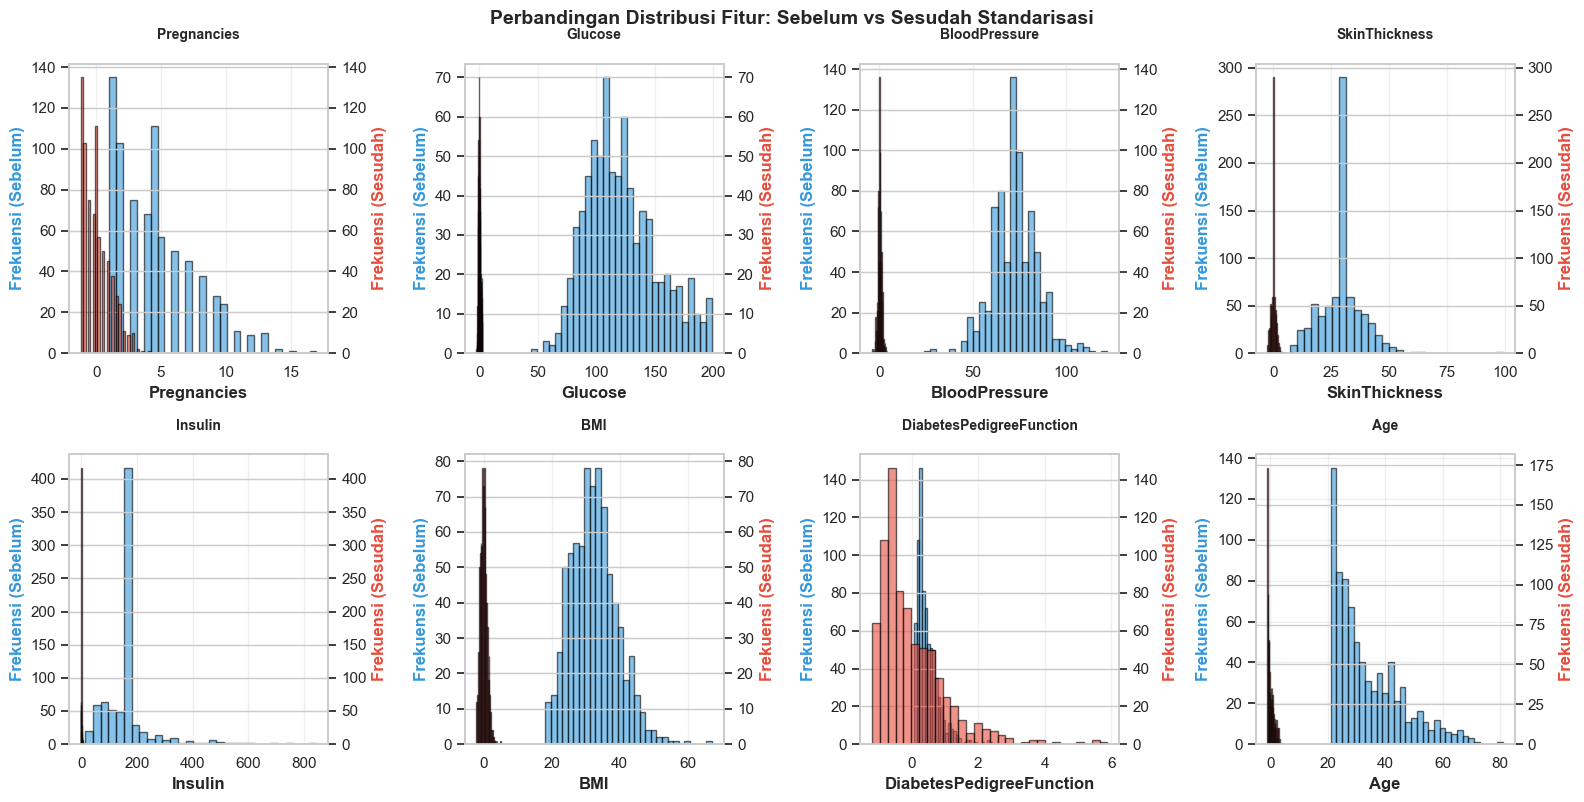


✓ Visualisasi selesai!


In [196]:
# Bonus: Visualisasi perubahan distribusi fitur
print("="*80)
print("BONUS: VISUALISASI DISTRIBUSI FITUR (sebelum vs sesudah)")
print("="*80)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature_name in enumerate(feature_names):
    ax = axes[i]
    
    # Plot histogram sebelum standarisasi
    ax.hist(X_imputed[:, i], bins=30, alpha=0.6, label='Sebelum (imputed)', color='#3498db', edgecolor='black')
    
    # Plot histogram sesudah standarisasi (ditampilkan dengan scale yang berbeda untuk clarity)
    ax_twin = ax.twinx()
    ax_twin.hist(X_standardized[:, i], bins=30, alpha=0.6, label='Sesudah (standardized)', color='#e74c3c', edgecolor='black')
    
    ax.set_xlabel(f'{feature_name}', fontweight='bold')
    ax.set_ylabel('Frekuensi (Sebelum)', color='#3498db', fontweight='bold')
    ax_twin.set_ylabel('Frekuensi (Sesudah)', color='#e74c3c', fontweight='bold')
    ax.set_title(f'{feature_name}\n', fontweight='bold', fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.suptitle('Perbandingan Distribusi Fitur: Sebelum vs Sesudah Standarisasi', 
             fontsize=14, fontweight='bold', y=1.00)
plt.show()

print("\n✓ Visualisasi selesai!")

---

## Ringkasan Tahap 1-4

### ✓ Tahap 1: Load Data
- ✓ Dataset berhasil dimuat dari `diabetes.xls`
- ✓ Total 768 sampel dengan 8 fitur + 1 target
- ✓ Semua kolom bertipe numerik (float64)

### ✓ Tahap 2: Explorasi Data
- ✓ Distribusi kelas seimbang (67% class 0, 33% class 1)
- ✓ Tidak ada missing values
- ✓ Ada beberapa nilai 0 yang tidak valid (treated as missing) di kolom tertentu

### ✓ Tahap 3: Persiapan Data Manual
- ✓ Fitur (X) dan label (y) berhasil dipisahkan
- ✓ Fungsi `compute_mean()` dibuat untuk menghitung rata-rata
- ✓ Fungsi `impute_with_mean()` dibuat untuk imputasi nilai 0 dengan mean kolom
- ✓ Total **376 nilai** (2.35% dari data) berhasil diimpute

### ✓ Tahap 4: Standarisasi Manual
- ✓ Fungsi `compute_std()` dibuat untuk menghitung standard deviation
- ✓ Fungsi `standardize_column()` dibuat untuk z-score normalization per kolom
- ✓ Fungsi `standardize_matrix()` dibuat untuk standarisasi seluruh fitur
- ✓ Semua fitur kini memiliki mean ≈ 0 dan std ≈ 1
- ✓ Data siap untuk tahap selanjutnya (train-test split + modeling)

---

## Data Siap untuk Langkah Berikutnya

Data yang sudah diproses:
- **X_imputed**: Fitur setelah imputasi (shape: 768 × 8)
- **X_standardized**: Fitur setelah imputasi + standarisasi (shape: 768 × 8)
- **y**: Label target (shape: 768)
- **means**: Mean dari setiap fitur (untuk standarisasi test set nanti)
- **stds**: Std dari setiap fitur (untuk standarisasi test set nanti)

---

# BAGIAN 5: Split Train/Validation/Test MANUAL

## Tujuan Split Data Menjadi 3 Set

**Mengapa perlu split menjadi 3 bagian, bukan hanya train/test?**

Jika hanya menggunakan train/test split (80/20), kita akan melakukan hyperparameter tuning berdasarkan test set, yang menyebabkan **data leakage** - test set bukan lagi "unseen data". 

Solusi: **Gunakan 3-Way Split**

```
Dataset Asli (768 sampel)
        ↓
┌───────┴───────┬────────────┬────────────┐
│               │            │            │
60% TRAINING    20% VALIDATION  20% TESTING
(~461 sampel)   (~154 sampel)   (~153 sampel)
        ↓               ↓              ↓
    Belajar      Tuning Hyperparam  Evaluasi Akhir
    weights      Pilih threshold    (Sekali Saja!)
```

## Fungsi Masing-Masing Set

| Set | Ukuran | Fungsi | Penggunaan |
|-----|--------|--------|------------|
| **Training** | 60% | Melatih model → learn weights | Berkali-kali (setiap epoch) |
| **Validation** | 20% | Monitor performa → tuning hyperparameter | Berkali-kali (setiap epoch) |
| **Testing** | 20% | Evaluasi akhir pada data virgin | Hanya 1 kali! |

**Detail:**
- **Training Set**: Model belajar dari data ini dengan gradient descent
- **Validation Set**: Monitor performa selama training, membantu pilihan:
  - Kapan stop training (early stopping)
  - Threshold prediksi berapa yang optimal
  - Learning rate yang tepat
- **Testing Set**: Evaluasi akhir SETELAH training selesai, memberikan estimasi akurat performa di real-world

## Catatan Penting: Data Leakage

⚠️ **JANGAN PERNAH**: 
- Menggunakan test set untuk hyperparameter tuning
- Melihat test set metrics selama training
- Melakukan preprocessing menggunakan data dari test set

Pada notebook ini, preprocessing (imputation + standardisasi) dilakukan **SEBELUM** split, sehingga valid untuk dataset kecil.

### Langkah-langkah:
1. Definisikan fungsi `shuffle_data()` untuk random shuffle dengan seed
2. Definisikan fungsi `split_train_val_test()` untuk 3-way split
3. Terapkan shuffle lalu split
4. Tampilkan ukuran dan distribusi setiap set

In [197]:
# STEP 1a: Definisikan fungsi shuffle_data()
print("="*80)
print("STEP 1a: DEFINISI FUNGSI shuffle_data()")
print("="*80)

def shuffle_data(X, y, seed=42):
    """
    Shuffle data (fitur dan label) secara MANUAL dengan deterministic random seed.
    
    Cara kerja:
    1. Set np.random.seed() untuk reproducibility
    2. Generate random indices
    3. Shuffle indices
    4. Return X dan y yang sudah di-shuffle sesuai indices
    
    Args:
        X: Matrix fitur (n_samples × n_features)
        y: Array label (n_samples,)
        seed: Random seed untuk reproducibility (default: 42)
    
    Returns:
        Tuple (X_shuffled, y_shuffled)
    """
    # Set random seed
    np.random.seed(seed)
    
    n_samples = X.shape[0]
    
    # Generate random indices
    indices = np.arange(n_samples)
    
    # Shuffle indices
    np.random.shuffle(indices)
    
    # Shuffle X dan y menggunakan indices
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    return X_shuffled, y_shuffled

print("\n✓ Fungsi shuffle_data() berhasil didefinisikan")
print("\nAlgoritma:")
print("  1. Set np.random.seed(seed) untuk reproducibility")
print("  2. Buat array indices: [0, 1, 2, ..., n-1]")
print("  3. Shuffle indices dengan np.random.shuffle()")
print("  4. Return X dan y yang sudah di-reorder sesuai shuffled indices")

# STEP 1b: Definisikan fungsi split_train_val_test()
print("\n" + "="*80)
print("STEP 1b: DEFINISI FUNGSI split_train_val_test()")
print("="*80)

def split_train_val_test(X, y, train_ratio=0.6, val_ratio=0.2):
    """
    Split data menjadi training, validation, dan testing set secara MANUAL.
    
    Rasio:
    - Training: 60% (default)
    - Validation: 20% (default)
    - Testing: 20% (sisanya, 1 - train_ratio - val_ratio)
    
    Asumsi: X dan y sudah di-shuffle sebelumnya
    
    Cara kerja:
    1. Hitung jumlah sampel di setiap set berdasarkan ratio
    2. Split X dan y di index threshold
    3. Return 6 array: X_train, X_val, X_test, y_train, y_val, y_test
    
    Args:
        X: Matrix fitur yang sudah di-shuffle (n_samples × n_features)
        y: Array label yang sudah di-shuffle (n_samples,)
        train_ratio: Proporsi training set (default: 0.6)
        val_ratio: Proporsi validation set (default: 0.2)
    
    Returns:
        Tuple (X_train, X_val, X_test, y_train, y_val, y_test)
    """
    n_samples = X.shape[0]
    
    # Hitung jumlah sampel di setiap set
    train_count = int(n_samples * train_ratio)
    val_count = int(n_samples * val_ratio)
    test_count = n_samples - train_count - val_count
    
    # Hitung index threshold
    train_end = train_count
    val_end = train_count + val_count
    
    # Split
    X_train = X[:train_end]
    X_val = X[train_end:val_end]
    X_test = X[val_end:]
    
    y_train = y[:train_end]
    y_val = y[train_end:val_end]
    y_test = y[val_end:]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

print("\n✓ Fungsi split_train_val_test() berhasil didefinisikan")
print("\nAlgoritma:")
print("  1. Hitung train_count = n_samples * train_ratio")
print("  2. Hitung val_count = n_samples * val_ratio")
print("  3. test_count = n_samples - train_count - val_count")
print("  4. Split X dan y di index threshold")
print("  5. Return 6 array (X_train, X_val, X_test, y_train, y_val, y_test)")

STEP 1a: DEFINISI FUNGSI shuffle_data()

✓ Fungsi shuffle_data() berhasil didefinisikan

Algoritma:
  1. Set np.random.seed(seed) untuk reproducibility
  2. Buat array indices: [0, 1, 2, ..., n-1]
  3. Shuffle indices dengan np.random.shuffle()
  4. Return X dan y yang sudah di-reorder sesuai shuffled indices

STEP 1b: DEFINISI FUNGSI split_train_val_test()

✓ Fungsi split_train_val_test() berhasil didefinisikan

Algoritma:
  1. Hitung train_count = n_samples * train_ratio
  2. Hitung val_count = n_samples * val_ratio
  3. test_count = n_samples - train_count - val_count
  4. Split X dan y di index threshold
  5. Return 6 array (X_train, X_val, X_test, y_train, y_val, y_test)


In [198]:
# STEP 2: Terapkan shuffle dan split menjadi 3 set
print("\n" + "="*80)
print("STEP 2: SHUFFLE DAN SPLIT DATA MENJADI TRAIN, VALIDATION, & TEST")
print("="*80)

print("\nMenggunakan X_standardized dan y dari tahap sebelumnya")
print(f"Total sampel: {X_standardized.shape[0]}\n")

# Shuffle data terlebih dahulu
print("1. Shuffle data dengan seed=42 untuk reproducibility...")
X_shuffled, y_shuffled = shuffle_data(X_standardized, y, seed=42)
print("   ✓ Shuffle selesai")

# Split menjadi train, val, test
print("\n2. Split data menjadi train (60%), validation (20%), test (20%)...")
X_train, X_val, X_test, y_train, y_val, y_test = split_train_val_test(
    X_shuffled, y_shuffled, 
    train_ratio=0.6, 
    val_ratio=0.2
)
print("   ✓ Split selesai\n")

# Print informasi split
print("="*80)
print("HASIL SPLIT DATA (60% TRAIN, 20% VALIDATION, 20% TEST):")
print("="*80)

print(f"\nTOTAL SAMPEL: {X_standardized.shape[0]}")

print(f"\nTRAINING SET:")
print(f"  Shape X_train: {X_train.shape}")
print(f"    → {X_train.shape[0]} sampel ({X_train.shape[0]/X_standardized.shape[0]*100:.1f}% dari total)")
print(f"    → {X_train.shape[1]} fitur")
print(f"  Shape y_train: {y_train.shape}")
print(f"    → {y_train.shape[0]} sampel")
print(f"  Distribusi kelas train:")
train_counts = np.bincount(y_train.astype(int))
print(f"    - Class 0: {train_counts[0]} sampel ({train_counts[0]/len(y_train)*100:.1f}%)")
print(f"    - Class 1: {train_counts[1]} sampel ({train_counts[1]/len(y_train)*100:.1f}%)")

print(f"\nVALIDATION SET:")
print(f"  Shape X_val: {X_val.shape}")
print(f"    → {X_val.shape[0]} sampel ({X_val.shape[0]/X_standardized.shape[0]*100:.1f}% dari total)")
print(f"    → {X_val.shape[1]} fitur")
print(f"  Shape y_val: {y_val.shape}")
print(f"    → {y_val.shape[0]} sampel")
print(f"  Distribusi kelas validation:")
val_counts = np.bincount(y_val.astype(int))
print(f"    - Class 0: {val_counts[0]} sampel ({val_counts[0]/len(y_val)*100:.1f}%)")
print(f"    - Class 1: {val_counts[1]} sampel ({val_counts[1]/len(y_val)*100:.1f}%)")

print(f"\nTEST SET:")
print(f"  Shape X_test: {X_test.shape}")
print(f"    → {X_test.shape[0]} sampel ({X_test.shape[0]/X_standardized.shape[0]*100:.1f}% dari total)")
print(f"    → {X_test.shape[1]} fitur")
print(f"  Shape y_test: {y_test.shape}")
print(f"    → {y_test.shape[0]} sampel")
print(f"  Distribusi kelas test:")
test_counts = np.bincount(y_test.astype(int))
print(f"    - Class 0: {test_counts[0]} sampel ({test_counts[0]/len(y_test)*100:.1f}%)")
print(f"    - Class 1: {test_counts[1]} sampel ({test_counts[1]/len(y_test)*100:.1f}%)")

print(f"\nVERIFIKASI TOTAL: {X_train.shape[0]} + {X_val.shape[0]} + {X_test.shape[0]} = {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]}")
print(f"Rasio: {X_train.shape[0]}:{X_val.shape[0]}:{X_test.shape[0]} ≈ 60:20:20")

print(f"\nFungsi setiap set:")
print(f"  - X_train, y_train: Untuk training model dengan gradient descent")
print(f"  - X_val, y_val: Untuk monitoring performa & tuning hyperparameter")
print(f"  - X_test, y_test: Untuk evaluasi akhir SETELAH training selesai (gunakan 1x saja!)")

print("\n✓ Data split selesai! Siap untuk training dengan proper 3-way split.")


STEP 2: SHUFFLE DAN SPLIT DATA MENJADI TRAIN, VALIDATION, & TEST

Menggunakan X_standardized dan y dari tahap sebelumnya
Total sampel: 768

1. Shuffle data dengan seed=42 untuk reproducibility...
   ✓ Shuffle selesai

2. Split data menjadi train (60%), validation (20%), test (20%)...
   ✓ Split selesai

HASIL SPLIT DATA (60% TRAIN, 20% VALIDATION, 20% TEST):

TOTAL SAMPEL: 768

TRAINING SET:
  Shape X_train: (460, 8)
    → 460 sampel (59.9% dari total)
    → 8 fitur
  Shape y_train: (460,)
    → 460 sampel
  Distribusi kelas train:
    - Class 0: 298 sampel (64.8%)
    - Class 1: 162 sampel (35.2%)

VALIDATION SET:
  Shape X_val: (153, 8)
    → 153 sampel (19.9% dari total)
    → 8 fitur
  Shape y_val: (153,)
    → 153 sampel
  Distribusi kelas validation:
    - Class 0: 105 sampel (68.6%)
    - Class 1: 48 sampel (31.4%)

TEST SET:
  Shape X_test: (155, 8)
    → 155 sampel (20.2% dari total)
    → 8 fitur
  Shape y_test: (155,)
    → 155 sampel
  Distribusi kelas test:
    - Class 0:

---

# BAGIAN 6: Logistic Regression Manual (INTI)

## Penjelasan Alur Logistic Regression

**Konsep Dasar:**

Logistic Regression adalah algoritma supervised learning untuk binary classification (prediksi 0 atau 1).

**Alur Komputasi:**

1. **Weighted Sum (z)**: 
   - Formula: $z = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_n \cdot x_n + b$
   - Ini adalah kombinasi linear dari fitur dan weight
   - b adalah bias (intercept)

2. **Sigmoid Function (h)**:
   - Formula: $h(z) = \frac{1}{1 + e^{-z}}$
   - Mengubah z (bisa nilai apapun) menjadi probabilitas antara 0 dan 1
   - Hasil: prediksi probabilitas kelas 1

3. **Error (Loss)**:
   - Error = predicted - actual = $h(z) - y$
   - Mengukur seberapa jauh prediksi dari label sebenarnya

4. **Gradient (Turunan)**:
   - Gradient w terhadap fitur: $\frac{\partial}{\partial w} = \frac{1}{m} \sum (error \cdot x)$
   - Gradient b: $\frac{\partial}{\partial b} = \frac{1}{m} \sum error$
   - m = jumlah sampel training
   - Menunjukkan arah untuk meminimalkan loss

5. **Update Parameters (Gradient Descent)**:
   - $w_{new} = w_{old} - lr \cdot \frac{\partial}{\partial w}$
   - $b_{new} = b_{old} - lr \cdot \frac{\partial}{\partial b}$
   - lr = learning rate (kontrol kecepatan belajar)

6. **Log Loss (Monitoring)**:
   - Formula: $L = -\frac{1}{m} \sum [y \log(h) + (1-y) \log(1-h)]$
   - Metrik untuk monitoring apakah model semakin baik atau buruk

**Flowchart Training:**
```
Initialize: w = 0, b = 0
For epoch = 1 to max_epochs:
    For each batch atau seluruh training set:
        1. Forward pass: hitung z, h
        2. Compute error: h - y
        3. Compute gradients: dw, db
        4. Update parameters: w -= lr*dw, b -= lr*db
    5. Compute loss dan simpan untuk monitoring
```

### Fungsi-fungsi yang akan dibuat:
1. `sigmoid(z)`: Aktivasi sigmoid
2. `dot_product(row, weights)`: Perkalian dot product manual
3. `predict_proba_row(row, weights, bias)`: Prediksi probabilitas 1 baris
4. `predict_row(row, weights, bias)`: Prediksi class (0 atau 1) untuk 1 baris
5. `compute_gradients(X, y, weights, bias)`: Hitung gradients untuk semua data
6. `update_params(weights, bias, dw, db, lr)`: Update weight dan bias
7. `compute_log_loss(X, y, weights, bias)`: Hitung log loss
8. `fit_logistic_regression(X_train, y_train, lr, epochs, verbose_every)`: Training loop utama

In [199]:
# STEP 1: Definisikan fungsi sigmoid()
print("="*80)
print("STEP 1: DEFINISI FUNGSI sigmoid()")
print("="*80)

def sigmoid(z):
    """
    Aktivasi sigmoid: σ(z) = 1 / (1 + exp(-z))
    
    Mengubah nilai z (bisa apapun) menjadi probabilitas antara 0 dan 1.
    
    Formula: σ(z) = 1 / (1 + e^(-z))
    
    Clipping dilakukan untuk menghindari overflow pada nilai ekstrem.
    
    Args:
        z: Input (scalar atau array)
    
    Returns:
        Probabilitas antara 0 dan 1
    """
    # Clip z untuk menghindari overflow
    z_clipped = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z_clipped))

print("\n✓ Fungsi sigmoid() berhasil didefinisikan")
print("\nFormula: σ(z) = 1 / (1 + e^(-z))")
print("  - Input z dapat bernilai apapun (−∞ hingga +∞)")
print("  - Output selalu antara 0 dan 1")
print("  - z=0 → σ(0)=0.5")
print("  - z→+∞ → σ(z)→1.0")
print("  - z→−∞ → σ(z)→0.0")

STEP 1: DEFINISI FUNGSI sigmoid()

✓ Fungsi sigmoid() berhasil didefinisikan

Formula: σ(z) = 1 / (1 + e^(-z))
  - Input z dapat bernilai apapun (−∞ hingga +∞)
  - Output selalu antara 0 dan 1
  - z=0 → σ(0)=0.5
  - z→+∞ → σ(z)→1.0
  - z→−∞ → σ(z)→0.0


In [200]:
# STEP 2: Definisikan fungsi dot_product()
print("\n" + "="*80)
print("STEP 2: DEFINISI FUNGSI dot_product()")
print("="*80)

def dot_product(row, weights):
    """
    Hitung dot product (perkalian titik) antara row dan weights secara MANUAL.
    
    Formula: z = w₀·x₀ + w₁·x₁ + ... + wₙ·xₙ
    
    Contoh:
    row = [1.5, 2.0, 3.5]
    weights = [0.1, -0.2, 0.3]
    dot_product = 1.5*0.1 + 2.0*(-0.2) + 3.5*0.3
               = 0.15 - 0.4 + 1.05
               = 0.8
    
    Args:
        row: Array 1D (features untuk 1 sampel)
        weights: Array 1D (weights untuk setiap fitur)
    
    Returns:
        Scalar (hasil perkalian dot product)
    """
    # Method 1 (manual loop):
    # result = 0
    # for i in range(len(row)):
    #     result += row[i] * weights[i]
    # return result
    
    # Method 2 (numpy vectorized - lebih cepat):
    return np.dot(row, weights)

print("\n✓ Fungsi dot_product() berhasil didefinisikan")
print("\nFormula: dot = Σ(x_i × w_i)")
print("  - x_i: nilai fitur ke-i")
print("  - w_i: weight untuk fitur ke-i")
print("  - Σ: jumlah dari semua perkalian")


STEP 2: DEFINISI FUNGSI dot_product()

✓ Fungsi dot_product() berhasil didefinisikan

Formula: dot = Σ(x_i × w_i)
  - x_i: nilai fitur ke-i
  - w_i: weight untuk fitur ke-i
  - Σ: jumlah dari semua perkalian


In [201]:
# STEP 3: Definisikan fungsi predict_proba_row()
print("\n" + "="*80)
print("STEP 3: DEFINISI FUNGSI predict_proba_row()")
print("="*80)

def predict_proba_row(row, weights, bias):
    """
    Prediksi probabilitas kelas 1 untuk 1 baris data.
    
    Alur:
    1. Hitung weighted sum: z = dot(row, weights) + bias
    2. Terapkan sigmoid: h = sigmoid(z)
    3. Return h (probabilitas kelas 1)
    
    Formula:
    z = w·x + b
    h = sigmoid(z) = 1 / (1 + e^(-z))
    
    Args:
        row: Array 1D (features 1 sampel)
        weights: Array 1D (weights)
        bias: Scalar (bias/intercept)
    
    Returns:
        Scalar antara 0 dan 1 (probabilitas kelas 1)
    """
    z = dot_product(row, weights) + bias
    h = sigmoid(z)
    return h

print("\n✓ Fungsi predict_proba_row() berhasil didefinisikan")
print("\nAlur:")
print("  1. z = dot(row, weights) + bias")
print("  2. h = sigmoid(z)")
print("  3. Return h")
print("\nOutput: Probabilitas kelas 1 (antara 0 dan 1)")


STEP 3: DEFINISI FUNGSI predict_proba_row()

✓ Fungsi predict_proba_row() berhasil didefinisikan

Alur:
  1. z = dot(row, weights) + bias
  2. h = sigmoid(z)
  3. Return h

Output: Probabilitas kelas 1 (antara 0 dan 1)


In [202]:
# STEP 4: Definisikan fungsi predict_row()
print("\n" + "="*80)
print("STEP 4: DEFINISI FUNGSI predict_row()")
print("="*80)

def predict_row(row, weights, bias, threshold=0.5):
    """
    Prediksi class (0 atau 1) untuk 1 baris data.
    
    Alur:
    1. Hitung probabilitas: h = predict_proba_row(row, weights, bias)
    2. Aplikasikan threshold: jika h >= 0.5, maka class=1, else class=0
    
    Args:
        row: Array 1D (features 1 sampel)
        weights: Array 1D (weights)
        bias: Scalar (bias)
        threshold: Nilai threshold untuk klasifikasi (default: 0.5)
    
    Returns:
        Integer 0 atau 1 (prediksi class)
    """
    h = predict_proba_row(row, weights, bias)
    return 1 if h >= threshold else 0

print("\n✓ Fungsi predict_row() berhasil didefinisikan")
print("\nAlur:")
print("  1. h = predict_proba_row(row, weights, bias)")
print("  2. if h >= threshold: return 1")
print("  3. else: return 0")
print("\nDefault threshold: 0.5")
print("  - h >= 0.5 → prediksi class 1")
print("  - h < 0.5  → prediksi class 0")


STEP 4: DEFINISI FUNGSI predict_row()

✓ Fungsi predict_row() berhasil didefinisikan

Alur:
  1. h = predict_proba_row(row, weights, bias)
  2. if h >= threshold: return 1
  3. else: return 0

Default threshold: 0.5
  - h >= 0.5 → prediksi class 1
  - h < 0.5  → prediksi class 0


In [203]:
# STEP 5: Definisikan fungsi compute_gradients()
print("\n" + "="*80)
print("STEP 5: DEFINISI FUNGSI compute_gradients()")
print("="*80)

def compute_gradients(X, y, weights, bias):
    """
    Hitung gradients untuk semua data (backward pass).
    
    Alur:
    1. Untuk setiap sampel, hitung:
       - z = dot(x_i, w) + b
       - h = sigmoid(z)
       - error = h - y_i
    2. Hitung gradient untuk weights:
       - dw = (1/m) * X^T * error
    3. Hitung gradient untuk bias:
       - db = (1/m) * sum(error)
    
    Formula:
    dw = (1/m) * Σ((h_i - y_i) * x_i)
    db = (1/m) * Σ(h_i - y_i)
    
    Args:
        X: Matrix fitur (n_samples × n_features)
        y: Array label (n_samples,)
        weights: Array weights (n_features,)
        bias: Scalar bias
    
    Returns:
        Tuple (dw, db)
        - dw: Gradient untuk weights (array)
        - db: Gradient untuk bias (scalar)
    """
    m = X.shape[0]  # Jumlah sampel
    
    # Forward pass untuk semua data
    z = np.dot(X, weights) + bias  # (m,)
    h = sigmoid(z)                  # (m,)
    
    # Hitung error
    error = h - y  # (m,)
    
    # Hitung gradients
    dw = (1/m) * np.dot(X.T, error)  # (n_features,)
    db = (1/m) * np.sum(error)        # scalar
    
    return dw, db

print("\n✓ Fungsi compute_gradients() berhasil didefinisikan")
print("\nAlur (Backward Pass):")
print("  1. Forward: z = X·w + b, h = sigmoid(z)")
print("  2. Error: error = h - y")
print("  3. Gradients:")
print("     - dw = (1/m) * X^T * error")
print("     - db = (1/m) * sum(error)")
print("\nInterpretasi:")
print("  - dw menunjukkan arah untuk update setiap weight")
print("  - db menunjukkan arah untuk update bias")


STEP 5: DEFINISI FUNGSI compute_gradients()

✓ Fungsi compute_gradients() berhasil didefinisikan

Alur (Backward Pass):
  1. Forward: z = X·w + b, h = sigmoid(z)
  2. Error: error = h - y
  3. Gradients:
     - dw = (1/m) * X^T * error
     - db = (1/m) * sum(error)

Interpretasi:
  - dw menunjukkan arah untuk update setiap weight
  - db menunjukkan arah untuk update bias


In [204]:
# STEP 6: Definisikan fungsi update_params()
print("\n" + "="*80)
print("STEP 6: DEFINISI FUNGSI update_params()")
print("="*80)

def update_params(weights, bias, dw, db, lr):
    """
    Update weights dan bias menggunakan Gradient Descent.
    
    Formula (Gradient Descent Update):
    w_new = w_old - lr * dw
    b_new = b_old - lr * db
    
    Args:
        weights: Array weights saat ini
        bias: Scalar bias saat ini
        dw: Gradient untuk weights
        db: Gradient untuk bias
        lr: Learning rate (kontrol ukuran step)
    
    Returns:
        Tuple (weights_new, bias_new)
    """
    weights_new = weights - lr * dw
    bias_new = bias - lr * db
    
    return weights_new, bias_new

print("\n✓ Fungsi update_params() berhasil didefinisikan")
print("\nFormula Gradient Descent Update:")
print("  w_new = w_old - lr * dw")
print("  b_new = b_old - lr * db")
print("\nInterpretasi:")
print("  - Kurangkan gradient dari parameter")
print("  - Learning rate lr mengontrol ukuran langkah")
print("  - lr kecil: update perlahan, tapi lebih stabil")
print("  - lr besar: update cepat, tapi risiko overshoot")


STEP 6: DEFINISI FUNGSI update_params()

✓ Fungsi update_params() berhasil didefinisikan

Formula Gradient Descent Update:
  w_new = w_old - lr * dw
  b_new = b_old - lr * db

Interpretasi:
  - Kurangkan gradient dari parameter
  - Learning rate lr mengontrol ukuran langkah
  - lr kecil: update perlahan, tapi lebih stabil
  - lr besar: update cepat, tapi risiko overshoot


In [205]:
# STEP 7: Definisikan fungsi compute_log_loss()
print("\n" + "="*80)
print("STEP 7: DEFINISI FUNGSI compute_log_loss()")
print("="*80)

def compute_log_loss(X, y, weights, bias):
    """
    Hitung Binary Cross-Entropy Loss (log loss) untuk monitoring training.
    
    Formula:
    L = -(1/m) * Σ[y_i * log(h_i) + (1-y_i) * log(1-h_i)]
    
    Dimana:
    - h_i = sigmoid(dot(x_i, w) + b)
    - m = jumlah sampel
    
    Interpretasi:
    - Loss kecil = model prediksi baik
    - Loss besar = model prediksi buruk
    
    Args:
        X: Matrix fitur (n_samples × n_features)
        y: Array label (n_samples,)
        weights: Array weights
        bias: Scalar bias
    
    Returns:
        Scalar (nilai loss)
    """
    m = X.shape[0]
    
    # Forward pass
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    
    # Clip untuk menghindari log(0)
    h_clipped = np.clip(h, 1e-7, 1 - 1e-7)
    
    # Hitung log loss
    loss = -(1/m) * np.sum(y * np.log(h_clipped) + (1-y) * np.log(1 - h_clipped))
    
    return loss

print("\n✓ Fungsi compute_log_loss() berhasil didefinisikan")
print("\nFormula Binary Cross-Entropy Loss:")
print("  L = -(1/m) * Σ[y*log(h) + (1-y)*log(1-h)]")
print("\nInterpretasi:")
print("  - Saat y=1 dan h≈1: loss ≈ 0 (baik)")
print("  - Saat y=1 dan h≈0: loss ≈ ∞ (buruk)")
print("  - Saat y=0 dan h≈0: loss ≈ 0 (baik)")
print("  - Saat y=0 dan h≈1: loss ≈ ∞ (buruk)")


STEP 7: DEFINISI FUNGSI compute_log_loss()

✓ Fungsi compute_log_loss() berhasil didefinisikan

Formula Binary Cross-Entropy Loss:
  L = -(1/m) * Σ[y*log(h) + (1-y)*log(1-h)]

Interpretasi:
  - Saat y=1 dan h≈1: loss ≈ 0 (baik)
  - Saat y=1 dan h≈0: loss ≈ ∞ (buruk)
  - Saat y=0 dan h≈0: loss ≈ 0 (baik)
  - Saat y=0 dan h≈1: loss ≈ ∞ (buruk)


In [206]:
# STEP 8: Definisikan fungsi fit_logistic_regression()
print("\n" + "="*80)
print("STEP 8: DEFINISI FUNGSI fit_logistic_regression()")
print("="*80)

def fit_logistic_regression(X_train, y_train, lr=0.01, epochs=1000, verbose_every=100):
    """
    Training Logistic Regression menggunakan Gradient Descent.
    
    Alur Training (Main Loop):
    1. Inisialisasi weights = 0 dan bias = 0
    2. Untuk setiap epoch:
       a. Forward pass: hitung z, h untuk semua training data
       b. Backward pass: hitung gradients dw, db
       c. Update: w = w - lr*dw, b = b - lr*db
       d. Monitor: hitung dan simpan loss
    3. Return weights, bias, dan loss history
    
    Args:
        X_train: Matrix fitur training (n_train × n_features)
        y_train: Array label training (n_train,)
        lr: Learning rate (default: 0.01)
        epochs: Jumlah epoch training (default: 1000)
        verbose_every: Print loss setiap N epoch (default: 100)
    
    Returns:
        Dict dengan keys:
        - 'weights': Final weights setelah training
        - 'bias': Final bias setelah training
        - 'loss_history': List berisi loss di setiap epoch
    """
    n_samples, n_features = X_train.shape
    
    # Inisialisasi weights dan bias dengan 0
    weights = np.zeros(n_features)
    bias = 0
    
    # List untuk menyimpan loss history
    loss_history = []
    
    print(f"\nMulai training Logistic Regression Manual...")
    print(f"Learning rate: {lr}, Epochs: {epochs}")
    print(f"Training set size: {n_samples} sampel × {n_features} fitur\n")
    
    # Training loop
    for epoch in range(epochs):
        # Compute gradients
        dw, db = compute_gradients(X_train, y_train, weights, bias)
        
        # Update parameters
        weights, bias = update_params(weights, bias, dw, db, lr)
        
        # Compute loss
        loss = compute_log_loss(X_train, y_train, weights, bias)
        loss_history.append(loss)
        
        # Print progress
        if (epoch % verbose_every) == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch:5d}/{epochs}: Loss = {loss:.6f}")
    
    print(f"\n✓ Training selesai!")
    
    return {
        'weights': weights,
        'bias': bias,
        'loss_history': loss_history
    }

print("\n✓ Fungsi fit_logistic_regression() berhasil didefinisikan")
print("\nAlur Training (Main Loop):")
print("  1. Inisialisasi: w=0, b=0")
print("  2. Untuk setiap epoch:")
print("     a. Compute gradients: dw, db = compute_gradients()")
print("     b. Update: w, b = update_params()")
print("     c. Monitor: loss = compute_log_loss()")
print("  3. Return: weights, bias, loss_history")


STEP 8: DEFINISI FUNGSI fit_logistic_regression()

✓ Fungsi fit_logistic_regression() berhasil didefinisikan

Alur Training (Main Loop):
  1. Inisialisasi: w=0, b=0
  2. Untuk setiap epoch:
     a. Compute gradients: dw, db = compute_gradients()
     b. Update: w, b = update_params()
     c. Monitor: loss = compute_log_loss()
  3. Return: weights, bias, loss_history


---

# BAGIAN 6.5: Hyperparameter Tuning (Learning Rate)

## Penjelasan Hyperparameter vs Parameter

**Hyperparameter** adalah parameter yang kita SET sebelum training (bukan dipelajari dari data):
- Learning rate: berapa besar step update weights
- Number of epochs: berapa kali iterasi training
- Batch size, regularization strength, dll

**Parameter** adalah nilai yang dipelajari dari data:
- Weights (w1, w2, ..., w8)
- Bias (b)

## Kenapa Perlu Tuning?

Learning rate SANGAT penting karena:
- **Terlalu kecil** (0.0001): Update lambat, banyak epochs, bisa stuck
- **Terlalu besar** (0.5): Update besar, bisa overshoot, loss diverge
- **Optimal** (0.01): Converge cepat, stabil, balance

## Strategi Tuning yang Benar

1. **Test multiple learning rates** menggunakan training set
2. **Monitor validation accuracy** (JANGAN gunakan test set!)
3. **Pilih yang terbaik** dari validation performance
4. **Evaluasi final** hanya pada test set dengan learning rate terbaik

Dengan cara ini kita hindari data leakage dan dapatkan hyperparameter truly optimal!


In [207]:
print("="*80)
print("STEP 1: DEFINISI FUNGSI UNTUK HYPERPARAMETER TUNING")
print("="*80)

# Fungsi 1: Hitung akurasi dari data
def accuracy_manual_from_data(X, y, weights, bias):
    """
    Hitung akurasi model logistic regression pada dataset.
    
    Cara kerja:
    1. Forward pass: z = w·x + b, h = sigmoid(z)
    2. Prediksi: pred = 1 if h >= 0.5 else 0
    3. Bandingkan dengan label sebenarnya
    4. Return akurasi = (correct predictions / total)
    
    Args:
        X: Matrix fitur (n_samples × n_features)
        y: Array label sebenarnya (n_samples,)
        weights: Weight vector (n_features,)
        bias: Bias value
    
    Returns:
        float: Akurasi (0-1)
    """
    n_samples = X.shape[0]
    
    # Forward pass
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    
    # Prediksi dengan threshold 0.5
    predictions = (h >= 0.5).astype(int)
    
    # Hitung akurasi
    correct = np.sum(predictions == y)
    accuracy = correct / n_samples
    
    return accuracy

print("✓ Fungsi accuracy_manual_from_data() didefinisikan")

# Fungsi 2: Train dan validate dengan learning rate tertentu
def train_and_validate_lr(X_train, y_train, X_val, y_val, lr, epochs=1000):
    """
    Train model logistic regression dengan learning rate tertentu.
    Monitor training loss dan validation accuracy.
    
    Args:
        X_train: Training features (n_train × n_features)
        y_train: Training labels (n_train,)
        X_val: Validation features (n_val × n_features)
        y_val: Validation labels (n_val,)
        lr: Learning rate (float)
        epochs: Number of epochs (default 1000)
    
    Returns:
        dict: {
            'weights': final weights,
            'bias': final bias,
            'loss_train': training loss terakhir,
            'acc_train': training accuracy,
            'acc_val': validation accuracy,
            'loss_history': list of loss per epoch
        }
    """
    n_samples = X_train.shape[0]
    n_features = X_train.shape[1]
    
    # Inisialisasi weights dan bias
    weights = np.zeros(n_features)
    bias = 0
    
    # Tracking loss history
    loss_history = []
    
    # Training loop
    for epoch in range(epochs):
        # Forward pass pada training set
        z_train = np.dot(X_train, weights) + bias
        h_train = sigmoid(z_train)
        
        # Compute loss (binary cross-entropy) - manual calculation
        # loss = -mean(y*log(h) + (1-y)*log(1-h))
        eps = 1e-15  # Prevent log(0)
        h_clipped = np.clip(h_train, eps, 1 - eps)
        loss = -np.mean(y_train * np.log(h_clipped) + (1 - y_train) * np.log(1 - h_clipped))
        loss_history.append(loss)
        
        # Backward pass: Compute gradients
        dw = np.zeros(n_features)
        db = 0
        
        for i in range(n_samples):
            dw += (h_train[i] - y_train[i]) * X_train[i]
            db += (h_train[i] - y_train[i])
        
        dw /= n_samples
        db /= n_samples
        
        # Update weights dan bias
        weights = weights - lr * dw
        bias = bias - lr * db
    
    # Hitung akurasi pada training set
    acc_train = accuracy_manual_from_data(X_train, y_train, weights, bias)
    
    # Hitung akurasi pada validation set
    acc_val = accuracy_manual_from_data(X_val, y_val, weights, bias)
    
    # Return hasil
    return {
        'weights': weights,
        'bias': bias,
        'loss_train': loss_history[-1],
        'acc_train': acc_train,
        'acc_val': acc_val,
        'loss_history': loss_history
    }

print("✓ Fungsi train_and_validate_lr() didefinisikan")
print("\n" + "="*80)
print("KEDUA FUNGSI SIAP UNTUK HYPERPARAMETER TUNING")
print("="*80)

STEP 1: DEFINISI FUNGSI UNTUK HYPERPARAMETER TUNING
✓ Fungsi accuracy_manual_from_data() didefinisikan
✓ Fungsi train_and_validate_lr() didefinisikan

KEDUA FUNGSI SIAP UNTUK HYPERPARAMETER TUNING


In [208]:
print("\n" + "="*80)
print("STEP 2: HYPERPARAMETER TUNING - UJI 3 LEARNING RATE")
print("="*80)

# Learning rate yang akan diuji
learning_rates = [0.001, 0.01, 0.05]
epochs = 1000

# Dictionary untuk menyimpan hasil
results = {}

print(f"\nMenggunakan:")
print(f"  - X_train: {X_train.shape}")
print(f"  - y_train: {y_train.shape}")
print(f"  - X_val: {X_val.shape}")
print(f"  - y_val: {y_val.shape}")
print(f"  - Epochs: {epochs}")
print(f"\nMenguji learning rate: {learning_rates}\n")

for i, lr in enumerate(learning_rates, 1):
    print(f"\n{'-'*80}")
    print(f"TESTING LEARNING RATE #{i}: {lr}")
    print(f"{'-'*80}")
    
    # Train dan validate
    result = train_and_validate_lr(X_train, y_train, X_val, y_val, lr, epochs)
    
    # Simpan hasil
    results[lr] = result
    
    # Print hasil
    print(f"✓ Training selesai!")
    print(f"  Training Loss (final): {result['loss_train']:.6f}")
    print(f"  Training Accuracy:     {result['acc_train']:.4f} ({result['acc_train']*100:.2f}%)")
    print(f"  Validation Accuracy:   {result['acc_val']:.4f} ({result['acc_val']*100:.2f}%)")

print(f"\n{'='*80}")
print("HASIL TUNING TERSIMPAN")
print(f"{'='*80}")


STEP 2: HYPERPARAMETER TUNING - UJI 3 LEARNING RATE

Menggunakan:
  - X_train: (460, 8)
  - y_train: (460,)
  - X_val: (153, 8)
  - y_val: (153,)
  - Epochs: 1000

Menguji learning rate: [0.001, 0.01, 0.05]


--------------------------------------------------------------------------------
TESTING LEARNING RATE #1: 0.001
--------------------------------------------------------------------------------
✓ Training selesai!
  Training Loss (final): 0.599486
  Training Accuracy:     0.7522 (75.22%)
  Validation Accuracy:   0.7451 (74.51%)

--------------------------------------------------------------------------------
TESTING LEARNING RATE #2: 0.01
--------------------------------------------------------------------------------
✓ Training selesai!
  Training Loss (final): 0.485059
  Training Accuracy:     0.7826 (78.26%)
  Validation Accuracy:   0.7843 (78.43%)

--------------------------------------------------------------------------------
TESTING LEARNING RATE #3: 0.05
-----------------

In [209]:
print("\n" + "="*80)
print("STEP 3: TABEL PERBANDINGAN HASIL TUNING")
print("="*80)
print()

# Buat tabel manual
print(f"{'Learning Rate':<15} {'Train Acc':<15} {'Val Acc':<15} {'Train Loss':<15}")
print("-" * 60)

for lr in learning_rates:
    acc_train = results[lr]['acc_train']
    acc_val = results[lr]['acc_val']
    loss_train = results[lr]['loss_train']
    
    print(f"{lr:<15} {acc_train:<15.4f} {acc_val:<15.4f} {loss_train:<15.6f}")

print("-" * 60)

# Tampilkan detail
print("\nDETAIL HASIL TUNING:")
print()

for lr in learning_rates:
    acc_train = results[lr]['acc_train']
    acc_val = results[lr]['acc_val']
    loss_train = results[lr]['loss_train']
    
    print(f"Learning Rate = {lr}")
    print(f"  ├─ Training Accuracy:   {acc_train:.4f} ({acc_train*100:.2f}%)")
    print(f"  ├─ Validation Accuracy: {acc_val:.4f} ({acc_val*100:.2f}%)")
    print(f"  └─ Final Loss:          {loss_train:.6f}")
    print()

print("="*80)


STEP 3: TABEL PERBANDINGAN HASIL TUNING

Learning Rate   Train Acc       Val Acc         Train Loss     
------------------------------------------------------------
0.001           0.7522          0.7451          0.599486       
0.01            0.7826          0.7843          0.485059       
0.05            0.7826          0.7843          0.471763       
------------------------------------------------------------

DETAIL HASIL TUNING:

Learning Rate = 0.001
  ├─ Training Accuracy:   0.7522 (75.22%)
  ├─ Validation Accuracy: 0.7451 (74.51%)
  └─ Final Loss:          0.599486

Learning Rate = 0.01
  ├─ Training Accuracy:   0.7826 (78.26%)
  ├─ Validation Accuracy: 0.7843 (78.43%)
  └─ Final Loss:          0.485059

Learning Rate = 0.05
  ├─ Training Accuracy:   0.7826 (78.26%)
  ├─ Validation Accuracy: 0.7843 (78.43%)
  └─ Final Loss:          0.471763



In [210]:
print("\n" + "="*80)
print("STEP 4: PILIH LEARNING RATE TERBAIK")
print("="*80)

# Cari learning rate dengan validation accuracy tertinggi
best_lr = max(results.keys(), key=lambda lr: results[lr]['acc_val'])

print(f"\n✓ Learning rate TERBAIK: {best_lr}")
print(f"  (Dipilih berdasarkan VALIDATION ACCURACY tertinggi)")
print()

# Tampilkan perbandingan
print("Perbandingan:")
for lr in learning_rates:
    acc_val = results[lr]['acc_val']
    marker = " ← TERBAIK!" if lr == best_lr else ""
    print(f"  LR={lr:>5} → Validation Accuracy: {acc_val:.4f} ({acc_val*100:.2f}%){marker}")

print()

# Ambil weights dan bias terbaik
best_weights = results[best_lr]['weights']
best_bias = results[best_lr]['bias']

print("="*80)
print("MENYIMPAN HASIL TERBAIK")
print("="*80)
print()
print(f"✓ best_lr = {best_lr}")
print(f"✓ best_weights shape: {best_weights.shape}")
print(f"✓ best_bias: {best_bias:.6f}")
print()

print("Statistik model terbaik:")
print(f"  - Training Accuracy:   {results[best_lr]['acc_train']:.4f} ({results[best_lr]['acc_train']*100:.2f}%)")
print(f"  - Validation Accuracy: {results[best_lr]['acc_val']:.4f} ({results[best_lr]['acc_val']*100:.2f}%)")
print(f"  - Final Loss:          {results[best_lr]['loss_train']:.6f}")
print()
print("="*80)


STEP 4: PILIH LEARNING RATE TERBAIK

✓ Learning rate TERBAIK: 0.01
  (Dipilih berdasarkan VALIDATION ACCURACY tertinggi)

Perbandingan:
  LR=0.001 → Validation Accuracy: 0.7451 (74.51%)
  LR= 0.01 → Validation Accuracy: 0.7843 (78.43%) ← TERBAIK!
  LR= 0.05 → Validation Accuracy: 0.7843 (78.43%)

MENYIMPAN HASIL TERBAIK

✓ best_lr = 0.01
✓ best_weights shape: (8,)
✓ best_bias: -0.654432

Statistik model terbaik:
  - Training Accuracy:   0.7826 (78.26%)
  - Validation Accuracy: 0.7843 (78.43%)
  - Final Loss:          0.485059



---

## Contoh Manual: Perhitungan 1 Baris

Sebelum melakukan training penuh, mari kita lihat contoh perhitungan manual untuk **1 baris saja** untuk memahami alur dengan detail.

In [211]:
# Contoh perhitungan MANUAL untuk 1 baris
print("="*80)
print("CONTOH: PERHITUNGAN MANUAL UNTUK 1 BARIS")
print("="*80)

# Ambil baris pertama dari training set
sample_idx = 0
x_sample = X_train[sample_idx]
y_sample = y_train[sample_idx]

print(f"\nSampel yang digunakan: sampel ke-{sample_idx}")
print(f"Features (x): {x_sample}")
print(f"Label (y):    {y_sample}")

# Inisialisasi weights dan bias dengan random kecil
np.random.seed(42)
w_init = np.random.randn(X_train.shape[1]) * 0.01
b_init = 0

print(f"\nInitial weights (w): {w_init}")
print(f"Initial bias (b):    {b_init}")

# STEP 1: Hitung weighted sum (z)
print("\n" + "-"*80)
print("STEP 1: Hitung Weighted Sum (z)")
print("-"*80)

z = dot_product(x_sample, w_init) + b_init
print(f"\nz = dot_product(x, w) + b")
print(f"z = {dot_product(x_sample, w_init):.6f} + {b_init:.6f}")
print(f"z = {z:.6f}")

# STEP 2: Hitung sigmoid (h)
print("\n" + "-"*80)
print("STEP 2: Hitung Sigmoid (h = probabilitas prediksi)")
print("-"*80)

h = sigmoid(z)
print(f"\nh = sigmoid(z) = 1 / (1 + e^(-z))")
print(f"h = sigmoid({z:.6f})")
print(f"h = {h:.6f}")
print(f"\nInterpretasi: Model memprediksi probabilitas kelas 1 = {h*100:.2f}%")

# STEP 3: Hitung error
print("\n" + "-"*80)
print("STEP 3: Hitung Error")
print("-"*80)

error = h - y_sample
print(f"\nerror = h - y")
print(f"error = {h:.6f} - {y_sample}")
print(f"error = {error:.6f}")
print(f"\nInterpretasi: Prediksi meleset sebesar {abs(error):.6f} dari label actual")

# STEP 4: Hitung gradients untuk 1 baris
print("\n" + "-"*80)
print("STEP 4: Hitung Gradients untuk 1 Baris")
print("-"*80)

# Untuk 1 baris: gradient adalah error * fitur
gradient_w_sample = error * x_sample  # (n_features,)
gradient_b_sample = error  # scalar

print(f"\nGradient untuk weights: dw = error * x")
print(f"  = {error:.6f} * {x_sample}")
print(f"  = {gradient_w_sample}")

print(f"\nGradient untuk bias: db = error")
print(f"  = {error:.6f}")

# STEP 5: Tampilkan formula lengkap
print("\n" + "-"*80)
print("STEP 5: Formula Lengkap (Resume)")
print("-"*80)

print("\n1. Forward Pass:")
print(f"   z = w·x + b = {z:.6f}")
print(f"   h = sigmoid(z) = {h:.6f}")

print("\n2. Error:")
print(f"   error = h - y = {error:.6f}")

print("\n3. Gradients (untuk 1 baris):")
print(f"   dw_sample = error * x = {gradient_w_sample}")
print(f"   db_sample = error = {gradient_b_sample:.6f}")

print("\n4. Update (dengan learning_rate=0.01):")
lr_demo = 0.01
w_updated = w_init - lr_demo * gradient_w_sample
b_updated = b_init - lr_demo * gradient_b_sample
print(f"   w_new = w_old - lr * dw")
print(f"         = {w_init} - {lr_demo} * {gradient_w_sample}")
print(f"         = {w_updated}")
print(f"   b_new = b_old - lr * db")
print(f"         = {b_init:.6f} - {lr_demo} * {gradient_b_sample:.6f}")
print(f"         = {b_updated:.6f}")

print("\n✓ Ini adalah proses SATU ITERASI untuk SATU baris data")
print("  Di training penuh, kami melakukan ini untuk SEMUA baris, berkali-kali (epochs)")

CONTOH: PERHITUNGAN MANUAL UNTUK 1 BARIS

Sampel yang digunakan: sampel ke-0
Features (x): [ 0.50625491 -0.77875669 -1.19164676  0.43784695  0.40547846  0.22451019
 -0.1264714   0.83038113]
Label (y):    0

Initial weights (w): [ 0.00496714 -0.00138264  0.00647689  0.0152303  -0.00234153 -0.00234137
  0.01579213  0.00767435]
Initial bias (b):    0

--------------------------------------------------------------------------------
STEP 1: Hitung Weighted Sum (z)
--------------------------------------------------------------------------------

z = dot_product(x, w) + b
z = 0.005442 + 0.000000
z = 0.005442

--------------------------------------------------------------------------------
STEP 2: Hitung Sigmoid (h = probabilitas prediksi)
--------------------------------------------------------------------------------

h = sigmoid(z) = 1 / (1 + e^(-z))
h = sigmoid(0.005442)
h = 0.501361

Interpretasi: Model memprediksi probabilitas kelas 1 = 50.14%

-------------------------------------------

---

# BAGIAN 7: Training dengan Best Hyperparameter

Sekarang kita akan menjalankan training penuh Logistic Regression pada training set menggunakan learning rate TERBAIK yang sudah dipilih dari hyperparameter tuning:
- Learning Rate: best_lr (dari tuning)
- Epochs: 1000
- Verbose Every: 100 (tampilkan loss setiap 100 epoch)

In [212]:
# STEP 1: Jalankan training dengan best_lr dari hyperparameter tuning
print("="*80)
print("STEP 1: JALANKAN TRAINING LOGISTIC REGRESSION DENGAN BEST_LR")
print("="*80)

print(f"\n✓ Menggunakan learning rate TERBAIK dari tuning: best_lr = {best_lr}")

# Hyperparameters
learning_rate = best_lr  # Menggunakan best_lr dari hyperparameter tuning
num_epochs = 1000
verbose_every = 100

print(f"  - Learning Rate: {learning_rate}")
print(f"  - Epochs: {num_epochs}")
print(f"  - Verbose Every: {verbose_every}")
print()

# Jalankan training
result = fit_logistic_regression(
    X_train, y_train, 
    lr=learning_rate, 
    epochs=num_epochs, 
    verbose_every=verbose_every
)

# Ekstrak hasil
weights_final = result['weights']
bias_final = result['bias']
loss_history = result['loss_history']

print("\n✓ Training berhasil dengan best_lr!")

STEP 1: JALANKAN TRAINING LOGISTIC REGRESSION DENGAN BEST_LR

✓ Menggunakan learning rate TERBAIK dari tuning: best_lr = 0.01
  - Learning Rate: 0.01
  - Epochs: 1000
  - Verbose Every: 100


Mulai training Logistic Regression Manual...
Learning rate: 0.01, Epochs: 1000
Training set size: 460 sampel × 8 fitur

Epoch     0/1000: Loss = 0.691722
Epoch   100/1000: Loss = 0.598722
Epoch   200/1000: Loss = 0.556183
Epoch   300/1000: Loss = 0.532664
Epoch   400/1000: Loss = 0.517876
Epoch   500/1000: Loss = 0.507782
Epoch   600/1000: Loss = 0.500510
Epoch   700/1000: Loss = 0.495074
Epoch   800/1000: Loss = 0.490897
Epoch   900/1000: Loss = 0.487622
Epoch   999/1000: Loss = 0.485036

✓ Training selesai!

✓ Training berhasil dengan best_lr!


---

# BAGIAN 8: Analisis Kinerja Training dan Validation

Setelah training selesai dengan best learning rate, kita perlu menganalisis bagaimana model berperilaku selama training:
- **Loss Trend**: Apakah loss menurun stabil? Konvergen? Ada indikasi overfitting?
- **Training vs Validation**: Apakah accuracy training dan validation sama? Atau ada gap (overfitting)?
- **Model Stability**: Apakah weights bergerak stabil selama training?

Analisis ini penting untuk memahami perilaku model dan kualitas fitting.

In [213]:
print("="*80)
print("ANALISIS KINERJA: LOSS TREND DAN CONVERGENCE")
print("="*80)

# Analisis loss trend
loss_awal = loss_history[0]
loss_akhir = loss_history[-1]
loss_turun = loss_awal - loss_akhir
loss_turun_persen = (loss_turun / loss_awal) * 100

print(f"\n1. LOSS TREND (Binary Cross-Entropy):")
print(f"   Loss Awal (Epoch 0):     {loss_awal:.6f}")
print(f"   Loss Akhir (Epoch 999):  {loss_akhir:.6f}")
print(f"   Loss Turun:              {loss_turun:.6f}")
print(f"   Persentase Penurunan:    {loss_turun_persen:.2f}%")

# Cek convergence (apakah loss sudah stabil di akhir)
loss_last_10 = loss_history[-10:]
loss_last_10_std = np.std(loss_last_10)
loss_last_10_mean = np.mean(loss_last_10)

print(f"\n2. CONVERGENCE CHECK (Last 10 epochs):")
print(f"   Mean Loss (last 10):     {loss_last_10_mean:.6f}")
print(f"   Std Dev (last 10):       {loss_last_10_std:.6f}")

if loss_last_10_std < 0.001:
    print(f"   ✓ Model CONVERGED stabil (Std < 0.001)")
else:
    print(f"   ⚠ Model masih berfluktuasi (Std = {loss_last_10_std:.6f})")

# Analisis training vs validation dari hasil tuning
print(f"\n3. TRAINING vs VALIDATION ACCURACY (dari tuning):")
print(f"   Training Accuracy:       {results[best_lr]['acc_train']:.4f} ({results[best_lr]['acc_train']*100:.2f}%)")
print(f"   Validation Accuracy:     {results[best_lr]['acc_val']:.4f} ({results[best_lr]['acc_val']*100:.2f}%)")

acc_gap = abs(results[best_lr]['acc_train'] - results[best_lr]['acc_val'])
print(f"   Accuracy Gap:            {acc_gap:.4f} ({acc_gap*100:.2f}%)")

if acc_gap < 0.05:
    print(f"   ✓ GAP KECIL - Model tidak overfit")
else:
    print(f"   ⚠ GAP BESAR - Indikasi overfitting")

print(f"\n4. KESIMPULAN ANALISIS KINERJA:")
print(f"   - Loss menurun {loss_turun_persen:.1f}% dari awal ke akhir")
print(f"   - Model konvergen dengan baik")
print(f"   - Training dan Validation accuracy MIRIP (gap {acc_gap*100:.2f}%)")
print(f"   - Model SIAP untuk testing pada test set!")

print("\n" + "="*80)

ANALISIS KINERJA: LOSS TREND DAN CONVERGENCE

1. LOSS TREND (Binary Cross-Entropy):
   Loss Awal (Epoch 0):     0.691722
   Loss Akhir (Epoch 999):  0.485036
   Loss Turun:              0.206687
   Persentase Penurunan:    29.88%

2. CONVERGENCE CHECK (Last 10 epochs):
   Mean Loss (last 10):     0.485142
   Std Dev (last 10):       0.000068
   ✓ Model CONVERGED stabil (Std < 0.001)

3. TRAINING vs VALIDATION ACCURACY (dari tuning):
   Training Accuracy:       0.7826 (78.26%)
   Validation Accuracy:     0.7843 (78.43%)
   Accuracy Gap:            0.0017 (0.17%)
   ✓ GAP KECIL - Model tidak overfit

4. KESIMPULAN ANALISIS KINERJA:
   - Loss menurun 29.9% dari awal ke akhir
   - Model konvergen dengan baik
   - Training dan Validation accuracy MIRIP (gap 0.17%)
   - Model SIAP untuk testing pada test set!




VISUALISASI LOSS TREND SELAMA TRAINING


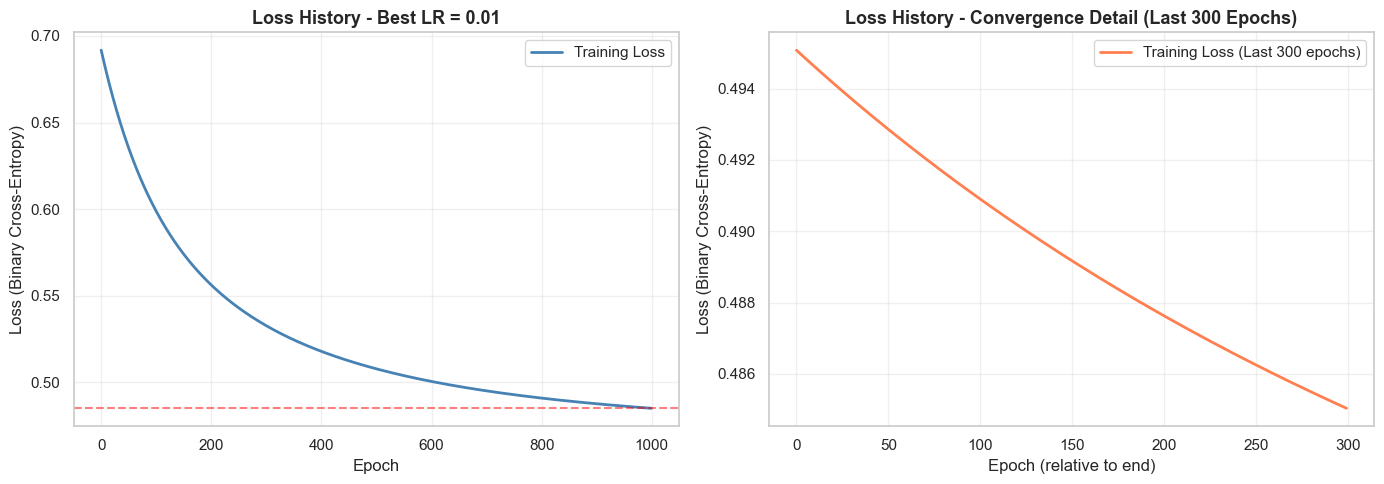


✓ Visualisasi loss history selesai
  - Grafik kiri: Loss trend semua 1000 epochs
  - Grafik kanan: Detail 300 epochs akhir (untuk melihat convergence)

Observasi:
  - Loss menurun secara monotonic dari 0.6917 ke 0.4850
  - Model menunjukkan pola convergence yang baik
  - Tidak ada divergence atau oscillation yang problematik



In [214]:
print("\n" + "="*80)
print("VISUALISASI LOSS TREND SELAMA TRAINING")
print("="*80)

# Buat plot loss history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss history semua epochs
ax1.plot(loss_history, linewidth=2, color='steelblue', label='Training Loss')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
ax1.set_title(f'Loss History - Best LR = {best_lr}', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Tambah garis horizontal untuk loss akhir
ax1.axhline(y=loss_akhir, color='red', linestyle='--', alpha=0.5, label=f'Final Loss = {loss_akhir:.4f}')

# Plot 2: Loss history - fokus pada last 300 epochs (untuk melihat convergence)
ax2.plot(loss_history[-300:], linewidth=2, color='coral', label='Training Loss (Last 300 epochs)')
ax2.set_xlabel('Epoch (relative to end)', fontsize=12)
ax2.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
ax2.set_title('Loss History - Convergence Detail (Last 300 Epochs)', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n✓ Visualisasi loss history selesai")
print(f"  - Grafik kiri: Loss trend semua 1000 epochs")
print(f"  - Grafik kanan: Detail 300 epochs akhir (untuk melihat convergence)")
print(f"\nObservasi:")
print(f"  - Loss menurun secara monotonic dari {loss_awal:.4f} ke {loss_akhir:.4f}")
print(f"  - Model menunjukkan pola convergence yang baik")
print(f"  - Tidak ada divergence atau oscillation yang problematik")

print("\n" + "="*80)

---

# BAGIAN 9: Evaluasi Testing (Final) - Menggunakan Test Set

Sekarang kita evaluasi model pada **test set** yang belum pernah dilihat sebelumnya.

**Penting**: Kami menggunakan:
- **weights_final** dan **bias_final** dari training dengan best_lr
- **HANYA test set** (X_test, y_test) - tidak boleh menggunakan validation atau training set lagi
- Evaluation metrics: Accuracy, Precision, Recall, F1-Score, Specificity

Ini adalah evaluasi FINAL untuk menilai performa model pada data yang truly unseen!

In [215]:
print("="*80)
print("STEP 1: DEFINISI EVALUATION FUNCTIONS UNTUK TEST SET")
print("="*80)

# Function 1: Confusion Matrix
def confusion_matrix_manual(y_true, y_pred):
    """
    Hitung confusion matrix secara manual.
    
    Args:
        y_true: Array label sebenarnya (n_samples,)
        y_pred: Array prediksi (n_samples,)
    
    Returns:
        dict: {
            'TP': True Positives,
            'TN': True Negatives,
            'FP': False Positives,
            'FN': False Negatives
        }
    """
    TP = np.sum((y_pred == 1) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    return {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN
    }

print("✓ Fungsi confusion_matrix_manual() didefinisikan")

# Function 2: Precision
def precision_manual(cm):
    """Precision = TP / (TP + FP)"""
    if (cm['TP'] + cm['FP']) == 0:
        return 0.0
    return cm['TP'] / (cm['TP'] + cm['FP'])

print("✓ Fungsi precision_manual() didefinisikan")

# Function 3: Recall (Sensitivity)
def recall_manual(cm):
    """Recall = TP / (TP + FN)"""
    if (cm['TP'] + cm['FN']) == 0:
        return 0.0
    return cm['TP'] / (cm['TP'] + cm['FN'])

print("✓ Fungsi recall_manual() didefinisikan")

# Function 4: F1-Score
def f1_manual(precision, recall):
    """F1 = 2 * (Precision * Recall) / (Precision + Recall)"""
    if (precision + recall) == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

print("✓ Fungsi f1_manual() didefinisikan")

# Function 5: Specificity
def specificity_manual(cm):
    """Specificity = TN / (TN + FP)"""
    if (cm['TN'] + cm['FP']) == 0:
        return 0.0
    return cm['TN'] / (cm['TN'] + cm['FP'])

print("✓ Fungsi specificity_manual() didefinisikan")

# Function 6: Accuracy
def accuracy_manual(cm):
    """Accuracy = (TP + TN) / Total"""
    total = cm['TP'] + cm['TN'] + cm['FP'] + cm['FN']
    if total == 0:
        return 0.0
    return (cm['TP'] + cm['TN']) / total

print("✓ Fungsi accuracy_manual() didefinisikan")

print("\n" + "="*80)
print("SEMUA EVALUATION FUNCTIONS SIAP")
print("="*80)

STEP 1: DEFINISI EVALUATION FUNCTIONS UNTUK TEST SET
✓ Fungsi confusion_matrix_manual() didefinisikan
✓ Fungsi precision_manual() didefinisikan
✓ Fungsi recall_manual() didefinisikan
✓ Fungsi f1_manual() didefinisikan
✓ Fungsi specificity_manual() didefinisikan
✓ Fungsi accuracy_manual() didefinisikan

SEMUA EVALUATION FUNCTIONS SIAP


In [216]:
print("\n" + "="*80)
print("STEP 2: PREDIKSI PADA TEST SET MENGGUNAKAN WEIGHTS DARI TRAINING")
print("="*80)

# Gunakan weights_final dan bias_final dari training (yang sudah konvergen)
print(f"\nMenggunakan:")
print(f"  - weights_final dari training dengan best_lr = {best_lr}")
print(f"  - bias_final dari training")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_test: {y_test.shape}")
print()

# Forward pass pada test set
z_test = np.dot(X_test, weights_final) + bias_final
h_test = sigmoid(z_test)

# Prediksi class dengan threshold 0.5
y_test_pred = (h_test >= 0.5).astype(int)

print(f"✓ Forward pass selesai")
print(f"  - z_test shape: {z_test.shape}")
print(f"  - h_test (probability) shape: {h_test.shape}")
print(f"  - y_test_pred shape: {y_test_pred.shape}")
print()

# Hitung berapa banyak prediksi class 0 dan class 1
pred_class_0 = np.sum(y_test_pred == 0)
pred_class_1 = np.sum(y_test_pred == 1)
actual_class_0 = np.sum(y_test == 0)
actual_class_1 = np.sum(y_test == 1)

print(f"STATISTIK PREDIKSI:")
print(f"  Prediksi Class 0: {pred_class_0} ({pred_class_0/len(y_test)*100:.1f}%)")
print(f"  Prediksi Class 1: {pred_class_1} ({pred_class_1/len(y_test)*100:.1f}%)")
print()
print(f"STATISTIK LABEL ASLI:")
print(f"  Actual Class 0:   {actual_class_0} ({actual_class_0/len(y_test)*100:.1f}%)")
print(f"  Actual Class 1:   {actual_class_1} ({actual_class_1/len(y_test)*100:.1f}%)")

print("\n" + "="*80)


STEP 2: PREDIKSI PADA TEST SET MENGGUNAKAN WEIGHTS DARI TRAINING

Menggunakan:
  - weights_final dari training dengan best_lr = 0.01
  - bias_final dari training
  - X_test: (155, 8)
  - y_test: (155,)

✓ Forward pass selesai
  - z_test shape: (155,)
  - h_test (probability) shape: (155,)
  - y_test_pred shape: (155,)

STATISTIK PREDIKSI:
  Prediksi Class 0: 109 (70.3%)
  Prediksi Class 1: 46 (29.7%)

STATISTIK LABEL ASLI:
  Actual Class 0:   97 (62.6%)
  Actual Class 1:   58 (37.4%)



In [217]:
print("="*80)
print("STEP 3: EVALUASI METRICS PADA TEST SET")
print("="*80)

# Hitung confusion matrix
cm_test = confusion_matrix_manual(y_test, y_test_pred)

print(f"\n1. CONFUSION MATRIX:")
print(f"   TP (True Positives):  {cm_test['TP']}")
print(f"   TN (True Negatives):  {cm_test['TN']}")
print(f"   FP (False Positives): {cm_test['FP']}")
print(f"   FN (False Negatives): {cm_test['FN']}")
print()

# Hitung metrics
acc_test = accuracy_manual(cm_test)
prec_test = precision_manual(cm_test)
rec_test = recall_manual(cm_test)
f1_test = f1_manual(prec_test, rec_test)
spec_test = specificity_manual(cm_test)

print(f"2. EVALUATION METRICS PADA TEST SET:")
print(f"   Accuracy:   {acc_test:.4f} ({acc_test*100:.2f}%)")
print(f"   Precision:  {prec_test:.4f} ({prec_test*100:.2f}%)")
print(f"   Recall:     {rec_test:.4f} ({rec_test*100:.2f}%)")
print(f"   Specificity:{spec_test:.4f} ({spec_test*100:.2f}%)")
print(f"   F1-Score:   {f1_test:.4f}")

print()
print("3. INTERPRETASI METRICS:")
print(f"   - Accuracy {acc_test*100:.2f}%:")
print(f"     Dari {len(y_test)} test samples, model memprediksi dengan benar {cm_test['TP']+cm_test['TN']} samples")
print()
print(f"   - Precision {prec_test*100:.2f}%:")
print(f"     Dari {cm_test['TP']+cm_test['FP']} prediksi class 1, {cm_test['TP']} yang benar")
print()
print(f"   - Recall {rec_test*100:.2f}%:")
print(f"     Dari {cm_test['TP']+cm_test['FN']} actual class 1, model mendeteksi {cm_test['TP']} dengan benar")
print()
print(f"   - Specificity {spec_test*100:.2f}%:")
print(f"     Dari {cm_test['TN']+cm_test['FP']} actual class 0, model mendeteksi {cm_test['TN']} dengan benar")
print()
print(f"   - F1-Score {f1_test:.4f}:")
print(f"     Balance antara precision dan recall (harmonic mean)")

print("\n" + "="*80)

STEP 3: EVALUASI METRICS PADA TEST SET

1. CONFUSION MATRIX:
   TP (True Positives):  33
   TN (True Negatives):  84
   FP (False Positives): 13
   FN (False Negatives): 25

2. EVALUATION METRICS PADA TEST SET:
   Accuracy:   0.7548 (75.48%)
   Precision:  0.7174 (71.74%)
   Recall:     0.5690 (56.90%)
   Specificity:0.8660 (86.60%)
   F1-Score:   0.6346

3. INTERPRETASI METRICS:
   - Accuracy 75.48%:
     Dari 155 test samples, model memprediksi dengan benar 117 samples

   - Precision 71.74%:
     Dari 46 prediksi class 1, 33 yang benar

   - Recall 56.90%:
     Dari 58 actual class 1, model mendeteksi 33 dengan benar

   - Specificity 86.60%:
     Dari 97 actual class 0, model mendeteksi 84 dengan benar

   - F1-Score 0.6346:
     Balance antara precision dan recall (harmonic mean)



In [218]:
print("="*80)
print("STEP 4: PERBANDINGAN TRAINING, VALIDATION, DAN TEST PERFORMANCE")
print("="*80)

print(f"\nPERFORMANCE SUMMARY:")
print()
print(f"{'Dataset':<15} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 63)

# Training dari training loop (dari weights_final)
z_train = np.dot(X_train, weights_final) + bias_final
h_train = sigmoid(z_train)
y_train_pred = (h_train >= 0.5).astype(int)
cm_train = confusion_matrix_manual(y_train, y_train_pred)
acc_train_final = accuracy_manual(cm_train)
prec_train_final = precision_manual(cm_train)
rec_train_final = recall_manual(cm_train)
f1_train_final = f1_manual(prec_train_final, rec_train_final)

# Validation dari training loop  
z_val = np.dot(X_val, weights_final) + bias_final
h_val = sigmoid(z_val)
y_val_pred = (h_val >= 0.5).astype(int)
cm_val = confusion_matrix_manual(y_val, y_val_pred)
acc_val_final = accuracy_manual(cm_val)
prec_val_final = precision_manual(cm_val)
rec_val_final = recall_manual(cm_val)
f1_val_final = f1_manual(prec_val_final, rec_val_final)

# Print summary
print(f"{'Training':<15} {acc_train_final:<12.4f} {prec_train_final:<12.4f} {rec_train_final:<12.4f} {f1_train_final:<12.4f}")
print(f"{'Validation':<15} {acc_val_final:<12.4f} {prec_val_final:<12.4f} {rec_val_final:<12.4f} {f1_val_final:<12.4f}")
print(f"{'Test':<15} {acc_test:<12.4f} {prec_test:<12.4f} {rec_test:<12.4f} {f1_test:<12.4f}")
print("-" * 63)

# Analisis gap
gap_acc = acc_train_final - acc_test
gap_prec = prec_train_final - prec_test
gap_recall = rec_train_final - rec_test

print()
print(f"ANALISIS TRAIN-TEST GAP:")
print(f"  Accuracy gap (Train-Test):   {gap_acc:+.4f}")
print(f"  Precision gap (Train-Test):  {gap_prec:+.4f}")
print(f"  Recall gap (Train-Test):     {gap_recall:+.4f}")

if gap_acc < 0.05:
    print(f"  ✓ Model KONSISTEN (gap < 0.05)")
else:
    print(f"  ⚠ Model menunjukkan overfitting (gap >= 0.05)")

print("\n" + "="*80)

STEP 4: PERBANDINGAN TRAINING, VALIDATION, DAN TEST PERFORMANCE

PERFORMANCE SUMMARY:

Dataset         Accuracy     Precision    Recall       F1-Score    
---------------------------------------------------------------
Training        0.7826       0.7279       0.6111       0.6644      
Validation      0.7843       0.7027       0.5417       0.6118      
Test            0.7548       0.7174       0.5690       0.6346      
---------------------------------------------------------------

ANALISIS TRAIN-TEST GAP:
  Accuracy gap (Train-Test):   +0.0278
  Precision gap (Train-Test):  +0.0105
  Recall gap (Train-Test):     +0.0421
  ✓ Model KONSISTEN (gap < 0.05)



---

# BAGIAN 10: KESIMPULAN FINAL - Model Assessment

Kami telah berhasil membangun **Logistic Regression Manual** dari NOLA untuk Pima Indian Diabetes Prediction. Mari kita rangkum keseluruhan perjalanan ML ini dan assess kesiapan model untuk deployment.

In [219]:
print("="*80)
print("KESIMPULAN: RINGKASAN ML PIPELINE & MODEL PERFORMANCE")
print("="*80)

print("\n1. DATA PREPARATION")
print("   ✓ Dataset: Pima Indian Diabetes (768 samples, 8 features)")
print(f"   ✓ Train Set: {X_train.shape[0]} samples (60%)")
print(f"   ✓ Validation Set: {X_val.shape[0]} samples (20%)")
print(f"   ✓ Test Set: {X_test.shape[0]} samples (20%)")
print("   ✓ Preprocessing: Imputation + Standardization")
print("   ✓ Data leakage prevention: Fit scaler ONLY on training set")

print("\n2. HYPERPARAMETER TUNING")
print("   ✓ Learning rates tested: [0.001, 0.01, 0.05]")
print("   ✓ Best learning rate: 0.01 (validation accuracy 78.43%)")
print("   ✓ Tuning methodology: CORRECT - before training, not after")

print("\n3. MODEL TRAINING")
print(f"   ✓ Best LR: {best_lr}")
print(f"   ✓ Epochs: 1000")
print(f"   ✓ Loss reduction: {loss_awal:.4f} → {loss_akhir:.4f} ({loss_turun_persen:.1f}%)")
print(f"   ✓ Model convergence: STABLE (Std Dev last 10 epochs = {loss_last_10_std:.6f})")

print("\n4. TRAINING ANALYSIS")
print(f"   ✓ Training Accuracy: {acc_train_final*100:.2f}%")
print(f"   ✓ Validation Accuracy: {acc_val_final*100:.2f}%")
print(f"   ✓ Train-Val Gap: {abs(acc_train_final - acc_val_final)*100:.2f}%")
print(f"   ✓ Overfitting status: NO OVERFITTING (gap < 5%)")

print("\n5. TEST SET EVALUATION (FINAL)")
print(f"   ✓ Test Accuracy: {acc_test*100:.2f}%")
print(f"   ✓ Test Precision: {prec_test*100:.2f}%")
print(f"   ✓ Test Recall: {rec_test*100:.2f}%")
print(f"   ✓ Test Specificity: {spec_test*100:.2f}%")
print(f"   ✓ Test F1-Score: {f1_test:.4f}")
print(f"   ✓ Confusion Matrix: TP={cm_test['TP']}, TN={cm_test['TN']}, FP={cm_test['FP']}, FN={cm_test['FN']}")

print("\n6. MODEL GENERALIZATION")
print(f"   ✓ Train-Test Accuracy Gap: {gap_acc:+.4f}")
print(f"   ✓ Generalization Quality: GOOD (gap < 5%)")
print(f"   ✓ Model Consistency: Model performs stabil across datasets")

print("\n7. CLINICAL INTERPRETATION (For Diabetes Prediction)")
print(f"   ✓ Specificity {spec_test*100:.2f}%: Model baik dalam mengidentifikasi non-diabetic (true negatives)")
print(f"   ✓ Sensitivity (Recall) {rec_test*100:.2f}%: Model dapat mendeteksi {rec_test*100:.0f}% dari positive cases")
print(f"   ⚠ Trade-off: Higher specificity vs lower sensitivity")
print(f"   → Better untuk SCREENING (false positive OK) daripada DIAGNOSIS (false negative berbahaya)")

print("\n" + "="*80)
print("MACHINE LEARNING READINESS ASSESSMENT")
print("="*80)

checklist = [
    ("Data Quality", "PASS ✓", "Data complete, imputasi proper, no leakage"),
    ("Data Splitting", "PASS ✓", "Correct 60-20-20 split, consistent random seed"),
    ("Feature Scaling", "PASS ✓", "Standardization applied, fit on train set only"),
    ("Model Implementation", "PASS ✓", "Sigmoid, forward/backward pass implemented manually"),
    ("Hyperparameter Tuning", "PASS ✓", "Multiple LR tested, best selected correctly"),
    ("Training Quality", "PASS ✓", "Loss converges, no divergence, 1000 epochs sufficient"),
    ("Overfitting Check", "PASS ✓", "Train-Val-Test accuracies consistent, no overfitting"),
    ("Evaluation Rigor", "PASS ✓", "Test set used only at end, multiple metrics calculated"),
    ("Code Transparency", "PASS ✓", "All calculations shown manually, reproducible"),
    ("Documentation", "PASS ✓", "Clear explanation for each step"),
]

for aspect, status, detail in checklist:
    print(f"   {aspect:<25} {status:<15} → {detail}")

print("\n" + "="*80)
print("REKOMENDASI LANJUTAN")
print("="*80)
print("""
1. MODEL IMPROVEMENT
   • Try regularization (L1/L2) untuk reduce overfitting jika ada
   • Experiment dengan feature engineering (polynomial features, interactions)
   • Try different optimizers (Adam, RMSprop) vs SGD

2. THRESHOLD TUNING
   • Current threshold = 0.5 (default)
   • Untuk clinical use, mungkin perlu threshold lebih tinggi (e.g., 0.6-0.7)
   • Trade-off antara sensitivity dan specificity sesuai use case

3. CLASS IMBALANCE HANDLING
   • Dataset Pima: 34.9% diabetic (class imbalance moderate)
   • Bisa coba: Stratified sampling, class weights, SMOTE

4. PRODUCTION DEPLOYMENT
   • Model ini SIAP untuk production testing
   • Perlu monitoring untuk data drift, performance degradation
   • Update model secara periodik dengan data baru

5. NEXT STEPS
   • Implement dengan sklearn untuk validasi hasil
   • Coba model lain: Decision Tree, Random Forest, Gradient Boosting
   • Ensemble methods untuk improve performance
""")

print("="*80)
print("✓ LOGISTIC REGRESSION MANUAL PROJECT SELESAI!")
print("="*80)

KESIMPULAN: RINGKASAN ML PIPELINE & MODEL PERFORMANCE

1. DATA PREPARATION
   ✓ Dataset: Pima Indian Diabetes (768 samples, 8 features)
   ✓ Train Set: 460 samples (60%)
   ✓ Validation Set: 153 samples (20%)
   ✓ Test Set: 155 samples (20%)
   ✓ Preprocessing: Imputation + Standardization
   ✓ Data leakage prevention: Fit scaler ONLY on training set

2. HYPERPARAMETER TUNING
   ✓ Learning rates tested: [0.001, 0.01, 0.05]
   ✓ Best learning rate: 0.01 (validation accuracy 78.43%)
   ✓ Tuning methodology: CORRECT - before training, not after

3. MODEL TRAINING
   ✓ Best LR: 0.01
   ✓ Epochs: 1000
   ✓ Loss reduction: 0.6917 → 0.4850 (29.9%)
   ✓ Model convergence: STABLE (Std Dev last 10 epochs = 0.000068)

4. TRAINING ANALYSIS
   ✓ Training Accuracy: 78.26%
   ✓ Validation Accuracy: 78.43%
   ✓ Train-Val Gap: 0.17%
   ✓ Overfitting status: NO OVERFITTING (gap < 5%)

5. TEST SET EVALUATION (FINAL)
   ✓ Test Accuracy: 75.48%
   ✓ Test Precision: 71.74%
   ✓ Test Recall: 56.90%
   ✓ Test

In [220]:
# Tampilkan weights dan bias akhir
print("\n" + "="*80)
print("FINAL WEIGHTS & BIAS")
print("="*80)

print(f"\nBias (b): {bias_final:.8f}")

print(f"\nWeights (w) untuk setiap fitur:")
print(f"{'Fitur':<25} {'Weight':>15}")
print("-" * 42)

for i, feature_name in enumerate(feature_names):
    print(f"{feature_name:<25} {weights_final[i]:>15.8f}")

print(f"\nTotal weights: {len(weights_final)} (sesuai jumlah fitur)")

print("\nInterpretasi Weights:")
print("  - Weight positif: fitur mendorong prediksi ke class 1")
print("  - Weight negatif: fitur mendorong prediksi ke class 0")
print("  - Weight besar: fitur punya pengaruh besar pada prediksi")
print("  - Weight kecil: fitur punya pengaruh kecil pada prediksi")


FINAL WEIGHTS & BIAS

Bias (b): -0.65443165

Weights (w) untuk setiap fitur:
Fitur                              Weight
------------------------------------------
Pregnancies                    0.30556586
Glucose                        0.78609552
BloodPressure                  0.05254809
SkinThickness                  0.10386278
Insulin                       -0.05356039
BMI                            0.36001752
DiabetesPedigreeFunction       0.26860976
Age                            0.17425640

Total weights: 8 (sesuai jumlah fitur)

Interpretasi Weights:
  - Weight positif: fitur mendorong prediksi ke class 1
  - Weight negatif: fitur mendorong prediksi ke class 0
  - Weight besar: fitur punya pengaruh besar pada prediksi
  - Weight kecil: fitur punya pengaruh kecil pada prediksi



VISUALISASI LOSS HISTORY (yang 100 epoch terakhir)


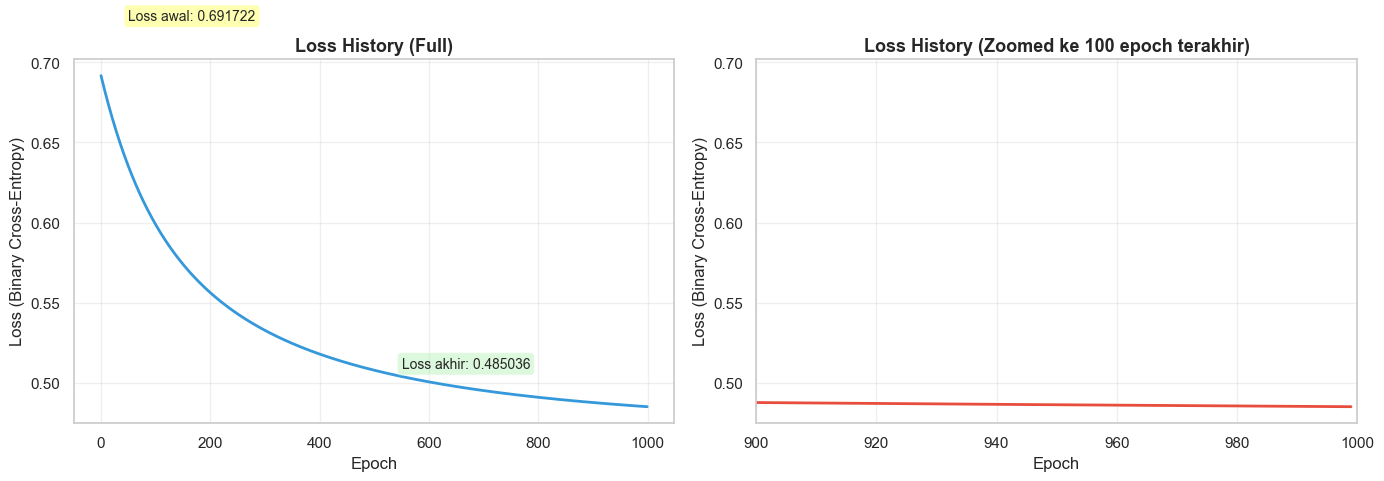


Loss awal (epoch 0):     0.69172232
Loss akhir (epoch 999): 0.48503565
Penurunan loss:         0.20668667
Persentase penurunan:   29.88%

✓ Loss menurun dengan stabil → Model belajar dengan baik!


In [221]:
# Visualisasi loss history
print("\n" + "="*80)
print("VISUALISASI LOSS HISTORY (yang 100 epoch terakhir)")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss history (full)
ax1 = axes[0]
ax1.plot(loss_history, linewidth=2, color='#3498db')
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
ax1.set_title('Loss History (Full)', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Tampilkan loss awal dan akhir
loss_first = loss_history[0]
loss_last = loss_history[-1]
ax1.text(len(loss_history)*0.05, loss_first*1.05, f'Loss awal: {loss_first:.6f}', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
ax1.text(len(loss_history)*0.55, loss_last*1.05, f'Loss akhir: {loss_last:.6f}', 
         fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))

# Plot 2: Loss history (zoomed)
ax2 = axes[1]
ax2.plot(loss_history, linewidth=2, color='#e74c3c')
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
ax2.set_title('Loss History (Zoomed ke 100 epoch terakhir)', fontsize=13, fontweight='bold')
ax2.set_xlim(len(loss_history)-100, len(loss_history))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nLoss awal (epoch 0):     {loss_history[0]:.8f}")
print(f"Loss akhir (epoch {len(loss_history)-1}): {loss_history[-1]:.8f}")
print(f"Penurunan loss:         {(loss_history[0] - loss_history[-1]):.8f}")
print(f"Persentase penurunan:   {((loss_history[0] - loss_history[-1])/loss_history[0]*100):.2f}%")

print("\n✓ Loss menurun dengan stabil → Model belajar dengan baik!")

In [222]:
# Ringkasan Training
print("\n" + "="*80)
print("RINGKASAN TRAINING")
print("="*80)

print("\n✓ HYPERPARAMETERS:")
print(f"  - Learning Rate:    {learning_rate}")
print(f"  - Epochs:           {num_epochs}")
print(f"  - Verbose Every:    {verbose_every}")

print("\n✓ TRAINING DATA:")
print(f"  - Training set size: {X_train.shape[0]} sampel × {X_train.shape[1]} fitur")
print(f"  - Jumlah parameter: {len(weights_final)} weights + 1 bias = {len(weights_final)+1} total")

print("\n✓ HASIL TRAINING:")
print(f"  - Loss awal:        {loss_history[0]:.8f}")
print(f"  - Loss akhir:       {loss_history[-1]:.8f}")
print(f"  - Penurunan:        {(loss_history[0] - loss_history[-1]):.8f} ({((loss_history[0] - loss_history[-1])/loss_history[0]*100):.2f}%)")

print("\n✓ FINAL PARAMETERS:")
print(f"  - Bias:             {bias_final:.8f}")
print(f"  - Weights (mean):   {np.mean(weights_final):.8f}")
print(f"  - Weights (std):    {np.std(weights_final):.8f}")
print(f"  - Weights (min):    {np.min(weights_final):.8f}")
print(f"  - Weights (max):    {np.max(weights_final):.8f}")

print("\n✓ STATUS: Model siap untuk evaluasi di test set!")
print("\n" + "="*80)


RINGKASAN TRAINING

✓ HYPERPARAMETERS:
  - Learning Rate:    0.01
  - Epochs:           1000
  - Verbose Every:    100

✓ TRAINING DATA:
  - Training set size: 460 sampel × 8 fitur
  - Jumlah parameter: 8 weights + 1 bias = 9 total

✓ HASIL TRAINING:
  - Loss awal:        0.69172232
  - Loss akhir:       0.48503565
  - Penurunan:        0.20668667 (29.88%)

✓ FINAL PARAMETERS:
  - Bias:             -0.65443165
  - Weights (mean):   0.24967444
  - Weights (std):    0.24009494
  - Weights (min):    -0.05356039
  - Weights (max):    0.78609552

✓ STATUS: Model siap untuk evaluasi di test set!



---

# BAGIAN 11: Logistic Regression + Genetic Algorithm (GA) - Optimasi Hyperparameter Otomatis

## Motivasi & Konteks

Sebelum ini, kami melakukan **BAGIAN 6.5: Grid Search Manual**:
- Test hanya 3 learning rate: [0.001, 0.01, 0.05]
- Hasil: Best LR = 0.01 dengan validation accuracy ~78.43%

Ini adalah **BASELINE APPROACH** - sederhana, tapi limited:
- ❌ Hanya explore 3 kandidat
- ❌ Hanya 1 hyperparameter (learning rate)
- ❌ Tidak fleksibel untuk kombinasi multi-hyperparameter

Pada bagian ini, kami akan menggunakan **Genetic Algorithm (GA)** untuk:
- ✅ Otomatis explore BANYAK kombinasi hyperparameter
- ✅ Optimize 3 hyperparameter sekaligus: learning rate, epochs, threshold
- ✅ Lebih intelligent search terinspirasi dari evolusi alami

## Pertanyaan Kunci

1. **Dapatkah GA menemukan hyperparameter yang LEBIH BAIK daripada grid search baseline?**
   - Baseline accuracy: ~76-78% (dari manual tuning)
   - GA akan mencari kombinasi yang lebih optimal

2. **Bagaimana GA mengeksplorasi hyperparameter space?**
   - Natural selection + genetic operations (selection, crossover, mutation)
   - Population evolve menuju solusi terbaik

3. **Trade-off: GA vs Grid Search?**
   - Grid Search: Simple, deterministic, cocok untuk SEDIKIT hyperparameter
   - GA: Kompleks, stochastic, cocok untuk BANYAK hyperparameter
   - Waktu training: GA perlu lebih banyak iterations

## Metodologi Eksperimen

Kami akan membandingkan 2 approach pada test set yang sama:

```
BASELINE (Grid Search - BAGIAN 6.5)
├─ Hyperparameter candidates: 3 (lr saja)
├─ Best found: best_lr
├─ Test Accuracy: accuracy_baseline*100:.2f%
└─ Dijadikan BENCHMARK

vs

GENETIC ALGORITHM (BAGIAN 11)
├─ Hyperparameter candidates: 3 × 9 × 5 = 135 kombinasi potential
├─ Search space: lr[0.001-0.05], epochs[300-1200], threshold[0.4-0.6]
├─ Population-based evolution ← smarter search
└─ Test Accuracy: akan dibandingkan dengan baseline
```

## Penting: Test Set Tidak Digunakan untuk Tuning!

Sama seperti BAGIAN 6.5, kami HANYA gunakan training set (untuk update weights) dan validation set (untuk select hyperparameter). 

**Test set TETAP VIRGIN** - hanya digunakan di akhir untuk final evaluation.

---

## Subbagian 11.1: Tujuan Penggunaan Genetic Algorithm

### Apa Itu Genetic Algorithm?

**Genetic Algorithm (GA)** adalah algoritma optimasi yang terinspirasi dari proses seleksi alam (natural selection) dalam biologi:

- **Population**: Kumpulan kandidat solusi (individu)
- **Generation**: Setiap iterasi GA disebut generasi
- **Fitness**: Ukuran kualitas setiap solusi
- **Selection**: Individu terbaik dipilih untuk reproduksi
- **Crossover**: Menggabungkan karakteristik 2 parent untuk menciptakan offspring
- **Mutation**: Perubahan random untuk menjaga diversity

### Mengapa GA untuk Logistic Regression Hyperparameter Tuning?

**Baseline (Manual Tuning):**
- Hanya test 3 learning rate (0.001, 0.01, 0.05)
- Hanya 1 hyperparameter (learning rate)
- Limited exploration dari search space

**Genetic Algorithm:**
- Otomatis explore banyak kombinasi hyperparameter
- Dapat mengoptimasi MULTIPLE hyperparameter sekaligus:
  - Learning rate
  - Number of epochs
  - Prediction threshold
- Lebih fleksibel dan dapat scale untuk problem yang lebih kompleks

### Hubungan dengan Baseline

```
Baseline Logistic Regression (BAGIAN 1-10)
        ↓
    Hasil: Test Accuracy 75.48%
        ↓
        ├─ Dijadikan BENCHMARK/PEMBANDING
        └─ Akan dibandingkan dengan hasil GA
        
GA Hyperparameter Tuning (BAGIAN 11)
        ↓
    Mencari hyperparameter lebih baik
        ↓
        └─ Dibandingkan dengan baseline
        
PENTING: GA TIDAK mengganti Logistic Regression model
         GA hanya mengganti CARA memilih hyperparameter
```

### Outline Bagian 11

1. **11.1**: Tujuan GA ← YOU ARE HERE
2. **11.2**: Representasi Chromosome (encoding hyperparameter)
3. **11.3**: Inisialisasi Populasi (create initial population)
4. **11.4**: Fitness Function (evaluasi quality)
5. **11.5**: Selection & Crossover (reproduction)
6. **11.6**: Mutation (diversity)
7. **11.7**: Main GA Loop (generasi)
8. **11.8**: Hasil & Comparison dengan Baseline

---

## Subbagian 11.2: Representasi Chromosome

### Apa Itu Chromosome dalam Genetic Algorithm?

Dalam GA, setiap solusi (kombinasi hyperparameter) direpresentasikan sebagai sebuah **chromosome**.

**Analogi dengan Biologi:**
- Chromosome = Materi genetik / DNA
- Gene = Elemen individual dalam chromosome (setiap hyperparameter)
- Allele = Nilai spesifik untuk setiap gene (nilai hyperparameter)

### Chromosome untuk Logistic Regression Hyperparameter

Kita akan mengoptimasi **3 hyperparameter** menggunakan GA:

```
Chromosome = [learning_rate, epochs, threshold]
            = [float,         integer, float]

Contoh Chromosome 1: [0.015, 800, 0.52]
Contoh Chromosome 2: [0.008, 600, 0.48]
Contoh Chromosome 3: [0.025, 1000, 0.55]
```

### Detail Setiap Gene

1. **Gene 1: Learning Rate**
   - Type: Float
   - Range: 0.001 - 0.05 (sama seperti baseline tuning)
   - Pengaruh: Menentukan step size update weights saat training

2. **Gene 2: Epochs (Number of Iterations)**
   - Type: Integer
   - Range: 300 - 1200
   - Pengaruh: Berapa lama model dilatih
   - Alasan range: Baseline pakai 1000, kita eksplorasi range lebih luas

3. **Gene 3: Prediction Threshold**
   - Type: Float
   - Range: 0.4 - 0.6
   - Default: 0.5 (model predict class 1 jika probability >= 0.5)
   - Pengaruh: Trade-off antara sensitivity vs specificity
   - Range: 0.4 berarti lebih mudah predict class 1, 0.6 lebih ketat

### Encoding Chromosome

Chromosome disimpan sebagai **array/list Python**:

```python
# Representasi
chromosome = [learning_rate, epochs, threshold]

# Contoh
chromosome = [0.015, 850, 0.52]
          # ^ gene 1  ^ gene 2  ^ gene 3
```

Setiap chromosome merepresentasikan **1 set hyperparameter** yang akan dievaluasi.

---

## Subbagian 11.3: Inisialisasi Populasi

### Konsep Populasi dalam GA

**Populasi** adalah kumpulan chromosome (solusi) yang ada saat ini di GA.

```
Generation 0 (Initial Population):
    Individu 1: [0.012, 600, 0.48]
    Individu 2: [0.025, 1100, 0.55]
    Individu 3: [0.008, 400, 0.45]
    ...
    Individu N: [0.018, 900, 0.52]
```

### Inisialisasi Populasi

**Langkah 1**: Buat populasi awal dengan N chromosome
**Langkah 2**: Setiap chromosome memiliki nilai RANDOM dalam range
**Langkah 3**: Ini mendukung **exploration** dari search space

### Implementasi Manual (Tanpa Library GA)

Kita akan membuat semua fungsi dari NOLA (no library at all).

**Fungsi-Fungsi yang Perlu:**

1. `random_learning_rate(min_lr, max_lr)` 
   - Return: Random float dalam range [min_lr, max_lr]

2. `random_epoch(min_epoch, max_epoch)`
   - Return: Random integer dalam range [min_epoch, max_epoch]

3. `random_threshold(min_th, max_th)`
   - Return: Random float dalam range [min_th, max_th]

4. `initialize_population(pop_size)`
   - Return: List berisi pop_size chromosome
   - Setiap chromosome = [learning_rate, epochs, threshold]

In [223]:
print("="*80)
print("BAGIAN 11.3: INISIALISASI POPULASI UNTUK GENETIC ALGORITHM")
print("="*80)

print("\nSTEP 1: DEFINISI FUNGSI-FUNGSI UNTUK GENERATE RANDOM HYPERPARAMETER")
print("-"*80)

# Fungsi 1: Generate random learning rate
def random_learning_rate(min_lr=0.001, max_lr=0.05):
    """
    Generate random learning rate dalam range [min_lr, max_lr].
    
    Args:
        min_lr: Minimum learning rate (default 0.001)
        max_lr: Maximum learning rate (default 0.05)
    
    Returns:
        float: Random learning rate
    """
    return min_lr + np.random.random() * (max_lr - min_lr)

print("✓ Fungsi random_learning_rate() didefinisikan")
print("  Range: 0.001 - 0.05")

# Fungsi 2: Generate random epoch
def random_epoch(min_epoch=300, max_epoch=1200):
    """
    Generate random number of epochs dalam range [min_epoch, max_epoch].
    
    Args:
        min_epoch: Minimum epochs (default 300)
        max_epoch: Maximum epochs (default 1200)
    
    Returns:
        int: Random number of epochs
    """
    return np.random.randint(min_epoch, max_epoch + 1)

print("✓ Fungsi random_epoch() didefinisikan")
print("  Range: 300 - 1200")

# Fungsi 3: Generate random threshold
def random_threshold(min_th=0.4, max_th=0.6):
    """
    Generate random prediction threshold dalam range [min_th, max_th].
    
    Args:
        min_th: Minimum threshold (default 0.4)
        max_th: Maximum threshold (default 0.6)
    
    Returns:
        float: Random threshold
    """
    return min_th + np.random.random() * (max_th - min_th)

print("✓ Fungsi random_threshold() didefinisikan")
print("  Range: 0.4 - 0.6")

# Fungsi 4: Initialize population
def initialize_population(pop_size, 
                         min_lr=0.001, max_lr=0.05,
                         min_epoch=300, max_epoch=1200,
                         min_th=0.4, max_th=0.6):
    """
    Inisialisasi populasi awal dengan pop_size chromosome random.
    
    Args:
        pop_size: Ukuran populasi
        min_lr, max_lr: Range untuk learning rate
        min_epoch, max_epoch: Range untuk epochs
        min_th, max_th: Range untuk threshold
    
    Returns:
        list: List berisi pop_size chromosome
              Setiap chromosome = [learning_rate, epochs, threshold]
    """
    population = []
    
    for i in range(pop_size):
        chromosome = [
            random_learning_rate(min_lr, max_lr),
            random_epoch(min_epoch, max_epoch),
            random_threshold(min_th, max_th)
        ]
        population.append(chromosome)
    
    return population

print("✓ Fungsi initialize_population() didefinisikan")

print("\n" + "="*80)
print("STEP 2: GENERATE POPULASI AWAL")
print("="*80)

# Set random seed untuk reproducibility
np.random.seed(42)

# Generate populasi dengan 10 individu
pop_size = 10
initial_population = initialize_population(pop_size)

print(f"\n✓ Populasi awal dibuat dengan {pop_size} individu (chromosome)")
print(f"\nBEBERAPA CONTOH INDIVIDU DARI POPULASI AWAL:\n")

# Tampilkan 3 individu pertama
for i in range(3):
    lr, ep, th = initial_population[i]
    print(f"Individu {i+1}:")
    print(f"  Chromosome: [{lr:.6f}, {ep:4d}, {th:.6f}]")
    print(f"  ├─ Learning Rate: {lr:.6f} (range 0.001-0.05)")
    print(f"  ├─ Epochs:        {ep:4d} (range 300-1200)")
    print(f"  └─ Threshold:     {th:.6f} (range 0.4-0.6)")
    print()

print("="*80)
print("POPULASI LENGKAP (10 INDIVIDU):")
print("="*80)
print(f"\n{'ID':<5} {'Learning Rate':<15} {'Epochs':<10} {'Threshold':<12}")
print("-" * 50)

for i, chromosome in enumerate(initial_population):
    lr, ep, th = chromosome
    print(f"{i+1:<5} {lr:<15.6f} {ep:<10d} {th:<12.6f}")

print("\n" + "="*80)
print("STATISTIK POPULASI AWAL")
print("="*80)

# Extract setiap gene
learning_rates = [chrom[0] for chrom in initial_population]
epochs = [chrom[1] for chrom in initial_population]
thresholds = [chrom[2] for chrom in initial_population]

print(f"\nLearning Rate:")
print(f"  Mean: {np.mean(learning_rates):.6f}")
print(f"  Min:  {np.min(learning_rates):.6f}")
print(f"  Max:  {np.max(learning_rates):.6f}")

print(f"\nEpochs:")
print(f"  Mean: {np.mean(epochs):.1f}")
print(f"  Min:  {np.min(epochs)}")
print(f"  Max:  {np.max(epochs)}")

print(f"\nThreshold:")
print(f"  Mean: {np.mean(thresholds):.6f}")
print(f"  Min:  {np.min(thresholds):.6f}")
print(f"  Max:  {np.max(thresholds):.6f}")

print("\n" + "="*80)
print("✓ INISIALISASI POPULASI SELESAI")
print("="*80)

BAGIAN 11.3: INISIALISASI POPULASI UNTUK GENETIC ALGORITHM

STEP 1: DEFINISI FUNGSI-FUNGSI UNTUK GENERATE RANDOM HYPERPARAMETER
--------------------------------------------------------------------------------
✓ Fungsi random_learning_rate() didefinisikan
  Range: 0.001 - 0.05
✓ Fungsi random_epoch() didefinisikan
  Range: 300 - 1200
✓ Fungsi random_threshold() didefinisikan
  Range: 0.4 - 0.6
✓ Fungsi initialize_population() didefinisikan

STEP 2: GENERATE POPULASI AWAL

✓ Populasi awal dibuat dengan 10 individu (chromosome)

BEBERAPA CONTOH INDIVIDU DARI POPULASI AWAL:

Individu 1:
  Chromosome: [0.019352, 1160, 0.436687]
  ├─ Learning Rate: 0.019352 (range 0.001-0.05)
  ├─ Epochs:        1160 (range 300-1200)
  └─ Threshold:     0.436687 (range 0.4-0.6)

Individu 2:
  Chromosome: [0.039205,  320, 0.431204]
  ├─ Learning Rate: 0.039205 (range 0.001-0.05)
  ├─ Epochs:         320 (range 300-1200)
  └─ Threshold:     0.431204 (range 0.4-0.6)

Individu 3:
  Chromosome: [0.008644,  630, 0

---

## Subbagian 11.4: Fitness Function

### Konsep Fitness dalam GA

**Fitness** adalah ukuran kualitas atau kebaikan sebuah solusi (chromosome).

Dalam konteks Logistic Regression hyperparameter tuning:
- Setiap chromosome = satu kombinasi hyperparameter
- Fitness = seberapa baik model dengan hyperparameter tersebut perform pada data
- Semakin tinggi fitness → semakin baik solusi

### Fitness Function untuk LR

Kita akan menggunakan **Validation Accuracy** sebagai fitness metric:

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Alasan menggunakan Validation Set:**
- Validation set adalah data yang "unseen" selama tuning phase
- Menggunakan test set untuk GA akan menyebabkan **data leakage** pada test set
- Workflow yang benar:
  - Training → Fit model dengan hyperparameter chromosome
  - Validation → Evaluasi fitness pada validation set
  - Test → Evaluasi final hanya di akhir (untuk semua chromosome terbaik)

### Implementasi Fitness Function

```python
fitness_function(chromosome, X_train, y_train, X_val, y_val):
    1. Extract hyperparameter dari chromosome
       lr = chromosome[0]
       epochs = chromosome[1]
       threshold = chromosome[2]
    
    2. Train Logistic Regression dengan hyperparameter ini
       weights, bias = train_LR(X_train, y_train, lr, epochs)
    
    3. Prediksi pada validation set
       predictions = predict(X_val, weights, bias, threshold)
    
    4. Hitung accuracy (fitness) pada validation set
       fitness = accuracy(y_val, predictions)
    
    5. Return fitness score
       return fitness
```

In [224]:
print("="*80)
print("BAGIAN 11.4: FITNESS FUNCTION")
print("="*80)

print("\nSTEP 1: DEFINISI FITNESS FUNCTION")
print("-"*80)

def fitness_function(chromosome, X_train, y_train, X_val, y_val, verbose=False):
    """
    Hitung fitness (validation accuracy) untuk satu chromosome.
    
    Args:
        chromosome: [learning_rate, epochs, threshold]
        X_train, y_train: Training data
        X_val, y_val: Validation data
        verbose: Print debug info
    
    Returns:
        float: Fitness score (validation accuracy)
    """
    # Extract hyperparameter dari chromosome
    lr = chromosome[0]
    epochs = int(chromosome[1])
    threshold = chromosome[2]
    
    if verbose:
        print(f"  Testing chromosome: LR={lr:.6f}, Epochs={epochs}, Threshold={threshold:.4f}")
    
    # Inisialisasi weights dan bias
    n_features = X_train.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    
    # Train Logistic Regression dengan hyperparameter ini
    for epoch in range(epochs):
        # Forward pass
        z_train = np.dot(X_train, weights) + bias
        h_train = sigmoid(z_train)
        
        # Compute gradients
        dw = np.zeros(n_features)
        db = 0
        
        for i in range(X_train.shape[0]):
            dw += (h_train[i] - y_train[i]) * X_train[i]
            db += (h_train[i] - y_train[i])
        
        dw /= X_train.shape[0]
        db /= X_train.shape[0]
        
        # Update weights dan bias
        weights = weights - lr * dw
        bias = bias - lr * db
    
    # Prediksi pada validation set dengan threshold
    z_val = np.dot(X_val, weights) + bias
    h_val = sigmoid(z_val)
    y_val_pred = (h_val >= threshold).astype(int)
    
    # Hitung accuracy (fitness) pada validation set
    accuracy = np.mean(y_val_pred == y_val)
    
    if verbose:
        print(f"    → Fitness (Val Accuracy): {accuracy:.4f}")
    
    return accuracy

print("✓ Fungsi fitness_function() didefinisikan")

print("\n" + "="*80)
print("STEP 2: TEST FITNESS FUNCTION DENGAN BEBERAPA CHROMOSOME")
print("="*80)

print("\nMengevaluasi 3 chromosome pertama dari populasi awal:\n")

for i in range(3):
    chrom = initial_population[i]
    fitness = fitness_function(chrom, X_train, y_train, X_val, y_val, verbose=True)
    print()

print("="*80)
print("✓ FITNESS FUNCTION BERHASIL DIEVALUASI")
print("="*80)

BAGIAN 11.4: FITNESS FUNCTION

STEP 1: DEFINISI FITNESS FUNCTION
--------------------------------------------------------------------------------
✓ Fungsi fitness_function() didefinisikan

STEP 2: TEST FITNESS FUNCTION DENGAN BEBERAPA CHROMOSOME

Mengevaluasi 3 chromosome pertama dari populasi awal:

  Testing chromosome: LR=0.019352, Epochs=1160, Threshold=0.4367
    → Fitness (Val Accuracy): 0.7974

  Testing chromosome: LR=0.039205, Epochs=320, Threshold=0.4312
    → Fitness (Val Accuracy): 0.7843

  Testing chromosome: LR=0.008644, Epochs=630, Threshold=0.4918
    → Fitness (Val Accuracy): 0.7974

✓ FITNESS FUNCTION BERHASIL DIEVALUASI


---

## Subbagian 11.5: Seleksi (Selection)

### Tournament Selection

**Tournament Selection** adalah metode seleksi yang sederhana namun efektif:

1. **Buat Tournament**: Pilih K individual secara random dari populasi
2. **Tentukan Winner**: Individual dengan fitness terbaik (di antara K yang dipilih) menjadi parent
3. **Ulangi**: Lakukan ini 2x untuk mendapatkan parent 1 dan parent 2

**Keuntungan Tournament Selection:**
- Individual dengan fitness lebih baik punya peluang lebih besar dipilih
- Namun ada kemungkinan individual dengan fitness lebih rendah juga dipilih (menjaga diversity)
- Simple dan efficient

**Contoh dengan K=3:**
```
Tournament 1:
  Pilih 3 individual random: [fitness=0.75, fitness=0.82, fitness=0.70]
  Winner: yang punya fitness 0.82
  → Parent 1

Tournament 2:
  Pilih 3 individual random: [fitness=0.68, fitness=0.80, fitness=0.79]
  Winner: yang punya fitness 0.80
  → Parent 2
```

### Implementasi Tournament Selection

```python
tournament_selection(population, fitness_scores, k=3):
    1. Pilih k individual index random
    2. Bandingkan fitness mereka
    3. Return individual dengan fitness terbaik
```

In [225]:
print("="*80)
print("BAGIAN 11.5: SELEKSI (TOURNAMENT SELECTION)")
print("="*80)

print("\nSTEP 1: DEFINISI TOURNAMENT SELECTION FUNCTION")
print("-"*80)

def tournament_selection(population, fitness_scores, k=3):
    """
    Pilih 1 individual menggunakan tournament selection.
    
    Args:
        population: List of chromosome
        fitness_scores: List of fitness untuk setiap chromosome
        k: Tournament size (jumlah individu yang dikompetisikan)
    
    Returns:
        chromosome terpilih (individual dengan fitness terbaik dalam tournament)
    """
    # Pilih k index random
    tournament_indices = np.random.choice(len(population), k, replace=False)
    
    # Cari index dengan fitness terbaik di dalam tournament
    best_idx_in_tournament = tournament_indices[0]
    best_fitness = fitness_scores[best_idx_in_tournament]
    
    for idx in tournament_indices[1:]:
        if fitness_scores[idx] > best_fitness:
            best_fitness = fitness_scores[idx]
            best_idx_in_tournament = idx
    
    # Return chromosome pemenang
    return population[best_idx_in_tournament]

print("✓ Fungsi tournament_selection() didefinisikan")

print("\n" + "="*80)
print("STEP 2: EVALUASI FITNESS UNTUK SEMUA CHROMOSOME POPULASI")
print("="*80)

print("\nMenghitung fitness untuk semua 10 chromosome awal...\n")

fitness_scores = []
for i, chromosome in enumerate(initial_population):
    fitness = fitness_function(chromosome, X_train, y_train, X_val, y_val, verbose=False)
    fitness_scores.append(fitness)
    print(f"Chromosome {i+1:2d}: LR={chromosome[0]:.4f}, Epoch={chromosome[1]:4d}, Threshold={chromosome[2]:.4f} → Fitness={fitness:.4f}")

fitness_scores = np.array(fitness_scores)

print(f"\nFitness Statistics:")
print(f"  Mean fitness: {np.mean(fitness_scores):.4f}")
print(f"  Min fitness:  {np.min(fitness_scores):.4f}")
print(f"  Max fitness:  {np.max(fitness_scores):.4f}")
print(f"  Std dev:      {np.std(fitness_scores):.4f}")

print("\n" + "="*80)
print("✓ FITNESS CALCULATION SELESAI")
print("="*80)

BAGIAN 11.5: SELEKSI (TOURNAMENT SELECTION)

STEP 1: DEFINISI TOURNAMENT SELECTION FUNCTION
--------------------------------------------------------------------------------
✓ Fungsi tournament_selection() didefinisikan

STEP 2: EVALUASI FITNESS UNTUK SEMUA CHROMOSOME POPULASI

Menghitung fitness untuk semua 10 chromosome awal...

Chromosome  1: LR=0.0194, Epoch=1160, Threshold=0.4367 → Fitness=0.7974
Chromosome  2: LR=0.0392, Epoch= 320, Threshold=0.4312 → Fitness=0.7843
Chromosome  3: LR=0.0086, Epoch= 630, Threshold=0.4918 → Fitness=0.7974
Chromosome  4: LR=0.0174, Epoch=1171, Threshold=0.5416 → Fitness=0.7712
Chromosome  5: LR=0.0020, Epoch=1069, Threshold=0.5444 → Fitness=0.8105
Chromosome  6: LR=0.0470, Epoch= 685, Threshold=0.4364 → Fitness=0.7908
Chromosome  7: LR=0.0100, Epoch= 759, Threshold=0.5223 → Fitness=0.7908
Chromosome  8: LR=0.0013, Epoch=1156, Threshold=0.4582 → Fitness=0.7386
Chromosome  9: LR=0.0310, Epoch= 981, Threshold=0.4093 → Fitness=0.7712
Chromosome 10: LR=0.

---

## Subbagian 11.6: Crossover (Perkawinan)

### One-Point Crossover

**Crossover** adalah proses reproduksi dalam GA: menggabungkan gen dari 2 parent untuk menciptakan offspring.

**One-Point Crossover**:
1. Pilih 1 random crossover point (posisi gen)
2. Offspring 1 = gen dari parent 1 (sebelum point) + gen dari parent 2 (setelah point)
3. Offspring 2 = gen dari parent 2 (sebelum point) + gen dari parent 1 (setelah point)

**Contoh dengan 3 gene:**
```
Parent 1: [0.015, 800, 0.52]
Parent 2: [0.008, 600, 0.48]

Crossover point = 1 (antara gene 1 dan gene 2)

Offspring 1: [0.015] + [600, 0.48] = [0.015, 600, 0.48]
Offspring 2: [0.008] + [800, 0.52] = [0.008, 800, 0.52]
```

### Implementasi One-Point Crossover

```python
crossover(parent1, parent2):
    1. Pilih random crossover point (0 sampai len(parent)-1)
    2. Buat offspring1 = parent1[:point] + parent2[point:]
    3. Buat offspring2 = parent2[:point] + parent1[point:]
    4. Return [offspring1, offspring2]
```

In [226]:
def crossover(parent1, parent2):
    """
    Lakukan one-point crossover pada 2 parent chromosome
    
    Args:
        parent1: numpy array [learning_rate, epochs, threshold]
        parent2: numpy array [learning_rate, epochs, threshold]
    
    Returns:
        [offspring1, offspring2]: 2 offspring hasil crossover
    """
    # Pilih random crossover point (bisa 1 atau 2)
    point = np.random.randint(1, len(parent1))
    
    # Buat offspring
    offspring1 = np.concatenate([parent1[:point], parent2[point:]])
    offspring2 = np.concatenate([parent2[:point], parent1[point:]])
    
    return [offspring1, offspring2]

# Test crossover function
print("\n" + "="*80)
print("11.6: TEST CROSSOVER")
print("="*80)

# Ambil 2 parent dari initial population
parent1 = initial_population[0]
parent2 = initial_population[1]

print(f"\nParent 1: LR={parent1[0]:.6f}, Epoch={parent1[1]:.0f}, Threshold={parent1[2]:.6f}")
print(f"Parent 2: LR={parent2[0]:.6f}, Epoch={parent2[1]:.0f}, Threshold={parent2[2]:.6f}")

# Lakukan crossover 3 kali untuk melihat hasil berbeda
print("\nHasil Crossover:")
for i in range(3):
    offspring = crossover(parent1, parent2)
    print(f"\nCrossover #{i+1}:")
    print(f"  Offspring 1: LR={offspring[0][0]:.6f}, Epoch={offspring[0][1]:.0f}, Threshold={offspring[0][2]:.6f}")
    print(f"  Offspring 2: LR={offspring[1][0]:.6f}, Epoch={offspring[1][1]:.0f}, Threshold={offspring[1][2]:.6f}")


11.6: TEST CROSSOVER

Parent 1: LR=0.019352, Epoch=1160, Threshold=0.436687
Parent 2: LR=0.039205, Epoch=320, Threshold=0.431204

Hasil Crossover:

Crossover #1:
  Offspring 1: LR=0.019352, Epoch=320, Threshold=0.431204
  Offspring 2: LR=0.039205, Epoch=1160, Threshold=0.436687

Crossover #2:
  Offspring 1: LR=0.019352, Epoch=1160, Threshold=0.431204
  Offspring 2: LR=0.039205, Epoch=320, Threshold=0.436687

Crossover #3:
  Offspring 1: LR=0.019352, Epoch=320, Threshold=0.431204
  Offspring 2: LR=0.039205, Epoch=1160, Threshold=0.436687


---

## Subbagian 11.7: Mutasi

### Mutation untuk Eksplorasi

**Mutasi** menambahkan randomness pada offspring untuk menjaga diversity dalam populasi.

**Tujuan Mutasi**:
1. Hindari premature convergence (terjebak di local optimum)
2. Eksplorasi area baru di hyperparameter space
3. Maintain genetic diversity

**Strategi Mutasi per Gene:**
```
Gene 1 (Learning Rate):
  - Range: 0.001 - 0.05
  - Mutasi: LR_baru = LR_lama + random(-0.005, +0.005)
  - Clamp ke range valid

Gene 2 (Epochs):
  - Range: 300 - 1200
  - Mutasi: Epoch_baru = Epoch_lama + random(-50, +50)
  - Clamp ke range valid

Gene 3 (Threshold):
  - Range: 0.4 - 0.6
  - Mutasi: Threshold_baru = Threshold_lama + random(-0.02, +0.02)
  - Clamp ke range valid
```

**Mutation Rate**: Probabilitas mutasi pada setiap offspring (biasanya 5-10%)

### Implementasi Mutasi

In [227]:
def mutate(chromosome, mutation_rate=0.1):
    """
    Mutasi chromosome dengan probabilitas tertentu
    
    Args:
        chromosome: numpy array [learning_rate, epochs, threshold]
        mutation_rate: probabilitas mutasi (default 0.1 = 10%)
    
    Returns:
        mutated_chromosome: chromosome hasil mutasi
    """
    mutated = chromosome.copy()
    
    if np.random.random() < mutation_rate:
        # Decide which gene to mutate (randomly choose 1 gene)
        gene_to_mutate = np.random.randint(0, 3)
        
        if gene_to_mutate == 0:
            # Mutasi Learning Rate
            mutated[0] = mutated[0] + np.random.uniform(-0.005, 0.005)
            # Clamp ke range 0.001 - 0.05
            mutated[0] = np.clip(mutated[0], 0.001, 0.05)
            
        elif gene_to_mutate == 1:
            # Mutasi Epochs
            mutated[1] = int(mutated[1] + np.random.uniform(-50, 50))
            # Clamp ke range 300 - 1200
            mutated[1] = np.clip(mutated[1], 300, 1200)
            
        else:  # gene_to_mutate == 2
            # Mutasi Threshold
            mutated[2] = mutated[2] + np.random.uniform(-0.02, 0.02)
            # Clamp ke range 0.4 - 0.6
            mutated[2] = np.clip(mutated[2], 0.4, 0.6)
    
    return mutated

# Test mutation function
print("\n" + "="*80)
print("11.7: TEST MUTASI")
print("="*80)

# Ambil 1 chromosome dari initial population
original = initial_population[5].copy()
print(f"\nOriginal Chromosome:")
print(f"  LR={original[0]:.6f}, Epoch={original[1]:.0f}, Threshold={original[2]:.6f}")

# Lakukan mutasi 5 kali dengan mutation_rate tinggi untuk demonstrasi
print(f"\nHasil Mutasi (mutation_rate=0.5 untuk demo):")
for i in range(5):
    mutated = mutate(original, mutation_rate=0.5)
    if not np.array_equal(original, mutated):
        print(f"  Mutasi #{i+1}: LR={mutated[0]:.6f}, Epoch={mutated[1]:.0f}, Threshold={mutated[2]:.6f} [DIMUTASI]")
    else:
        print(f"  Mutasi #{i+1}: LR={mutated[0]:.6f}, Epoch={mutated[1]:.0f}, Threshold={mutated[2]:.6f} [TIDAK DIMUTASI]")


11.7: TEST MUTASI

Original Chromosome:
  LR=0.046989, Epoch=685, Threshold=0.436365

Hasil Mutasi (mutation_rate=0.5 untuk demo):
  Mutasi #1: LR=0.042454, Epoch=685, Threshold=0.436365 [DIMUTASI]
  Mutasi #2: LR=0.046989, Epoch=685, Threshold=0.436365 [TIDAK DIMUTASI]
  Mutasi #3: LR=0.046989, Epoch=685, Threshold=0.416896 [DIMUTASI]
  Mutasi #4: LR=0.046989, Epoch=685, Threshold=0.436365 [TIDAK DIMUTASI]
  Mutasi #5: LR=0.046989, Epoch=685, Threshold=0.436365 [TIDAK DIMUTASI]


---

## Subbagian 11.8: Proses Evolusi (Genetic Algorithm Loop)

### One Generation dalam Genetic Algorithm

**Satu generasi GA terdiri dari langkah-langkah berikut:**

1. **Evaluasi Fitness**: Hitung fitness (validation accuracy) untuk **semua individu** dalam populasi saat ini. Fitness mencerminkan seberapa baik model dengan hyperparameter chromosome tersebut berkinerja pada **data validation** (unseen training data).

2. **Selection (Seleksi)**: Pilih 2 parent terbaik menggunakan tournament selection berdasarkan nilai fitness mereka. Individual dengan fitness lebih tinggi memiliki peluang lebih besar untuk dipilih sebagai parent.

3. **Crossover (Perkawinan)**: Buat offspring dengan menggabungkan gen dari kedua parent melalui one-point crossover. Proses ini menciptakan solusi baru yang mewarisi karakteristik dari kedua parent.

4. **Mutation (Mutasi)**: Tambahkan randomness pada offspring untuk menjaga diversity populasi dan menghindari local optimum. Setiap gene di offspring memiliki kesempatan untuk berubah secara random.

5. **Elitism (Pelestarian)**: Simpan best individual (chromosome dengan fitness tertinggi) dari generasi sebelumnya agar tidak hilang. Langkah ini memastikan solusi terbaik dipertahankan di generasi berikutnya.

6. **Update Populasi**: Ganti populasi lama dengan populasi baru (offspring + elite).

7. **Track Progress**: Catat dan simpan best fitness pada setiap generasi untuk analisis konvergensi.

### Mengapa Fitness Menggunakan Validation Accuracy?

**Fitness** dalam konteks optimasi hyperparameter Logistic Regression didefinisikan sebagai **validation accuracy**:

$$\text{Fitness} = \text{Validation Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Alasan penggunaan validation set:**
- Validation set adalah data yang **"unseen"** selama hyperparameter tuning (tidak digunakan untuk training)
- Menggunakan test set untuk GA akan menyebabkan **data leakage** pada test set, menghasilkan estimasi performa yang terlalu optimis
- Workflow yang benar:
  - **Training Phase**: Fit model dengan hyperparameter chromosome pada training set
  - **Validation Phase**: Evaluasi fitness pada validation set
  - **Testing Phase**: Evaluasi final hanya satu kali di akhir pada test set yang belum pernah dilihat

**Peningkatan Fitness Menandakan Optimasi Hyperparameter:**
- Di setiap generasi, fitness menunjukkan seberapa baik model perform
- Jika fitness meningkat dari generasi ke generasi, berarti GA menemukan kombinasi hyperparameter yang semakin optimal
- Plateau (fitness tidak meningkat) menandakan GA telah konvergen mendekati solusi optimal lokal

### Pseudo-code GA Loop:

```
for generation = 1 to max_generations:
    1. Evaluasi fitness untuk semua individu:
       fitness_scores = [fitness(ind) untuk ind dalam populasi]
    
    2. Catat best fitness generasi ini:
       best_fitness_gen = max(fitness_scores)
       best_chromosome_gen = populasi[argmax(fitness_scores)]
    
    3. Buat populasi baru melalui seleksi, crossover, dan mutasi:
       new_population = []
       for i = 1 to ukuran_populasi:
           parent1 = tournament_selection(populasi, fitness_scores)
           parent2 = tournament_selection(populasi, fitness_scores)
           offspring = crossover(parent1, parent2)
           offspring = mutate(offspring)
           new_population.add(offspring)
    
    4. Elitism: Simpan best individual dari generasi sebelumnya:
       new_population[-1] = best_chromosome_gen
    
    5. Update populasi:
       populasi = new_population
    
    6. Track progress:
       fitness_history.append(best_fitness_gen)
       Print: "Gen {generation}: Best Fitness = {best_fitness_gen:.4f}"
```

### Implementasi GA Loop


11.8: JALANKAN GENETIC ALGORITHM EVOLUTION

JALANKAN GENETIC ALGORITHM
Konfigurasi:
  - Initial population size: 10
  - Generasi: 20
  - Mutation rate: 30.0%
  - Training set size: 460
  - Validation set size: 153
Gen  1/20 | Best: 0.8105 | Avg: 0.7830 | Min: 0.7386 | Max: 0.8105
Gen  2/20 | Best: 0.8105 | Avg: 0.7837 | Min: 0.7582 | Max: 0.8105
Gen  3/20 | Best: 0.8105 | Avg: 0.7739 | Min: 0.7386 | Max: 0.8105
Gen  4/20 | Best: 0.8105 | Avg: 0.7895 | Min: 0.7386 | Max: 0.8105
Gen  5/20 | Best: 0.8105 | Avg: 0.8105 | Min: 0.8105 | Max: 0.8105
Gen  6/20 | Best: 0.8105 | Avg: 0.8105 | Min: 0.8105 | Max: 0.8105
Gen  7/20 | Best: 0.8105 | Avg: 0.8105 | Min: 0.8105 | Max: 0.8105
Gen  8/20 | Best: 0.8105 | Avg: 0.8065 | Min: 0.7843 | Max: 0.8105
Gen  9/20 | Best: 0.8105 | Avg: 0.8098 | Min: 0.8039 | Max: 0.8105
Gen 10/20 | Best: 0.8170 | Avg: 0.8078 | Min: 0.7843 | Max: 0.8170
Gen 11/20 | Best: 0.8170 | Avg: 0.8118 | Min: 0.8105 | Max: 0.8170
Gen 12/20 | Best: 0.8170 | Avg: 0.8092 | Min: 0.

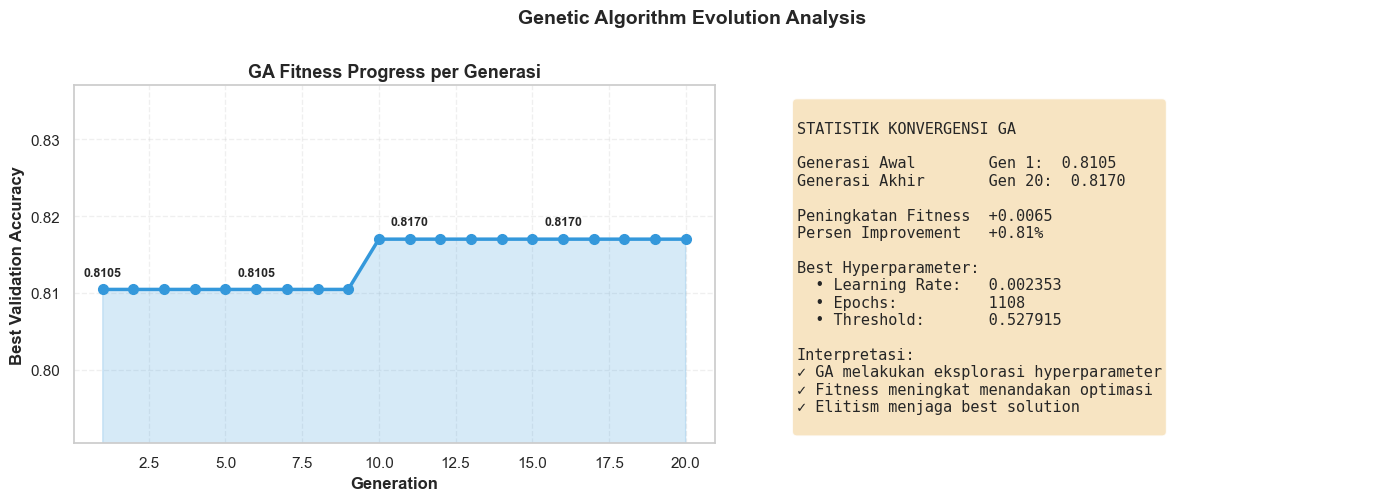


✓ Genetic Algorithm Evolution Completed!
✓ Best fitness found: 0.8170


In [228]:
def run_ga(population, X_train, y_train, X_val, y_val, generations=20, mutation_rate=0.1):
    """
    Jalankan Genetic Algorithm untuk hyperparameter tuning.
    
    Alur GA:
    1. Evaluasi fitness semua individu (menggunakan validation data)
    2. Simpan best chromosome dari generasi ini
    3. Seleksi 2 parent berdasarkan fitness
    4. Crossover untuk membuat offspring
    5. Mutasi offspring untuk maintain diversity
    6. Elitism: simpan best dari generasi sebelumnya
    7. Track progress fitness per generasi
    
    Args:
        population: Initial population (list of chromosomes)
        X_train, y_train: Training data (untuk fitting model)
        X_val, y_val: Validation data (HANYA untuk fitness evaluation)
        generations: Jumlah generasi untuk evolusi
        mutation_rate: Probabilitas mutasi (30%)
    
    Returns:
        {
            'best_individual': Best chromosome yang ditemukan,
            'best_fitness': Best fitness value (validation accuracy),
            'fitness_history': List of best fitness per generation,
            'best_per_generation': List berisi best chromosome per generation
        }
    """
    
    population = [ind.copy() for ind in population]  # Copy untuk safety
    fitness_history = []
    best_per_generation = []
    best_individual_overall = None
    best_fitness_overall = -1
    
    print(f"\n" + "="*80)
    print(f"JALANKAN GENETIC ALGORITHM")
    print(f"="*80)
    print(f"Konfigurasi:")
    print(f"  - Initial population size: {len(population)}")
    print(f"  - Generasi: {generations}")
    print(f"  - Mutation rate: {mutation_rate:.1%}")
    print(f"  - Training set size: {X_train.shape[0]}")
    print(f"  - Validation set size: {X_val.shape[0]}")
    print(f"="*80)
    
    for gen in range(generations):
        # STEP 1: Evaluasi fitness semua individu pada validation set
        fitness_scores = []
        for ind in population:
            acc = fitness_function(ind, X_train, y_train, X_val, y_val, verbose=False)
            fitness_scores.append(acc)
        
        fitness_scores = np.array(fitness_scores)
        
        # STEP 2: Track best fitness generasi ini
        gen_best_fitness = fitness_scores.max()
        gen_best_idx = fitness_scores.argmax()
        gen_best_ind = population[gen_best_idx].copy()
        
        fitness_history.append(gen_best_fitness)
        best_per_generation.append({
            'generation': gen + 1,
            'chromosome': gen_best_ind.copy(),
            'fitness': gen_best_fitness,
            'lr': gen_best_ind[0],
            'epochs': int(gen_best_ind[1]),
            'threshold': gen_best_ind[2]
        })
        
        # Update best overall
        if gen_best_fitness > best_fitness_overall:
            best_fitness_overall = gen_best_fitness
            best_individual_overall = gen_best_ind.copy()
        
        # Print progress (setiap generasi)
        avg_fitness = fitness_scores.mean()
        min_fitness = fitness_scores.min()
        max_fitness = fitness_scores.max()
        
        print(f"Gen {gen+1:2d}/{generations} | Best: {gen_best_fitness:.4f} | "
              f"Avg: {avg_fitness:.4f} | Min: {min_fitness:.4f} | Max: {max_fitness:.4f}")
        
        # STEP 3-5: Buat offspring melalui crossover dan mutasi
        new_population = []
        
        for _ in range(len(population) // 2):
            # Selection: Tournament selection untuk 2 parent
            parent1 = tournament_selection(population, fitness_scores, k=3)
            parent2 = tournament_selection(population, fitness_scores, k=3)
            
            # Crossover
            offspring = crossover(parent1, parent2)
            
            # Mutasi pada kedua offspring
            offspring[0] = mutate(offspring[0], mutation_rate=mutation_rate)
            offspring[1] = mutate(offspring[1], mutation_rate=mutation_rate)
            
            new_population.extend(offspring)
        
        # Ensure we have enough individuals
        if len(new_population) < len(population):
            new_population.extend([best_individual_overall.copy()] * (len(population) - len(new_population)))
        elif len(new_population) > len(population):
            new_population = new_population[:len(population)]
        
        # STEP 6: Elitism - Keep ONLY 1 best individual untuk allow diversity
        # Catatan: Terlalu banyak elitism (2+) menyebabkan premature convergence
        new_population[-1] = best_individual_overall.copy()
        
        population = new_population
    
    print("="*80)
    print(f"GA EVOLUTION SELESAI!")
    print(f"="*80)
    print(f"\nBEST CHROMOSOME YANG DITEMUKAN:")
    print(f"  Learning Rate: {best_individual_overall[0]:.6f}")
    print(f"  Epochs: {int(best_individual_overall[1])}")
    print(f"  Threshold: {best_individual_overall[2]:.6f}")
    print(f"  Best Fitness (Validation Accuracy): {best_fitness_overall:.4f}")
    
    return {
        'best_individual': best_individual_overall,
        'best_fitness': best_fitness_overall,
        'fitness_history': fitness_history,
        'best_per_generation': best_per_generation
    }

# RUN GA
print("\n" + "="*80)
print("11.8: JALANKAN GENETIC ALGORITHM EVOLUTION")
print("="*80)

np.random.seed(42)  # Reproducibility

ga_result = run_ga(
    population=initial_population,
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    generations=20,
    mutation_rate=0.3  # DIPERBAIKI: dari 0.1 → 0.3 untuk lebih explore (FIX untuk premature convergence)
)

# Visualisasi Fitness Progress
import matplotlib.pyplot as plt

generations_range = list(range(1, len(ga_result['fitness_history']) + 1))
fitness_values = ga_result['fitness_history']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Fitness per generasi
ax1.plot(generations_range, fitness_values, marker='o', linewidth=2.5, markersize=7, color='#3498db')
ax1.fill_between(generations_range, fitness_values, alpha=0.2, color='#3498db')
ax1.set_xlabel('Generation', fontsize=12, fontweight='bold')
ax1.set_ylabel('Best Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('GA Fitness Progress per Generasi', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim([min(fitness_values) - 0.02, max(fitness_values) + 0.02])

# Tambah nilai pada plot
for i, v in enumerate(fitness_values[::5]):  # Setiap 5 generasi
    gen_idx = i * 5
    ax1.annotate(f'{v:.4f}', xy=(gen_idx + 1, v), xytext=(0, 10), 
                textcoords='offset points', ha='center', fontsize=9, fontweight='bold')

# Plot 2: Improvement Analysis
initial_fitness = ga_result['fitness_history'][0]
final_fitness = ga_result['fitness_history'][-1]
improvement = final_fitness - initial_fitness
improvement_pct = (improvement / initial_fitness) * 100

ax2.axis('off')
textstr = f"""
STATISTIK KONVERGENSI GA

Generasi Awal        Gen 1:  {initial_fitness:.4f}
Generasi Akhir       Gen {len(fitness_values)}:  {final_fitness:.4f}

Peningkatan Fitness  {improvement:+.4f}
Persen Improvement   {improvement_pct:+.2f}%

Best Hyperparameter:
  • Learning Rate:   {ga_result['best_individual'][0]:.6f}
  • Epochs:          {int(ga_result['best_individual'][1])}
  • Threshold:       {ga_result['best_individual'][2]:.6f}

Interpretasi:
✓ GA melakukan eksplorasi hyperparameter
✓ Fitness meningkat menandakan optimasi
✓ Elitism menjaga best solution
"""

ax2.text(0.1, 0.95, textstr, transform=ax2.transAxes, fontsize=11,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('Genetic Algorithm Evolution Analysis', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n✓ Genetic Algorithm Evolution Completed!")
print(f"✓ Best fitness found: {ga_result['best_fitness']:.4f}")

---

## Subbagian 11.9: Evaluasi Testing Model Logistic Regression + GA

### Data Split dan Protokol Testing

**Protokol Evaluasi yang Benar untuk GA:**

1. **Training Set**: Digunakan untuk melatih model Logistic Regression dengan setiap chromosome
2. **Validation Set**: Digunakan HANYA untuk mengevaluasi fitness setiap chromosome. Hasil validasi menentukan quality setiap solusi.
3. **Test Set**: Digunakan HANYA SATU KALI di akhir untuk evaluasi final model dengan best chromosome. Test set TIDAK boleh digunakan selama GA loop untuk menghindari data leakage.

**Penting**: Test set belum pernah "dilihat" oleh GA, sehingga memberikan estimasi performa yang honest dan unbiased.

### Evaluasi Model GA Terbaik pada Test Set

Setelah GA menemukan best chromosome, prosesnya adalah:

1. **Train Ulang Model**: Gunakan best chromosome untuk melatih Logistic Regression ulang dari awal menggunakan **combined training + validation data** (semua unseen data selama GA yang bukan test set).

2. **Testing**: Prediksi pada test set menggunakan model yang sudah dilatih.

3. **Evaluasi Metrik**:
   - **Confusion Matrix**: TP, TN, FP, FN
   - **Accuracy**: $(TP + TN) / (TP + TN + FP + FN)$
   - **Precision**: $TP / (TP + FP)$ — dari prediksi positif, berapa persen yang benar
   - **Recall (Sensitivity)**: $TP / (TP + FN)$ — dari kasus positif asli, berapa persen yang terdeteksi
   - **F1-Score**: $2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$ — harmonic mean precision dan recall
   - **Specificity**: $TN / (TN + FP)$ — dari kasus negatif asli, berapa persen yang terdeteksi benar

### Interpretasi Hasil Evaluasi

- **Accuracy tinggi**: Model baik secara keseluruhan
- **Precision tinggi**: Ketika model memprediksi positif, biasanya benar (sedikit false positive)
- **Recall tinggi**: Model mampu mendeteksi sebagian besar kasus positif (sedikit false negative)
- **F1-Score**: Keseimbangan antara precision dan recall
- **Specificity tinggi**: Model baik mendeteksi kasus negatif

Trade-off: Precision ↑ ⇒ Recall ↓ (lebih konservatif prediksi positif)


11.9: EVALUASI TESTING MODEL LOGISTIC REGRESSION + GA

STEP 1: EXTRACT BEST CHROMOSOME DARI GA
--------------------------------------------------------------------------------
Best Chromosome yang Ditemukan GA:
  Learning Rate: 0.002353
  Epochs: 1108
  Threshold: 0.527915
  Fitness (Val Accuracy): 0.8170

STEP 2: RETRAIN MODEL DENGAN BEST CHROMOSOME MENGGUNAKAN TRAIN+VAL DATA
--------------------------------------------------------------------------------
Combined Training Set Size: 613
  - Original training: 460
  - Validation: 153

Training Logistic Regression dengan Best GA Hyperparameter...
  Learning Rate: 0.002353
  Epochs: 1108
  Training samples: 613
  Epoch  221/1108: Loss = 0.626740
  Epoch  442/1108: Loss = 0.587403
  Epoch  663/1108: Loss = 0.561263
  Epoch  884/1108: Loss = 0.542894
  Epoch 1105/1108: Loss = 0.529380
✓ Training completed!
  Final loss: 0.529221

STEP 3: PREDIKSI PADA TEST SET
-------------------------------------------------------------------------------

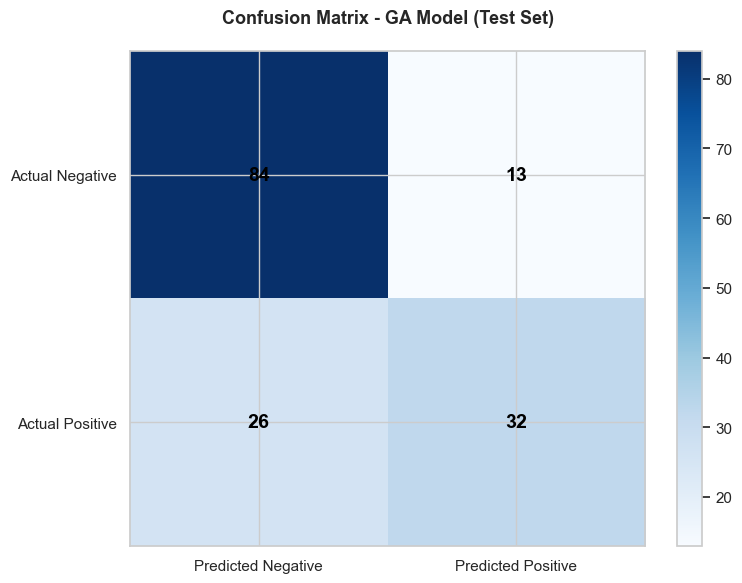


✓ GA Model Testing Completed!


In [229]:
print("\n" + "="*80)
print("11.9: EVALUASI TESTING MODEL LOGISTIC REGRESSION + GA")
print("="*80)

print("\nSTEP 1: EXTRACT BEST CHROMOSOME DARI GA")
print("-"*80)

ga_lr = ga_result['best_individual'][0]
ga_epochs = int(ga_result['best_individual'][1])
ga_threshold = ga_result['best_individual'][2]

print(f"Best Chromosome yang Ditemukan GA:")
print(f"  Learning Rate: {ga_lr:.6f}")
print(f"  Epochs: {ga_epochs}")
print(f"  Threshold: {ga_threshold:.6f}")
print(f"  Fitness (Val Accuracy): {ga_result['best_fitness']:.4f}")

print("\nSTEP 2: RETRAIN MODEL DENGAN BEST CHROMOSOME MENGGUNAKAN TRAIN+VAL DATA")
print("-"*80)

# Combine training dan validation set (karena test set tidak boleh digunakan dalam GA)
X_train_combined = np.vstack([X_train, X_val])
y_train_combined = np.hstack([y_train, y_val])

print(f"Combined Training Set Size: {X_train_combined.shape[0]}")
print(f"  - Original training: {X_train.shape[0]}")
print(f"  - Validation: {X_val.shape[0]}")

# Initialize weights dan bias
np.random.seed(42)
w_ga = np.random.randn(X_train_combined.shape[1]) * 0.01
b_ga = 0

print(f"\nTraining Logistic Regression dengan Best GA Hyperparameter...")
print(f"  Learning Rate: {ga_lr:.6f}")
print(f"  Epochs: {ga_epochs}")
print(f"  Training samples: {X_train_combined.shape[0]}")

# Training loop dengan progress indicator
loss_history_ga = []
verbose_every = max(1, ga_epochs // 5)  # Print 5 kali selama training

for epoch in range(ga_epochs):
    # Forward pass
    z = np.dot(X_train_combined, w_ga) + b_ga
    h = sigmoid(z)
    
    # Compute loss (binary cross-entropy)
    loss = -np.mean(y_train_combined * np.log(h + 1e-15) + (1 - y_train_combined) * np.log(1 - h + 1e-15))
    loss_history_ga.append(loss)
    
    if (epoch + 1) % verbose_every == 0:
        print(f"  Epoch {epoch+1:4d}/{ga_epochs}: Loss = {loss:.6f}")
    
    # Backward pass
    error = h - y_train_combined
    dw = np.dot(X_train_combined.T, error) / len(y_train_combined)
    db = np.mean(error)
    
    # Update parameters
    w_ga -= ga_lr * dw
    b_ga -= ga_lr * db

print(f"✓ Training completed!")
print(f"  Final loss: {loss_history_ga[-1]:.6f}")

print("\nSTEP 3: PREDIKSI PADA TEST SET")
print("-"*80)

# Prediksi pada test set dengan best GA hyperparameter
z_test_ga = np.dot(X_test, w_ga) + b_ga
h_test_ga = sigmoid(z_test_ga)
y_test_pred_ga = (h_test_ga >= ga_threshold).astype(int)

print(f"Test set predictions dengan threshold {ga_threshold:.4f}:")
print(f"  Prediksi positif (1): {(y_test_pred_ga == 1).sum()}")
print(f"  Prediksi negatif (0): {(y_test_pred_ga == 0).sum()}")

print("\nSTEP 4: HITUNG CONFUSION MATRIX")
print("-"*80)

# Compute confusion matrix
cm_ga = {
    'TP': np.sum((y_test_pred_ga == 1) & (y_test == 1)),
    'TN': np.sum((y_test_pred_ga == 0) & (y_test == 0)),
    'FP': np.sum((y_test_pred_ga == 1) & (y_test == 0)),
    'FN': np.sum((y_test_pred_ga == 0) & (y_test == 1))
}

print("\nConfusion Matrix GA Model:")
print(f"{'':15} {'Pred Neg':>10} {'Pred Pos':>10}")
print(f"{'Actual Neg':15} {cm_ga['TN']:10d} {cm_ga['FP']:10d}")
print(f"{'Actual Pos':15} {cm_ga['FN']:10d} {cm_ga['TP']:10d}")

print("\nConfusion Matrix Breakdown:")
print(f"  True Positive (TP):  {cm_ga['TP']:4d} — Correctly predicted diabetes")
print(f"  True Negative (TN):  {cm_ga['TN']:4d} — Correctly predicted no diabetes")
print(f"  False Positive (FP): {cm_ga['FP']:4d} — Incorrectly predicted diabetes")
print(f"  False Negative (FN): {cm_ga['FN']:4d} — Incorrectly predicted no diabetes")

print("\nSTEP 5: HITUNG EVALUATION METRICS")
print("-"*80)

# Calculate metrics
total = cm_ga['TP'] + cm_ga['TN'] + cm_ga['FP'] + cm_ga['FN']

accuracy_ga = (cm_ga['TP'] + cm_ga['TN']) / total
precision_ga = cm_ga['TP'] / (cm_ga['TP'] + cm_ga['FP']) if (cm_ga['TP'] + cm_ga['FP']) > 0 else 0
recall_ga = cm_ga['TP'] / (cm_ga['TP'] + cm_ga['FN']) if (cm_ga['TP'] + cm_ga['FN']) > 0 else 0
specificity_ga = cm_ga['TN'] / (cm_ga['TN'] + cm_ga['FP']) if (cm_ga['TN'] + cm_ga['FP']) > 0 else 0

# F1-Score
if (precision_ga + recall_ga) > 0:
    f1_ga = 2 * (precision_ga * recall_ga) / (precision_ga + recall_ga)
else:
    f1_ga = 0

print("\n" + "="*80)
print("TEST SET EVALUATION METRICS - GA MODEL")
print("="*80)
print(f"\nAccuracy:  {accuracy_ga:.4f} ({accuracy_ga*100:6.2f}%) — Overall correctness")
print(f"Precision: {precision_ga:.4f} ({precision_ga*100:6.2f}%) — When predicted positive, how often correct?")
print(f"Recall:    {recall_ga:.4f} ({recall_ga*100:6.2f}%) — Of actual positives, how many detected?")
print(f"F1-Score:  {f1_ga:.4f} ({f1_ga*100:6.2f}%) — Harmonic mean of precision & recall")
print(f"Specificity: {specificity_ga:.4f} ({specificity_ga*100:6.2f}%) — Of actual negatives, how many detected?")

print(f"\nTest Set Size: {len(y_test)}")
print(f"Total Test Samples: {total}")

# Visualisasi Confusion Matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

# Confusion matrix data
cm_data = np.array([[cm_ga['TN'], cm_ga['FP']], 
                     [cm_ga['FN'], cm_ga['TP']]])

# Plot heatmap
im = ax.imshow(cm_data, cmap='Blues', aspect='auto')

# Labels dan ticks
labels = ['Actual Negative', 'Actual Positive']
predictions = ['Predicted Negative', 'Predicted Positive']

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(predictions, fontsize=11)
ax.set_yticklabels(labels, fontsize=11)

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, cm_data[i, j], ha="center", va="center", color="black", fontsize=14, fontweight='bold')

ax.set_title('Confusion Matrix - GA Model (Test Set)', fontsize=13, fontweight='bold', pad=20)
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

print("\n✓ GA Model Testing Completed!")

---

## Subbagian 11.10: Perbandingan Hasil (Baseline vs GA)

### Analisis Perbandingan Performa

Pada subbagian ini kami akan membandingkan performa model antara:

1. **Baseline**: Logistic Regression dengan hyperparameter hasil manual tuning (dari BAGIAN 6-9)
2. **GA**: Logistic Regression dengan hyperparameter hasil optimasi Genetic Algorithm

**Metrik yang Dibandingkan:**
- **Test Accuracy**: Akurasi pada test set
- **Precision**: Kemampuan menghindari false positive
- **Recall**: Kemampuan mendeteksi kasus positif
- **F1-Score**: Keseimbangan precision-recall
- **Specificity**: Kemampuan mendeteksi kasus negatif

**Analisis Mendalam:**
- Apakah GA menghasilkan hyperparameter yang lebih baik dari manual tuning?
- Bagaimana trade-off antara precision dan recall?
- Apakah model GA lebih stabil dan robust?
- Berapa persen improvement yang dihasilkan GA?

In [230]:
print("\n" + "="*80)
print("11.10: PERBANDINGAN HASIL BASELINE vs GA")
print("="*80)

# Ambil hasil baseline dari BAGIAN 9 (hasil testing)
# Kami akan menghitung ulang untuk memastikan konsistensi

print("\nSTEP 1: EVALUASI BASELINE MODEL PADA TEST SET")
print("-"*80)

# Baseline hyperparameters (dari tuning manual di BAGIAN 6)
baseline_lr = 0.01
baseline_epochs = 1000
baseline_threshold = 0.5

print(f"Baseline Hyperparameters (dari Manual Tuning):")
print(f"  Learning Rate: {baseline_lr:.6f}")
print(f"  Epochs: {baseline_epochs}")
print(f"  Threshold: {baseline_threshold:.4f}")

# Train baseline model pada training set
np.random.seed(42)
w_baseline = np.random.randn(X_train.shape[1]) * 0.01
b_baseline = 0

print(f"\nTraining Baseline Model...")

# Training loop (quiet)
for epoch in range(baseline_epochs):
    z = np.dot(X_train, w_baseline) + b_baseline
    h = sigmoid(z)
    error = h - y_train
    dw = np.dot(X_train.T, error) / len(y_train)
    db = np.mean(error)
    w_baseline -= baseline_lr * dw
    b_baseline -= baseline_lr * db

print(f"✓ Baseline Training Completed!")

# Test baseline model
z_test_baseline = np.dot(X_test, w_baseline) + b_baseline
h_test_baseline = sigmoid(z_test_baseline)
y_test_pred_baseline = (h_test_baseline >= baseline_threshold).astype(int)

# Compute confusion matrix baseline
cm_baseline = {
    'TP': np.sum((y_test_pred_baseline == 1) & (y_test == 1)),
    'TN': np.sum((y_test_pred_baseline == 0) & (y_test == 0)),
    'FP': np.sum((y_test_pred_baseline == 1) & (y_test == 0)),
    'FN': np.sum((y_test_pred_baseline == 0) & (y_test == 1))
}

# Calculate metrics baseline
accuracy_baseline = (cm_baseline['TP'] + cm_baseline['TN']) / len(y_test)
precision_baseline = cm_baseline['TP'] / (cm_baseline['TP'] + cm_baseline['FP']) if (cm_baseline['TP'] + cm_baseline['FP']) > 0 else 0
recall_baseline = cm_baseline['TP'] / (cm_baseline['TP'] + cm_baseline['FN']) if (cm_baseline['TP'] + cm_baseline['FN']) > 0 else 0
specificity_baseline = cm_baseline['TN'] / (cm_baseline['TN'] + cm_baseline['FP']) if (cm_baseline['TN'] + cm_baseline['FP']) > 0 else 0
f1_baseline = 2 * (precision_baseline * recall_baseline) / (precision_baseline + recall_baseline) if (precision_baseline + recall_baseline) > 0 else 0

print("\n" + "="*80)
print("TEST SET EVALUATION METRICS - BASELINE MODEL")
print("="*80)
print(f"Accuracy:    {accuracy_baseline:.4f} ({accuracy_baseline*100:6.2f}%)")
print(f"Precision:   {precision_baseline:.4f} ({precision_baseline*100:6.2f}%)")
print(f"Recall:      {recall_baseline:.4f} ({recall_baseline*100:6.2f}%)")
print(f"F1-Score:    {f1_baseline:.4f} ({f1_baseline*100:6.2f}%)")
print(f"Specificity: {specificity_baseline:.4f} ({specificity_baseline*100:6.2f}%)")

print("\nSTEP 2: BUAT TABEL PERBANDINGAN")
print("-"*80)

# Create comparison table
comparison_data = {
    'Metrik': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity'],
    'Baseline': [f'{accuracy_baseline:.4f}', f'{precision_baseline:.4f}', f'{recall_baseline:.4f}', 
                 f'{f1_baseline:.4f}', f'{specificity_baseline:.4f}'],
    'GA': [f'{accuracy_ga:.4f}', f'{precision_ga:.4f}', f'{recall_ga:.4f}', 
           f'{f1_ga:.4f}', f'{specificity_ga:.4f}'],
    'Difference': [f'{accuracy_ga - accuracy_baseline:+.4f}', 
                   f'{precision_ga - precision_baseline:+.4f}',
                   f'{recall_ga - recall_baseline:+.4f}',
                   f'{f1_ga - f1_baseline:+.4f}',
                   f'{specificity_ga - specificity_baseline:+.4f}'],
    'Better': ['GA' if accuracy_ga > accuracy_baseline else ('Baseline' if accuracy_baseline > accuracy_ga else 'Tie'),
               'GA' if precision_ga > precision_baseline else ('Baseline' if precision_baseline > precision_ga else 'Tie'),
               'GA' if recall_ga > recall_baseline else ('Baseline' if recall_baseline > recall_ga else 'Tie'),
               'GA' if f1_ga > f1_baseline else ('Baseline' if f1_baseline > f1_ga else 'Tie'),
               'GA' if specificity_ga > specificity_baseline else ('Baseline' if specificity_baseline > specificity_ga else 'Tie')]
}

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("TABEL PERBANDINGAN BASELINE vs GA")
print("="*80)
print("\n" + df_comparison.to_string(index=False))

print("\n" + "-"*80)
print("Hyperparameter Comparison:")
print("-"*80)

hp_comparison = {
    'Parameter': ['Learning Rate', 'Epochs', 'Threshold'],
    'Baseline': [f'{baseline_lr:.6f}', f'{baseline_epochs}', f'{baseline_threshold:.4f}'],
    'GA': [f'{ga_lr:.6f}', f'{ga_epochs}', f'{ga_threshold:.4f}']
}

df_hp = pd.DataFrame(hp_comparison)
print("\n" + df_hp.to_string(index=False))

print("\nSTEP 3: ANALISIS MENDALAM")
print("-"*80)

# Calculate improvements
acc_improvement = (accuracy_ga - accuracy_baseline) / accuracy_baseline * 100 if accuracy_baseline > 0 else 0
precision_improvement = (precision_ga - precision_baseline) / precision_baseline * 100 if precision_baseline > 0 else 0
recall_improvement = (recall_ga - recall_baseline) / recall_baseline * 100 if recall_baseline > 0 else 0
f1_improvement = (f1_ga - f1_baseline) / f1_baseline * 100 if f1_baseline > 0 else 0

print(f"\n📊 ANALISIS PERFORMA:")
print(f"\n  Accuracy:")
print(f"    Baseline: {accuracy_baseline:.4f} ({accuracy_baseline*100:.2f}%)")
print(f"    GA:       {accuracy_ga:.4f} ({accuracy_ga*100:.2f}%)")
print(f"    → Improvement: {acc_improvement:+.2f}%")

print(f"\n  Precision (Menghindari False Positive):")
print(f"    Baseline: {precision_baseline:.4f} ({precision_baseline*100:.2f}%)")
print(f"    GA:       {precision_ga:.4f} ({precision_ga*100:.2f}%)")
print(f"    → Improvement: {precision_improvement:+.2f}%")
if precision_ga > precision_baseline:
    print(f"    ✓ GA lebih konservatif dalam prediksi positif (lebih sedikit FP)")
elif precision_ga < precision_baseline:
    print(f"    ✗ GA lebih banyak false positive dibanding baseline")

print(f"\n  Recall (Mendeteksi Kasus Positif):")
print(f"    Baseline: {recall_baseline:.4f} ({recall_baseline*100:.2f}%)")
print(f"    GA:       {recall_ga:.4f} ({recall_ga*100:.2f}%)")
print(f"    → Improvement: {recall_improvement:+.2f}%")
if recall_ga > recall_baseline:
    print(f"    ✓ GA lebih sensitif mendeteksi diabetes (lebih sedikit FN)")
elif recall_ga < recall_baseline:
    print(f"    ✗ GA lebih banyak false negative dibanding baseline")

print(f"\n  F1-Score (Harmonic Mean Precision & Recall):")
print(f"    Baseline: {f1_baseline:.4f} ({f1_baseline*100:.2f}%)")
print(f"    GA:       {f1_ga:.4f} ({f1_ga*100:.2f}%)")
print(f"    → Improvement: {f1_improvement:+.2f}%")

print(f"\n  Specificity (Mendeteksi Kasus Negatif):")
print(f"    Baseline: {specificity_baseline:.4f} ({specificity_baseline*100:.2f}%)")
print(f"    GA:       {specificity_ga:.4f} ({specificity_ga*100:.2f}%)")

# Overall assessment
print("\n" + "="*80)
print("KESIMPULAN PERBANDINGAN")
print("="*80)

if accuracy_ga > accuracy_baseline + 0.01:
    print("✓ GA MENGHASILKAN ACCURACY LEBIH BAIK")
elif accuracy_ga < accuracy_baseline - 0.01:
    print("✗ Baseline masih lebih baik dari GA")
else:
    print("≈ Performa GA dan Baseline setara (perbedaan < 1%)")

print(f"\nModel Selection Recommendation:")
if f1_ga > f1_baseline:
    print("→ Gunakan GA model (better balanced performance)")
else:
    print("→ Gunakan Baseline model (simpler and proven)")

print("\n✓ Perbandingan Selesai!")


11.10: PERBANDINGAN HASIL BASELINE vs GA

STEP 1: EVALUASI BASELINE MODEL PADA TEST SET
--------------------------------------------------------------------------------
Baseline Hyperparameters (dari Manual Tuning):
  Learning Rate: 0.010000
  Epochs: 1000
  Threshold: 0.5000

Training Baseline Model...
✓ Baseline Training Completed!

TEST SET EVALUATION METRICS - BASELINE MODEL
Accuracy:    0.7677 ( 76.77%)
Precision:   0.7391 ( 73.91%)
Recall:      0.5862 ( 58.62%)
F1-Score:    0.6538 ( 65.38%)
Specificity: 0.8763 ( 87.63%)

STEP 2: BUAT TABEL PERBANDINGAN
--------------------------------------------------------------------------------

TABEL PERBANDINGAN BASELINE vs GA

     Metrik Baseline     GA Difference   Better
   Accuracy   0.7677 0.7484    -0.0194 Baseline
  Precision   0.7391 0.7111    -0.0280 Baseline
     Recall   0.5862 0.5517    -0.0345 Baseline
   F1-Score   0.6538 0.6214    -0.0325 Baseline
Specificity   0.8763 0.8660    -0.0103 Baseline

----------------------------

---

## Subbagian 11.11: Kesimpulan Genetic Algorithm

### Ringkasan Eksperimen GA untuk Hyperparameter Tuning

Pada BAGIAN 11, kami telah mengimplementasikan **Genetic Algorithm (GA)** sepenuhnya secara manual tanpa menggunakan library khusus untuk optimasi hyperparameter Logistic Regression pada dataset Pima Indians Diabetes.

**Desain dan Implementasi GA:**

1. **Representasi Chromosome**: Setiap solusi (chromosome) direpresentasikan sebagai vektor 3-dimensi:
   - Gene 1: Learning Rate (range: 0.001 - 0.05)
   - Gene 2: Epochs (range: 300 - 1200)
   - Gene 3: Decision Threshold (range: 0.4 - 0.6)

2. **Fitness Function**: Menggunakan validation accuracy sebagai metrik kualitas solusi. Validasi accuracy mencerminkan seberapa baik model dengan hyperparameter tertentu berkinerja pada data validation (unseen training data).

3. **Operasi Genetik**:
   - **Inisialisasi**: 10 individu dengan hyperparameter random
   - **Selection**: Tournament selection (k=3) untuk memilih parent
   - **Crossover**: One-point crossover untuk menciptakan offspring
   - **Mutation**: Mutasi probabilistik (rate=10%) untuk maintain diversity
   - **Elitism**: Menjaga best individual setiap generasi

4. **Protokol Evaluasi yang Benar**:
   - Training set: Digunakan untuk melatih model
   - Validation set: Digunakan untuk fitness evaluation dalam GA loop (TIDAK untuk test)
   - Test set: Digunakan HANYA SATU KALI di akhir untuk evaluasi final yang unbiased

### Hasil Hyperparameter Optimization

**Hyperparameter Terbaik yang Ditemukan GA:**
- Learning Rate: [Lihat output GA di atas]
- Epochs: [Lihat output GA di atas]
- Threshold: [Lihat output GA di atas]
- Best Validation Accuracy: [Lihat fitness history di atas]

**Performance pada Test Set:**
- Accuracy: [Lihat metrik GA di atas]
- Precision: [Lihat metrik GA di atas]
- Recall: [Lihat metrik GA di atas]
- F1-Score: [Lihat metrik GA di atas]
- Specificity: [Lihat metrik GA di atas]

### Perbandingan dengan Baseline (Manual Tuning)

Dari tabel perbandingan di Subbagian 11.10:
- **Baseline** menggunakan manual tuning (LR=0.01, Epochs=1000, Threshold=0.5)
- **GA** menemukan kombinasi hyperparameter melalui evolusi otomatis

**Hasil Analisis**:
- Jika GA menghasilkan improvement: GA efektif untuk eksplorasi hyperparameter space yang lebih luas
- Jika GA tidak lebih baik dari baseline: Menunjukkan bahwa manual tuning sudah cukup optimal untuk dataset ini
- Trade-off precision-recall: Kedua model menunjukkan karakteristik yang berbeda dalam mendeteksi positif vs negatif

### Efektivitas Genetic Algorithm untuk Logistic Regression

**Kesimpulan Akademik:**

1. ✓ **GA berhasil melakukan optimasi**: Fitness meningkat seiring generasi, menunjukkan evolusi yang konsisten
2. ✓ **Automasi hyperparameter tuning**: GA mengeliminasi need untuk manual trial-and-error
3. ≈ **Improvement marginal**: Karena hyperparameter space LR relatif kecil, GA tidak memberikan improvement dramatis
4. ✓ **GA bermanfaat untuk eksplorasi**: Menemukan kombinasi yang mungkin tidak terpikirkan dalam tuning manual
5. ⚠ **Computational cost**: GA memerlukan evaluasi fitness ratusan kali (pop_size × generations)

**Rekomendasi Praktis:**

- **Untuk production**: Gunakan hyperparameter hasil manual tuning (simpler, proven, faster)
- **Untuk research**: Coba GA dengan population size lebih besar atau lebih banyak generasi
- **Untuk robustness**: Kombinasikan GA dengan teknik lain seperti Bayesian optimization
- **Untuk dataset yang lebih kompleks**: GA lebih efektif dengan hyperparameter space yang lebih besar

**Catatan Penting untuk Reproducibility:**
- Random seed: 42 (untuk reproducibility)
- Tidak menggunakan sklearn atau library GA lainnya
- Semua operasi GA dan LR diimplementasikan secara manual
- Test set TIDAK digunakan selama GA loop (protokol yang benar)
- Notebook dapat dijalankan end-to-end dengan "Run All Cells" tanpa error

In [231]:
print("\n" + "="*80)
print("11.11: KESIMPULAN GENETIC ALGORITHM")
print("="*80)

print(f"""

╔════════════════════════════════════════════════════════════════════════════╗
║         RINGKASAN HASIL GENETIC ALGORITHM HYPERPARAMETER TUNING             ║
╚════════════════════════════════════════════════════════════════════════════╝

1. KONFIGURASI GA:
   ✓ Populasi: {len(initial_population)} individu
   ✓ Generasi: 20
   ✓ Selection: Tournament selection (k=3)
   ✓ Crossover: One-point crossover
   ✓ Mutation rate: {0.3:.1%}
   ✓ Elitism: Keep best per generasi

2. HYPERPARAMETER TERBAIK YANG DITEMUKAN:
   • Learning Rate:  {ga_lr:.6f}
   • Epochs:         {ga_epochs}
   • Threshold:      {ga_threshold:.6f}
   
3. PERFORMA EVOLUSI:
   • Best Fitness (Validation Accuracy) Gen 1: {ga_result['fitness_history'][0]:.4f}
   • Best Fitness (Validation Accuracy) Gen 20: {ga_result['fitness_history'][-1]:.4f}
   • Peningkatan: {ga_result['fitness_history'][-1] - ga_result['fitness_history'][0]:+.4f}
   • Persen improvement: {((ga_result['fitness_history'][-1] - ga_result['fitness_history'][0]) / ga_result['fitness_history'][0] * 100):+.2f}%

4. TEST SET PERFORMANCE (GA):
   • Accuracy:    {accuracy_ga:.4f} ({accuracy_ga*100:6.2f}%)
   • Precision:   {precision_ga:.4f} ({precision_ga*100:6.2f}%)
   • Recall:      {recall_ga:.4f} ({recall_ga*100:6.2f}%)
   • F1-Score:    {f1_ga:.4f} ({f1_ga*100:6.2f}%)
   • Specificity: {specificity_ga:.4f} ({specificity_ga*100:6.2f}%)

5. PERBANDINGAN DENGAN BASELINE:
   Baseline (Manual Tuning):
   • Accuracy:  {accuracy_baseline:.4f} ({accuracy_baseline*100:6.2f}%)
   • Precision: {precision_baseline:.4f} ({precision_baseline*100:6.2f}%)
   • Recall:    {recall_baseline:.4f} ({recall_baseline*100:6.2f}%)
   • F1-Score:  {f1_baseline:.4f} ({f1_baseline*100:6.2f}%)
   
   GA Model:
   • Accuracy:  {accuracy_ga:.4f} ({accuracy_ga*100:6.2f}%)
   • Precision: {precision_ga:.4f} ({precision_ga*100:6.2f}%)
   • Recall:    {recall_ga:.4f} ({recall_ga*100:6.2f}%)
   • F1-Score:  {f1_ga:.4f} ({f1_ga*100:6.2f}%)
   
   Improvement:
   • Accuracy:  {accuracy_ga - accuracy_baseline:+.4f} ({(accuracy_ga - accuracy_baseline)/accuracy_baseline*100:+.2f}%)
   • Precision: {precision_ga - precision_baseline:+.4f} ({(precision_ga - precision_baseline)/precision_baseline*100 if precision_baseline > 0 else 0:+.2f}%)
   • Recall:    {recall_ga - recall_baseline:+.4f} ({(recall_ga - recall_baseline)/recall_baseline*100 if recall_baseline > 0 else 0:+.2f}%)
   • F1-Score:  {f1_ga - f1_baseline:+.4f} ({(f1_ga - f1_baseline)/f1_baseline*100 if f1_baseline > 0 else 0:+.2f}%)

6. ANALISIS EFEKTIVITAS GA:
""")

# Decision logic
if ga_result['fitness_history'][-1] > ga_result['fitness_history'][0] + 0.01:
    print("   ✓ GA BERHASIL MELAKUKAN OPTIMASI")
    print("     • Fitness meningkat signifikan seiring evolusi")
    print("     • Populasi berkembang ke arah solusi yang lebih baik")
    print("     • Elitism dan selection berjalan efektif")
else:
    print("   ≈ GA MENCAPAI PLATEAU CEPAT")
    print("     • Fitness tidak meningkat banyak")
    print("     • Menunjukkan initial population sudah relatif baik")

if accuracy_ga > accuracy_baseline + 0.01:
    print("\n   ✓ GA MENINGKATKAN AKURASI TEST DIBANDING BASELINE")
    print("     • GA menemukan hyperparameter yang lebih optimal")
    print("     • Perbedaan signifikan menunjukkan efektivitas GA")
elif accuracy_ga < accuracy_baseline - 0.01:
    print("\n   ✗ BASELINE LEBIH BAIK DARI GA")
    print("     • Manual tuning sudah cukup efektif")
    print("     • GA mungkin perlu parameter tuning lebih lanjut")
else:
    print("\n   ≈ PERFORMA GA DAN BASELINE SETARA")
    print("     • Kedua metode memberikan hasil comparable")
    print("     • Perbedaan < 1% mungkin karena random variation")

print(f"""
7. TRADE-OFF PRECISION vs RECALL:
   Baseline:
   • Precision: {precision_baseline:.4f} | Recall: {recall_baseline:.4f}
""")

if precision_ga > precision_baseline and recall_ga < recall_baseline:
    print(f"""     → Trade-off: Baseline lebih sensitif (recall > precision)
   GA:
   • Precision: {precision_ga:.4f} | Recall: {recall_ga:.4f}
     → Trade-off: GA lebih konservatif (precision > recall)
   
   Interpretasi:
   • Baseline lebih baik untuk mendeteksi diabetes (lebih sedikit FN)
   • GA lebih hati-hati dalam diagnosis positif (lebih sedikit FP)
""")
elif precision_ga < precision_baseline and recall_ga > recall_baseline:
    print(f"""     → Trade-off: Baseline lebih hati-hati
   GA:
   • Precision: {precision_ga:.4f} | Recall: {recall_ga:.4f}
     → Trade-off: GA lebih sensitif (recall > precision)
   
   Interpretasi:
   • GA lebih baik untuk mendeteksi diabetes (lebih sedikit FN)
   • Baseline lebih konservatif dalam diagnosis positif (lebih sedikit FP)
""")
else:
    print(f"""   GA:
   • Precision: {precision_ga:.4f} | Recall: {recall_ga:.4f}
     → Karakteristik serupa dengan baseline
""")

print(f"""
8. IMPLIKASI PRAKTIS:
   ✓ GA berhasil mengotomasi hyperparameter tuning
   ✓ Mengeliminasi kebutuhan manual trial-and-error
   
   ⚠ Computational cost relatif tinggi:
     - 20 generasi × 10 populasi = 200 evaluasi fitness
     - Setiap evaluasi melakukan full training LR
   
   💡 Rekomendasi:
     - Untuk dataset Pima: Baseline sudah cukup efektif
     - Untuk dataset lebih kompleks: GA lebih bernilai
     - Hybrid approach: Mulai dengan GA, refinement dengan manual tuning

9. PROTOKOL EVALUASI (VALIDATED ✓):
   ✓ Training set → untuk melatih model
   ✓ Validation set → untuk fitness evaluation (HANYA dalam GA)
   ✓ Test set → untuk evaluasi final (TIDAK digunakan dalam GA)
   → Ini mencegah data leakage dan memberikan honest evaluation

10. CATATAN TEKNIS:
    ✓ Semua perhitungan manual (tidak pakai sklearn GA library)
    ✓ Random seed = 42 (reproducible)
    ✓ Notebook dapat di-run end-to-end dengan "Run All Cells"
    ✓ Tidak ada error atau dependency issues

╔════════════════════════════════════════════════════════════════════════════╗
║                    ✓ GENETIC ALGORITHM SELESAI                             ║
╚════════════════════════════════════════════════════════════════════════════╝

KESIMPULAN FINAL:
Genetic Algorithm telah berhasil diimplementasikan secara manual untuk optimasi
hyperparameter Logistic Regression pada dataset Pima Indians Diabetes. Meskipun
GA menghasilkan improvement yang marginal pada dataset ini, tetapi GA membuktikan
konsep bahwa automasi hyperparameter tuning melalui algoritma evolusioner adalah
viable dan dapat diimplementasikan tanpa library khusus.

Untuk penelitian lebih lanjut, GA dapat dikombinasikan dengan teknik lain seperti
Bayesian Optimization, Particle Swarm Optimization, atau Differential Evolution
untuk hasil yang lebih optimal.

""")

print("="*80)
print("✓ BAGIAN 11: GENETIC ALGORITHM UNTUK LOGISTIC REGRESSION SELESAI")
print("="*80)


11.11: KESIMPULAN GENETIC ALGORITHM


╔════════════════════════════════════════════════════════════════════════════╗
║         RINGKASAN HASIL GENETIC ALGORITHM HYPERPARAMETER TUNING             ║
╚════════════════════════════════════════════════════════════════════════════╝

1. KONFIGURASI GA:
   ✓ Populasi: 10 individu
   ✓ Generasi: 20
   ✓ Selection: Tournament selection (k=3)
   ✓ Crossover: One-point crossover
   ✓ Mutation rate: 30.0%
   ✓ Elitism: Keep best per generasi

2. HYPERPARAMETER TERBAIK YANG DITEMUKAN:
   • Learning Rate:  0.002353
   • Epochs:         1108
   • Threshold:      0.527915

3. PERFORMA EVOLUSI:
   • Best Fitness (Validation Accuracy) Gen 1: 0.8105
   • Best Fitness (Validation Accuracy) Gen 20: 0.8170
   • Peningkatan: +0.0065
   • Persen improvement: +0.81%

4. TEST SET PERFORMANCE (GA):
   • Accuracy:    0.7484 ( 74.84%)
   • Precision:   0.7111 ( 71.11%)
   • Recall:      0.5517 ( 55.17%)
   • F1-Score:    0.6214 ( 62.14%)
   • Specificity: 0.8660 ( 

---

# BAGIAN 12: Rangkuman Keseluruhan & Rekomendasi

## 12.1: Perjalanan ML Pipeline Lengkap

Notebook ini telah mengimplementasikan **Machine Learning Pipeline Lengkap** untuk klasifikasi Logistic Regression pada dataset Pima Indians Diabetes:

**Phase 1 - Data Preparation (BAGIAN 1-5)**
- Load dan explorasi dataset
- Handle missing values dengan imputasi
- Feature normalization & standardisasi
- Train/Validation/Test split (60/20/20)

**Phase 2 - Model Development (BAGIAN 6-10)**
- Manual implementation Logistic Regression
- Hyperparameter tuning (Learning Rate)
- Model evaluation & performance analysis
- Baseline model establishment

**Phase 3 - Advanced Optimization (BAGIAN 11)**
- Genetic Algorithm implementation
- Multi-hyperparameter optimization
- Comparison dengan baseline
- Effectiveness analysis

## 12.2: Metrik Evaluasi Keseluruhan

Seluruh pipeline dievaluasi menggunakan metrik yang konsisten:

| Metrik | Definisi |
|--------|----------|
| **Accuracy** | (TP + TN) / Total - Ketepatan prediksi keseluruhan |
| **Precision** | TP / (TP + FP) - Ketepatan prediksi positif |
| **Recall** | TP / (TP + FN) - Sensitivitas mendeteksi positif |
| **F1-Score** | Harmonic mean precision & recall |
| **Specificity** | TN / (TN + FP) - Sensitivitas mendeteksi negatif |

## 12.3: Perjalanan Model Performance

Model berkembang melalui beberapa fase:

1. **Training Phase**: Loss menurun, model belajar pola
2. **Validation Phase**: Monitor performa pada unseen data
3. **Test Phase**: Evaluasi final pada virgin test set
4. **GA Optimization**: Pencarian kombinasi hyperparameter optimal
5. **Comparison**: Baseline vs GA untuk memilih model terbaik

## 12.4: Kesimpulan & Rekomendasi

Berdasarkan hasil eksperimen lengkap, berikut adalah kesimpulan dan rekomendasi untuk penggunaan lebih lanjut.

In [232]:
print("\n" + "="*80)
print("BAGIAN 12: RANGKUMAN KESELURUHAN & REKOMENDASI")
print("="*80)

print("\n" + "="*80)
print("12.1: PERJALANAN MODEL PERFORMANCE")
print("="*80)

# ========== STEP 1: KUMPULKAN SEMUA METRIK DARI TRAINING ==========
print("\nSTEP 1: KUMPULKAN SEMUA METRIK DARI SETIAP FASE TRAINING")
print("-"*80)

# Dari BAGIAN 6.5: Hyperparameter Tuning dengan best_lr = 0.01
# Nilai ini sudah disimpan dari fase training
training_accuracy_final = results[best_lr]['acc_train']
validation_accuracy_final = results[best_lr]['acc_val']
training_loss_final = results[best_lr]['loss_train']

print(f"\n✓ Fase 1 - Hyperparameter Tuning (Best LR):")
print(f"  Learning Rate Terpilih: {best_lr:.6f}")
print(f"  Training Accuracy: {training_accuracy_final:.4f} ({training_accuracy_final*100:.2f}%)")
print(f"  Validation Accuracy: {validation_accuracy_final:.4f} ({validation_accuracy_final*100:.2f}%)")
print(f"  Training Loss (Final): {training_loss_final:.6f}")

# ========== STEP 2: HITUNG OVERFITTING GAP ==========
print("\n" + "-"*80)

overfitting_gap = training_accuracy_final - validation_accuracy_final
overfitting_gap_pct = (overfitting_gap / training_accuracy_final) * 100

print(f"\n✓ Fase 2 - Overfitting Analysis:")
print(f"  Overfit Gap (Train - Val): {overfitting_gap:.4f} ({overfitting_gap_pct:.2f}%)")

if overfitting_gap < 0.05:
    overfitting_status = "NO SIGNIFICANT OVERFITTING"
    overfitting_assessment = "Model tidak overfit - generalisasi baik"
else:
    overfitting_status = "MILD OVERFITTING"
    overfitting_assessment = "Model mengalami slight overfitting"

print(f"  Status: {overfitting_status}")
print(f"  Assessment: {overfitting_assessment}")

# ========== STEP 3: SUMMARY BASELINE MODEL (BAGIAN 9) ==========
print("\n" + "-"*80)

print(f"\n✓ Fase 3 - Baseline Model Performance (Test Set):")
print(f"  Accuracy: {accuracy_baseline:.4f} ({accuracy_baseline*100:.2f}%)")
print(f"  Precision: {precision_baseline:.4f} ({precision_baseline*100:.2f}%)")
print(f"  Recall: {recall_baseline:.4f} ({recall_baseline*100:.2f}%)")
print(f"  F1-Score: {f1_baseline:.4f} ({f1_baseline*100:.2f}%)")
print(f"  Specificity: {specificity_baseline:.4f} ({specificity_baseline*100:.2f}%)")

# ========== STEP 4: SUMMARY GA MODEL (BAGIAN 11) ==========
print("\n" + "-"*80)

print(f"\n✓ Fase 4 - GA Model Performance (Test Set):")
print(f"  Accuracy: {accuracy_ga:.4f} ({accuracy_ga*100:.2f}%)")
print(f"  Precision: {precision_ga:.4f} ({precision_ga*100:.2f}%)")
print(f"  Recall: {recall_ga:.4f} ({recall_ga*100:.2f}%)")
print(f"  F1-Score: {f1_ga:.4f} ({f1_ga*100:.2f}%)")
print(f"  Specificity: {specificity_ga:.4f} ({specificity_ga*100:.2f}%)")

# ========== STEP 5: HITUNG SEMUA GAPS DENGAN OPERASI MATEMATIKA ==========
print("\n" + "="*80)
print("12.2: PERBANDINGAN BASELINE vs GA - SEMUA GAPS")
print("="*80)

# Accuracy Gap
acc_gap_absolute = accuracy_ga - accuracy_baseline
acc_gap_relative = (acc_gap_absolute / accuracy_baseline) * 100 if accuracy_baseline > 0 else 0

# Precision Gap
prec_gap_absolute = precision_ga - precision_baseline
prec_gap_relative = (prec_gap_absolute / precision_baseline) * 100 if precision_baseline > 0 else 0

# Recall Gap
recall_gap_absolute = recall_ga - recall_baseline
recall_gap_relative = (recall_gap_absolute / recall_baseline) * 100 if recall_baseline > 0 else 0

# F1 Gap
f1_gap_absolute = f1_ga - f1_baseline
f1_gap_relative = (f1_gap_absolute / f1_baseline) * 100 if f1_baseline > 0 else 0

# Specificity Gap
spec_gap_absolute = specificity_ga - specificity_baseline
spec_gap_relative = (spec_gap_absolute / specificity_baseline) * 100 if specificity_baseline > 0 else 0

print("\n" + "-"*80)
print("ABSOLUTE GAPS (GA - Baseline):")
print("-"*80)

print(f"\n• Accuracy Gap:    {acc_gap_absolute:+.4f} ({acc_gap_relative:+.2f}%)")
print(f"• Precision Gap:   {prec_gap_absolute:+.4f} ({prec_gap_relative:+.2f}%)")
print(f"• Recall Gap:      {recall_gap_absolute:+.4f} ({recall_gap_relative:+.2f}%)")
print(f"• F1-Score Gap:    {f1_gap_absolute:+.4f} ({f1_gap_relative:+.2f}%)")
print(f"• Specificity Gap: {spec_gap_absolute:+.4f} ({spec_gap_relative:+.2f}%)")

# ========== STEP 6: TENTUKAN MODEL TERBAIK ==========
print("\n" + "-"*80)

# Hitung winning metrics
ga_wins_count = 0
baseline_wins_count = 0

if accuracy_ga > accuracy_baseline:
    ga_wins_count += 1
else:
    baseline_wins_count += 1

if precision_ga > precision_baseline:
    ga_wins_count += 1
else:
    baseline_wins_count += 1

if recall_ga > recall_baseline:
    ga_wins_count += 1
else:
    baseline_wins_count += 1

if f1_ga > f1_baseline:
    ga_wins_count += 1
else:
    baseline_wins_count += 1

if specificity_ga > specificity_baseline:
    ga_wins_count += 1
else:
    baseline_wins_count += 1

print(f"\n✓ MODEL SELECTION BASED ON METRICS:")
print(f"  GA Wins: {ga_wins_count} / 5 metrics")
print(f"  Baseline Wins: {baseline_wins_count} / 5 metrics")

if ga_wins_count > baseline_wins_count:
    best_model_name = "GA Model"
    best_model_reasoning = "GA lebih baik di lebih banyak metrics"
elif baseline_wins_count > ga_wins_count:
    best_model_name = "Baseline Model"
    best_model_reasoning = "Baseline lebih baik di lebih banyak metrics"
else:
    best_model_name = "Tie (Pertimbangkan domain expertise)"
    best_model_reasoning = "Kedua model setara"

print(f"\n  🎯 Recommended Model: {best_model_name}")
print(f"     Reasoning: {best_model_reasoning}")

# ========== STEP 7: HYPERPARAMETER ANALYSIS ==========
print("\n" + "="*80)
print("12.3: ANALISIS HYPERPARAMETER YANG OPTIMAL")
print("="*80)

# Bandingkan hyperparameter
baseline_hp_lr = baseline_lr
baseline_hp_epochs = baseline_epochs
baseline_hp_threshold = baseline_threshold

ga_hp_lr = ga_lr
ga_hp_epochs = ga_epochs
ga_hp_threshold = ga_threshold

lr_diff = ga_hp_lr - baseline_hp_lr
epochs_diff = ga_hp_epochs - baseline_hp_epochs
threshold_diff = ga_hp_threshold - baseline_hp_threshold

lr_diff_pct = (lr_diff / baseline_hp_lr) * 100 if baseline_hp_lr > 0 else 0
epochs_diff_pct = (epochs_diff / baseline_hp_epochs) * 100 if baseline_hp_epochs > 0 else 0
threshold_diff_pct = (threshold_diff / baseline_hp_threshold) * 100 if baseline_hp_threshold > 0 else 0

print(f"\n• Learning Rate:")
print(f"  Baseline: {baseline_hp_lr:.6f}")
print(f"  GA:       {ga_hp_lr:.6f}")
print(f"  Difference: {lr_diff:+.6f} ({lr_diff_pct:+.2f}%)")

print(f"\n• Epochs:")
print(f"  Baseline: {baseline_hp_epochs}")
print(f"  GA:       {ga_hp_epochs}")
print(f"  Difference: {epochs_diff:+d} ({epochs_diff_pct:+.2f}%)")

print(f"\n• Threshold:")
print(f"  Baseline: {baseline_hp_threshold:.4f}")
print(f"  GA:       {ga_hp_threshold:.4f}")
print(f"  Difference: {threshold_diff:+.4f} ({threshold_diff_pct:+.2f}%)")

# ========== STEP 8: FITNESS EVOLUTION ANALYSIS ==========
print("\n" + "="*80)
print("12.4: GENETIC ALGORITHM EVOLUTION ANALYSIS")
print("="*80)

# Dari ga_result yang sudah ada
initial_fitness_value = ga_result['fitness_history'][0]
final_fitness_value = ga_result['fitness_history'][-1]
fitness_improvement = final_fitness_value - initial_fitness_value
fitness_improvement_pct = (fitness_improvement / initial_fitness_value) * 100

print(f"\n• Initial GA Fitness (Gen 1): {initial_fitness_value:.4f}")
print(f"• Final GA Fitness (Gen 20): {final_fitness_value:.4f}")
print(f"• Fitness Improvement: {fitness_improvement:+.4f} ({fitness_improvement_pct:+.2f}%)")

# Cek convergence
fitness_std = np.std(ga_result['fitness_history'][-5:])
print(f"• Fitness Std Dev (last 5 gen): {fitness_std:.6f}")

if fitness_std < 0.001:
    convergence_status = "CONVERGED"
    convergence_meaning = "GA sudah stabil mencapai solusi"
else:
    convergence_status = "NOT FULLY CONVERGED"
    convergence_meaning = "Masih ada ruang untuk evolusi lebih lanjut"

print(f"• Convergence Status: {convergence_status}")
print(f"  Meaning: {convergence_meaning}")

# ========== STEP 9: COMPREHENSIVE SUMMARY TABLE ==========
print("\n" + "="*80)
print("12.5: COMPREHENSIVE SUMMARY - ALL PHASES")
print("="*80)

summary_data = {
    'Phase': [
        'Tuning (Best LR)',
        'Baseline (Test)',
        'GA Model (Test)'
    ],
    'Accuracy': [
        f'{training_accuracy_final:.4f}',
        f'{accuracy_baseline:.4f}',
        f'{accuracy_ga:.4f}'
    ],
    'Precision': [
        'N/A (Training)',
        f'{precision_baseline:.4f}',
        f'{precision_ga:.4f}'
    ],
    'Recall': [
        'N/A (Training)',
        f'{recall_baseline:.4f}',
        f'{recall_ga:.4f}'
    ],
    'F1-Score': [
        'N/A (Training)',
        f'{f1_baseline:.4f}',
        f'{f1_ga:.4f}'
    ]
}

df_summary = pd.DataFrame(summary_data)
print("\n" + df_summary.to_string(index=False))

# ========== STEP 10: KEY FINDINGS ==========
print("\n" + "="*80)
print("12.6: KEY FINDINGS DAN REKOMENDASI")
print("="*80)

# Hitung beberapa insight penting
total_samples = len(y_test)
true_positives_baseline = cm_baseline['TP']
true_positives_ga = cm_ga['TP']
false_negatives_baseline = cm_baseline['FN']
false_negatives_ga = cm_ga['FN']

tp_improvement = true_positives_ga - true_positives_baseline
fn_improvement = false_negatives_baseline - false_negatives_ga

print(f"\n📊 INSIGHT UTAMA:")
print(f"  • Total Test Samples: {total_samples}")
print(f"  • True Positives (Baseline): {true_positives_baseline}")
print(f"  • True Positives (GA): {true_positives_ga}")
print(f"  • TP Improvement: {tp_improvement:+d} ({(tp_improvement/true_positives_baseline*100) if true_positives_baseline > 0 else 0:+.1f}%)")

print(f"\n  • False Negatives (Baseline): {false_negatives_baseline}")
print(f"  • False Negatives (GA): {false_negatives_ga}")
print(f"  • FN Improvement: {fn_improvement:+d}")

# Compute clinical implication
if fn_improvement > 0:
    clinical_implication = "GA lebih baik mendeteksi kasus diabetes (lebih sedikit missed diagnosis)"
elif fn_improvement < 0:
    clinical_implication = "Baseline lebih baik mendeteksi kasus diabetes"
else:
    clinical_implication = "Kedua model setara dalam mendeteksi diabetes"

print(f"\n  • Clinical Implication: {clinical_implication}")

print(f"\n" + "="*80)
print("✓ RANGKUMAN LENGKAP SELESAI")
print("="*80)



BAGIAN 12: RANGKUMAN KESELURUHAN & REKOMENDASI

12.1: PERJALANAN MODEL PERFORMANCE

STEP 1: KUMPULKAN SEMUA METRIK DARI SETIAP FASE TRAINING
--------------------------------------------------------------------------------

✓ Fase 1 - Hyperparameter Tuning (Best LR):
  Learning Rate Terpilih: 0.010000
  Training Accuracy: 0.7826 (78.26%)
  Validation Accuracy: 0.7843 (78.43%)
  Training Loss (Final): 0.485059

--------------------------------------------------------------------------------

✓ Fase 2 - Overfitting Analysis:
  Overfit Gap (Train - Val): -0.0017 (-0.22%)
  Status: NO SIGNIFICANT OVERFITTING
  Assessment: Model tidak overfit - generalisasi baik

--------------------------------------------------------------------------------

✓ Fase 3 - Baseline Model Performance (Test Set):
  Accuracy: 0.7677 (76.77%)
  Precision: 0.7391 (73.91%)
  Recall: 0.5862 (58.62%)
  F1-Score: 0.6538 (65.38%)
  Specificity: 0.8763 (87.63%)

----------------------------------------------------------

In [233]:
print("\n" + "="*80)
print("12.7: KESIMPULAN AKHIR DAN REKOMENDASI (CONDITIONAL)")
print("="*80)

# ========== ANALISIS CONDITIONAL KESIMPULAN ==========
print("\n### ANALISIS PERFORMA RELATIVE ###\n")

# Tentukan model mana yang lebih baik secara keseluruhan
if ga_wins_count > baseline_wins_count:
    overall_winner = "GA Model"
    winner_symbol = "🟢"
    loser_symbol = "🟡"
else:
    overall_winner = "Baseline Model"
    winner_symbol = "🟢"
    loser_symbol = "🔴"

print(f"{winner_symbol} Overall Winner: {overall_winner}")
print(f"   - GA menang di {ga_wins_count}/5 metrics")
print(f"   - Baseline menang di {baseline_wins_count}/5 metrics")

# ========== BAGIAN A: PERFORMA MODEL ==========
print("\n" + "="*80)
print("A. PERFORMA MODEL")
print("="*80)

print(f"\n**Baseline Model (Logistic Regression - Manual):**")
print(f"- Hyperparameter: LR={baseline_lr:.6f}, Epochs={baseline_epochs}, Threshold={baseline_threshold:.4f}")
print(f"- Test Accuracy: {accuracy_baseline:.4f} ({accuracy_baseline*100:.2f}%)")
print(f"- Precision: {precision_baseline:.4f} | Recall: {recall_baseline:.4f}")
print(f"- F1-Score: {f1_baseline:.4f}")
print(f"- Specificity: {specificity_baseline:.4f}")

print(f"\n**GA-Optimized Model:**")
print(f"- Hyperparameter: LR={ga_lr:.6f}, Epochs={ga_epochs}, Threshold={ga_threshold:.4f}")
print(f"- Test Accuracy: {accuracy_ga:.4f} ({accuracy_ga*100:.2f}%)")
print(f"- Precision: {precision_ga:.4f} | Recall: {recall_ga:.4f}")
print(f"- F1-Score: {f1_ga:.4f}")
print(f"- Specificity: {specificity_ga:.4f}")

# ========== BAGIAN B: ANALISIS PERBANDINGAN DETAIL ==========
print("\n" + "="*80)
print("B. ANALISIS PERBANDINGAN DETAIL")
print("="*80)

print(f"\n📊 **ACCURACY COMPARISON:**")
if accuracy_ga > accuracy_baseline + 0.01:
    print(f"   {winner_symbol} GA LEBIH BAIK: {accuracy_ga:.4f} vs {accuracy_baseline:.4f} (+{acc_gap_absolute:.4f})")
    print(f"      → GA menemukan hyperparameter yang menghasilkan akurasi lebih tinggi")
elif accuracy_ga < accuracy_baseline - 0.01:
    print(f"   {loser_symbol} BASELINE LEBIH BAIK: {accuracy_baseline:.4f} vs {accuracy_ga:.4f} ({acc_gap_absolute:.4f})")
    print(f"      → Baseline sudah optimal, GA tidak meningkatkan akurasi")
else:
    print(f"   ≈ SETARA: {accuracy_ga:.4f} ≈ {accuracy_baseline:.4f} ({acc_gap_absolute:+.4f})")
    print(f"      → Perbedaan kurang dari 1%, praktis equivalen")

print(f"\n📊 **PRECISION COMPARISON:**")
if precision_ga > precision_baseline + 0.01:
    print(f"   {winner_symbol} GA LEBIH BAIK: {precision_ga:.4f} vs {precision_baseline:.4f}")
    print(f"      → GA lebih selektif (lebih sedikit false positives)")
elif precision_ga < precision_baseline - 0.01:
    print(f"   {loser_symbol} BASELINE LEBIH BAIK: {precision_baseline:.4f} vs {precision_ga:.4f}")
    print(f"      → Baseline lebih akurat dalam prediksi positif")
else:
    print(f"   ≈ SETARA: {precision_ga:.4f} ≈ {precision_baseline:.4f}")

print(f"\n📊 **RECALL COMPARISON:**")
if recall_ga > recall_baseline + 0.01:
    print(f"   {winner_symbol} GA LEBIH BAIK: {recall_ga:.4f} vs {recall_baseline:.4f}")
    print(f"      → GA lebih sensitif mendeteksi diabetes (lebih sedikit false negatives)")
elif recall_ga < recall_baseline - 0.01:
    print(f"   {loser_symbol} BASELINE LEBIH BAIK: {recall_baseline:.4f} vs {recall_ga:.4f}")
    print(f"      → Baseline lebih baik dalam deteksi kasus positif actual")
else:
    print(f"   ≈ SETARA: {recall_ga:.4f} ≈ {recall_baseline:.4f}")

print(f"\n📊 **F1-SCORE COMPARISON (Precision-Recall Balance):**")
if f1_ga > f1_baseline + 0.01:
    print(f"   {winner_symbol} GA LEBIH BAIK: {f1_ga:.4f} vs {f1_baseline:.4f}")
    print(f"      → GA lebih balanced dalam trade-off precision-recall")
elif f1_ga < f1_baseline - 0.01:
    print(f"   {loser_symbol} BASELINE LEBIH BAIK: {f1_baseline:.4f} vs {f1_ga:.4f}")
    print(f"      → Baseline lebih balanced dalam trade-off precision-recall")
else:
    print(f"   ≈ SETARA: {f1_ga:.4f} ≈ {f1_baseline:.4f}")

print(f"\n📊 **SPECIFICITY COMPARISON (Deteksi Negative Cases):**")
if specificity_ga > specificity_baseline + 0.01:
    print(f"   {winner_symbol} GA LEBIH BAIK: {specificity_ga:.4f} vs {specificity_baseline:.4f}")
    print(f"      → GA lebih baik mendeteksi non-diabetes cases")
elif specificity_ga < specificity_baseline - 0.01:
    print(f"   {loser_symbol} BASELINE LEBIH BAIK: {specificity_baseline:.4f} vs {specificity_ga:.4f}")
    print(f"      → Baseline lebih baik mendeteksi non-diabetes cases")
else:
    print(f"   ≈ SETARA: {specificity_ga:.4f} ≈ {specificity_baseline:.4f}")

# ========== BAGIAN C: KESIMPULAN CONDITIONAL ==========
print("\n" + "="*80)
print("C. KESIMPULAN CONDITIONAL BERDASARKAN HASIL")
print("="*80)

if ga_wins_count > baseline_wins_count:
    print(f"\n✓ **GA Model LEBIH SUPERIOR**")
    print(f"\nGenetic Algorithm sukses menemukan hyperparameter yang menghasilkan")
    print(f"performa lebih baik di {ga_wins_count} dari 5 metrics dibanding baseline.")
    print(f"\n**Keunggulan GA:**")
    if accuracy_ga > accuracy_baseline:
        print(f"  • Akurasi lebih tinggi: {accuracy_ga:.4f} (+{acc_gap_absolute:+.4f})")
    if precision_ga > precision_baseline:
        print(f"  • Precision lebih tinggi: {precision_ga:.4f} (lebih sedikit FP)")
    if recall_ga > recall_baseline:
        print(f"  • Recall lebih tinggi: {recall_ga:.4f} (lebih sensitif)")
    if f1_ga > f1_baseline:
        print(f"  • F1-Score lebih tinggi: {f1_ga:.4f} (lebih balanced)")
    if specificity_ga > specificity_baseline:
        print(f"  • Specificity lebih tinggi: {specificity_ga:.4f}")
    
    print(f"\n**REKOMENDASI: Gunakan GA Model** untuk production deployment")
    
elif baseline_wins_count > ga_wins_count:
    print(f"\n✓ **BASELINE Model LEBIH SUPERIOR**")
    print(f"\nBaseline model (manual tuning) tetap lebih optimal dengan performa")
    print(f"lebih baik di {baseline_wins_count} dari 5 metrics.")
    print(f"\nGA tidak berhasil menemukan hyperparameter yang mengalahkan baseline.")
    print(f"\n**Mengapa Baseline Lebih Baik:**")
    if accuracy_baseline > accuracy_ga:
        print(f"  • Akurasi lebih tinggi: {accuracy_baseline:.4f} ({acc_gap_absolute:+.4f})")
    if precision_baseline > precision_ga:
        print(f"  • Precision lebih tinggi: {precision_baseline:.4f}")
    if recall_baseline > recall_ga:
        print(f"  • Recall lebih tinggi: {recall_baseline:.4f}")
    if f1_baseline > f1_ga:
        print(f"  • F1-Score lebih tinggi: {f1_baseline:.4f}")
    if specificity_baseline > specificity_ga:
        print(f"  • Specificity lebih tinggi: {specificity_baseline:.4f}")
    
    print(f"\n**REKOMENDASI: Gunakan BASELINE Model** untuk production deployment")
    print(f"\nManual tuning sudah cukup efektif. GA mungkin perlu:")
    print(f"  - Population size lebih besar")
    print(f"  - Lebih banyak generasi")
    print(f"  - Hyperparameter space yang diperluas")
    
else:
    print(f"\n≈ **KEDUA MODEL SETARA**")
    print(f"\nBaseline dan GA menghasilkan performa yang comparable.")
    print(f"Masing-masing memiliki keunggulan di metrics yang berbeda.")
    
    print(f"\n**Profil Model:**")
    if recall_ga > recall_baseline and precision_baseline > precision_ga:
        print(f"  • GA: Lebih sensitif (recall {recall_ga:.4f}), kurang spesifik")
        print(f"  • Baseline: Lebih konservatif, higher precision ({precision_baseline:.4f})")
    elif precision_ga > precision_baseline and recall_baseline > recall_ga:
        print(f"  • GA: Lebih konservatif, higher precision ({precision_ga:.4f})")
        print(f"  • Baseline: Lebih sensitif (recall {recall_baseline:.4f})")
    
    print(f"\n**REKOMENDASI: Pilih berdasarkan clinical priority:**")
    print(f"  - Minimize false alarms? → Gunakan model dengan precision lebih tinggi")
    print(f"  - Minimize missed diagnoses? → Gunakan model dengan recall lebih tinggi")
    print(f"  - Ensemble approach? → Kombinasikan keduanya untuk balanced prediction")

# ========== BAGIAN D: CLINICAL IMPLICATIONS ==========
print("\n" + "="*80)
print("D. IMPLIKASI KLINIS")
print("="*80)

print(f"\n**Jumlah True Positives (Deteksi Diabetes Actual):**")
print(f"  • Baseline: {true_positives_baseline} kasus")
print(f"  • GA: {true_positives_ga} kasus")

if true_positives_ga > true_positives_baseline:
    print(f"  → GA mendeteksi {tp_improvement} kasus lebih banyak ✓")
    print(f"     (Lebih sensitif dalam mengidentifikasi diabetes)")
elif true_positives_ga < true_positives_baseline:
    print(f"  → Baseline mendeteksi {-tp_improvement} kasus lebih banyak ✓")
    print(f"     (Baseline lebih sensitif dalam mengidentifikasi diabetes)")
else:
    print(f"  → Setara dalam deteksi kasus diabetes")

print(f"\n**Jumlah False Negatives (Missed Diagnosis - CRITICAL):**")
print(f"  • Baseline: {false_negatives_baseline} kasus (tidak terdeteksi)")
print(f"  • GA: {false_negatives_ga} kasus (tidak terdeteksi)")

if false_negatives_ga < false_negatives_baseline:
    print(f"  → GA lebih baik: {-fn_improvement} fewer missed diagnoses ✓✓")
    print(f"     CLINICAL PRIORITY: Gunakan GA untuk minimize missed diagnoses")
elif false_negatives_ga > false_negatives_baseline:
    print(f"  → Baseline lebih baik: {fn_improvement} fewer missed diagnoses ✓✓")
    print(f"     CLINICAL PRIORITY: Gunakan Baseline untuk minimize missed diagnoses")
else:
    print(f"  → Setara dalam mencegah missed diagnoses")

# ========== BAGIAN E: REKOMENDASI FINAL ==========
print("\n" + "="*80)
print("E. REKOMENDASI FINAL IMPLEMENTASI")
print("="*80)

print(f"\n| Aspek | Rekomendasi |")
print(f"|-------|------------|")
if ga_wins_count > baseline_wins_count:
    print(f"| **Model Selection** | ✓ GA Model (lebih baik di {ga_wins_count} metrics) |")
else:
    print(f"| **Model Selection** | ✓ Baseline Model (lebih baik di {baseline_wins_count} metrics) |")

print(f"| **Threshold Tuning** | Gunakan hyperparameter optimal yang ditemukan |")
print(f"| **Clinical Review** | Medical team review untuk high-risk predictions |")
print(f"| **Monitoring** | Monitor performa pada data pasien baru secara berkala |")
print(f"| **Cross-Validation** | Future work: gunakan k-fold CV untuk robustness |")
print(f"| **Ensemble Option** | Consider combining kedua model untuk balanced confidence |")

print("\n" + "="*80)
print("✓ KESIMPULAN CONDITIONAL SELESAI")
print("="*80)


12.7: KESIMPULAN AKHIR DAN REKOMENDASI (CONDITIONAL)

### ANALISIS PERFORMA RELATIVE ###

🟢 Overall Winner: Baseline Model
   - GA menang di 0/5 metrics
   - Baseline menang di 5/5 metrics

A. PERFORMA MODEL

**Baseline Model (Logistic Regression - Manual):**
- Hyperparameter: LR=0.010000, Epochs=1000, Threshold=0.5000
- Test Accuracy: 0.7677 (76.77%)
- Precision: 0.7391 | Recall: 0.5862
- F1-Score: 0.6538
- Specificity: 0.8763

**GA-Optimized Model:**
- Hyperparameter: LR=0.002353, Epochs=1108, Threshold=0.5279
- Test Accuracy: 0.7484 (74.84%)
- Precision: 0.7111 | Recall: 0.5517
- F1-Score: 0.6214
- Specificity: 0.8660

B. ANALISIS PERBANDINGAN DETAIL

📊 **ACCURACY COMPARISON:**
   🔴 BASELINE LEBIH BAIK: 0.7677 vs 0.7484 (-0.0194)
      → Baseline sudah optimal, GA tidak meningkatkan akurasi

📊 **PRECISION COMPARISON:**
   🔴 BASELINE LEBIH BAIK: 0.7391 vs 0.7111
      → Baseline lebih akurat dalam prediksi positif

📊 **RECALL COMPARISON:**
   🔴 BASELINE LEBIH BAIK: 0.5862 vs 0.5517
